In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Format of the file: age_gender_ethnicity_datetime
## Load and Visualize data

In [4]:
path = "UTKFace/"
files = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
files.sort()
size = len(files)
print("Total samples:",size) 

Total samples: 23695


In [5]:
files[0]

'100_0_0_20170112213500903.jpg.chip.jpg'

In [6]:
#Lettura e preprocessing delle immagini
#Oltre alle immagini verranno estratte anche le altre feature disponibili

images = []
ages = []
genders = []
ethnicities = [] 

IMG_WIDTH= 80
IMG_HEIGHT = 80

for file in files:
    #image = cv2.imread(path + file, cv2.IMREAD_COLOR)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, dsize=(IMG_HEIGHT,IMG_WIDTH))
    image = image.reshape((image.shape[0],image.shape[1],1))
    #image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))
    ethnicities.append(int(split_var[2]))
    


In [7]:
#numero di immagini presenti nel dataset
size = len(images)
size

23695

In [8]:
#shape di un'immagine
images[1].shape

(80, 80, 1)

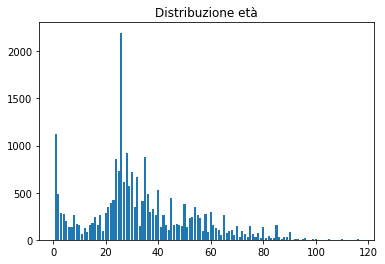

Max value: 116


In [9]:
#Grafico della distribuzione età
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.title('Distribuzione età')
plt.show()
print("Max value:",max(ages))

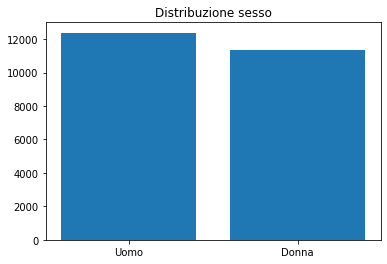

In [10]:
#Grafico della distribuzione sesso
sesso = ['Uomo','Donna']
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(sesso,y_genders)
plt.title('Distribuzione sesso')
plt.show()

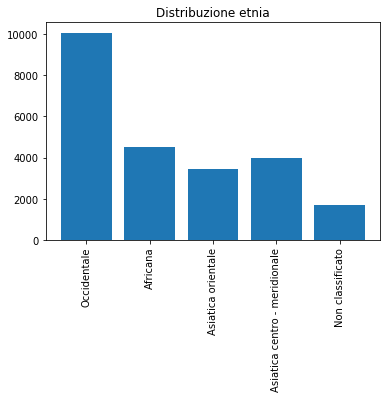

In [11]:
#Grafico della distribuzione etinia
etnia = ['Occidentale','Africana','Asiatica orientale','Asiatica centro - meridionale', 'Non classificato']
x_ethnicities = list(set(ethnicities))
y_ethnicities = [ethnicities.count(i) for i in x_ethnicities]
plt.bar(etnia,y_ethnicities)
plt.xticks(rotation = 90)
plt.title('Distribuzione etnia')
plt.show()

Age: 100
Gender: 0
Ethnicity: 0


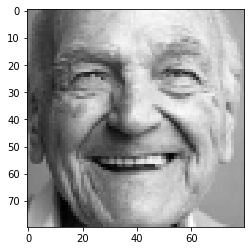

In [57]:
#funzione per lo show di un'immagine. 
def display(img):
    img = np.squeeze(img)  #squeeze remove single-dimensional entries from the shape of an array.
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.show()

idx = 1
sample = images[idx]
print("Age:",ages[idx])
print("Gender:",genders[idx])
print("Ethnicity:",ethnicities[idx])
display(images[idx])

In [13]:
#Creazione di un'unica lista contenente le feature associate alle immagini

features = []

for i in range(size):
    
    featElement = np.array([int(genders[i]),int(ethnicities[i])])
    #featElement = np.array([int(genders[i])])
    features.append(featElement)

features = np.asarray(features)

In [14]:
if 'target' not in locals():
    target = ages
    images = np.array(images)
    images = images / 255

type(images)

numpy.ndarray

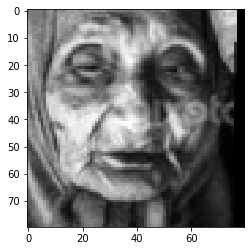

Name: 100_1_2_20170112222336458.jpg.chip.jpg
Age: 100
Sex: 1
Ethnicity: 2


In [17]:
#Altro esempio
idx=10
display(images[idx])
print("Name:",files[idx])
print("Age:",target[idx])
print("Sex:",features[idx][0])
print("Ethnicity:",features[idx][1])

In [54]:
#split dei dati
#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files, test_size=0.2,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 18956
Samples in Testing: 4739


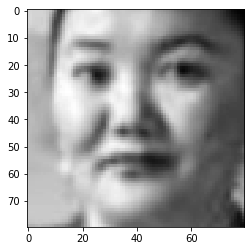

36
[1 2]
36_1_2_20170109134229652.jpg.chip.jpg


In [58]:
#Da togliere
idx=1
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])

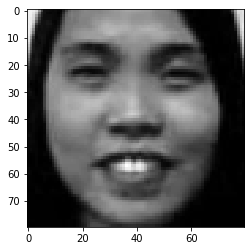

26
[1 2]
26_1_2_20170116220837093.jpg.chip.jpg


In [59]:
#Da togliere
idx=1
display(images_test[idx])
print(y_test[idx])
print(feat_test[idx])
print(fileName_test[idx])

In [25]:
from pathlib import Path
import shutil
from collections import Counter

#controllo se le cartelle test e training sono già presenti
print("Cartella training?",os.path.isdir("training"))
print("Cartella test?",os.path.isdir("test"))


#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (os.path.isdir("test"))):
    trElements = os.listdir("training/")
    teElements = os.listdir("test/")
    if((Counter(fileName_train) == Counter(trElements)) and (Counter(fileName_test) == Counter(teElements))):
        firstExec = False

print("Prima esecuzione?",firstExec)

Cartella training? True
Cartella test? True
Prima esecuzione? True


In [26]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,images_train.shape[0]):
        shutil.copy(path+fileName_train[i],"training/"+fileName_train[i])
    trElements = os.listdir("training/")
    #print(set(name_train).symmetric_difference(set(trElements)))
    assert Counter(fileName_train) == Counter(trElements),set(fileName_train).symmetric_difference(set(trElements))
    
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,images_test.shape[0]):
        shutil.copy(path+fileName_test[i],"test/"+fileName_test[i])
    teElements = os.listdir("test/")
    assert Counter(fileName_test) == Counter(teElements),set(fileName_test).symmetric_difference(set(teElements))
    

AssertionError: {'85_1_0_20170110183559248.jpg.chip.jpg', '35_0_3_20170119200913517.jpg.chip.jpg', '34_1_0_20170117182752390.jpg.chip.jpg', '42_0_0_20170117154802826.jpg.chip.jpg', '60_1_0_20170110122932443.jpg.chip.jpg', '1_0_4_20161221202006449.jpg.chip.jpg', '45_0_1_20170113181825862.jpg.chip.jpg', '1_0_2_20161219211707638.jpg.chip.jpg', '27_0_0_20170116203031756.jpg.chip.jpg', '23_1_1_20170112192422750.jpg.chip.jpg', '51_0_3_20170119205613657.jpg.chip.jpg', '40_0_0_20170117134415492.jpg.chip.jpg', '61_0_0_20170117192036844.jpg.chip.jpg', '16_0_0_20170110232429214.jpg.chip.jpg', '10_0_0_20170110225505288.jpg.chip.jpg', '28_1_3_20170104231422265.jpg.chip.jpg', '56_0_0_20170111202352043.jpg.chip.jpg', '65_0_1_20170117172856561.jpg.chip.jpg', '2_0_0_20170110224730142.jpg.chip.jpg', '58_0_0_20170105173559373.jpg.chip.jpg', '21_1_2_20170103201800511.jpg.chip.jpg', '60_0_0_20170111203255875.jpg.chip.jpg', '73_1_0_20170110125254674.jpg.chip.jpg', '28_0_1_20170113161237182.jpg.chip.jpg', '52_0_0_20170104204156747.jpg.chip.jpg', '63_1_0_20170110160643845.jpg.chip.jpg', '4_1_0_20170109192110040.jpg.chip.jpg', '46_1_0_20170109002625012.jpg.chip.jpg', '26_0_0_20170119184315753.jpg.chip.jpg', '58_0_0_20170109013804013.jpg.chip.jpg', '64_1_0_20170110160643892.jpg.chip.jpg', '43_0_0_20170104172942851.jpg.chip.jpg', '26_0_4_20170117201113262.jpg.chip.jpg', '26_1_2_20170116184502052.jpg.chip.jpg', '26_1_3_20170119193140714.jpg.chip.jpg', '38_1_3_20170105002639123.jpg.chip.jpg', '37_1_3_20170104235312145.jpg.chip.jpg', '26_0_3_20170119181351882.jpg.chip.jpg', '40_0_0_20170116232927836.jpg.chip.jpg', '14_1_0_20170109214345916.jpg.chip.jpg', '45_0_1_20170113180901829.jpg.chip.jpg', '2_1_4_20161221202353640.jpg.chip.jpg', '14_0_3_20170104013434256.jpg.chip.jpg', '26_0_2_20170116182447321.jpg.chip.jpg', '32_1_1_20170113000704411.jpg.chip.jpg', '23_0_1_20170120133824503.jpg.chip.jpg', '26_1_0_20170117174148184.jpg.chip.jpg', '38_0_3_20170104230714113.jpg.chip.jpg', '32_1_0_20170117094855375.jpg.chip.jpg', '4_0_0_20170110213317110.jpg.chip.jpg', '16_1_0_20170109214333355.jpg.chip.jpg', '34_0_0_20170113142058154.jpg.chip.jpg', '1_1_2_20161219220348151.jpg.chip.jpg', '25_0_0_20170117151647102.jpg.chip.jpg', '72_1_0_20170110175634167.jpg.chip.jpg', '4_0_0_20170110213441609.jpg.chip.jpg', '45_0_1_20170117154348380.jpg.chip.jpg', '22_1_3_20170104222857952.jpg.chip.jpg', '85_1_0_20170110181632797.jpg.chip.jpg', '35_0_0_20170117134946022.jpg.chip.jpg', '19_1_0_20170103162951552.jpg.chip.jpg', '1_0_1_20170110212837862.jpg.chip.jpg', '37_0_1_20170117164514945.jpg.chip.jpg', '30_1_2_20170116191239121.jpg.chip.jpg', '22_1_4_20170103223002341.jpg.chip.jpg', '47_0_3_20170119205239944.jpg.chip.jpg', '16_0_0_20170110231645188.jpg.chip.jpg', '58_0_0_20170120225226444.jpg.chip.jpg', '66_0_3_20170104213153549.jpg.chip.jpg', '26_1_4_20170117201351845.jpg.chip.jpg', '38_0_0_20170117140605859.jpg.chip.jpg', '38_1_0_20170104184650846.jpg.chip.jpg', '3_0_0_20161219161157166.jpg.chip.jpg', '45_0_3_20170119202703548.jpg.chip.jpg', '18_0_1_20170114030419966.jpg.chip.jpg', '19_1_3_20170119192850574.jpg.chip.jpg', '50_1_0_20170117155921969.jpg.chip.jpg', '62_0_2_20170112220447152.jpg.chip.jpg', '9_0_1_20170110215500987.jpg.chip.jpg', '40_0_0_20170117154553185.jpg.chip.jpg', '54_0_0_20170109010246118.jpg.chip.jpg', '22_1_3_20170104222830398.jpg.chip.jpg', '28_1_0_20170104165123368.jpg.chip.jpg', '40_0_4_20170104204553772.jpg.chip.jpg', '65_0_0_20170104185405486.jpg.chip.jpg', '21_0_4_20161223214802865.jpg.chip.jpg', '1_1_4_20161221200207440.jpg.chip.jpg', '2_1_2_20161219162336446.jpg.chip.jpg', '27_1_3_20170104223000127.jpg.chip.jpg', '41_0_0_20170120133745342.jpg.chip.jpg', '28_1_2_20170116164741320.jpg.chip.jpg', '46_1_0_20170105172417134.jpg.chip.jpg', '58_0_4_20170117204733657.jpg.chip.jpg', '24_1_3_20161220221743058.jpg.chip.jpg', '30_0_0_20170104201747498.jpg.chip.jpg', '35_1_1_20170117190443525.jpg.chip.jpg', '96_1_2_20170105174624519.jpg.chip.jpg', '19_0_4_20170117193404789.jpg.chip.jpg', '68_1_0_20170110122503348.jpg.chip.jpg', '23_1_0_20170103163123528.jpg.chip.jpg', '65_1_1_20170112215403296.jpg.chip.jpg', '25_1_0_20170117152149428.jpg.chip.jpg', '32_0_1_20170113173627946.jpg.chip.jpg', '34_1_1_20170116164431637.jpg.chip.jpg', '45_0_3_20170119165720733.jpg.chip.jpg', '1_0_0_20161220220239129.jpg.chip.jpg', '40_0_3_20170119210144247.jpg.chip.jpg', '34_1_1_20170115235526613.jpg.chip.jpg', '24_0_4_20170103234945243.jpg.chip.jpg', '8_1_3_20170104221828238.jpg.chip.jpg', '22_1_1_20170113010336430.jpg.chip.jpg', '26_1_1_20170116171855347.jpg.chip.jpg', '34_0_3_20170119175427012.jpg.chip.jpg', '27_0_1_20170113182853263.jpg.chip.jpg', '26_1_2_20170116183011989.jpg.chip.jpg', '27_1_0_20170109013152498.jpg.chip.jpg', '29_0_3_20170119195112307.jpg.chip.jpg', '41_0_0_20170117154648336.jpg.chip.jpg', '8_1_0_20170109204933562.jpg.chip.jpg', '34_0_1_20170113141505428.jpg.chip.jpg', '42_1_1_20170113005717990.jpg.chip.jpg', '32_0_1_20170117140342322.jpg.chip.jpg', '42_1_1_20170112220102774.jpg.chip.jpg', '1_0_4_20161221202132305.jpg.chip.jpg', '26_0_3_20170117153400030.jpg.chip.jpg', '32_1_0_20170105163404036.jpg.chip.jpg', '24_1_2_20170104021011429.jpg.chip.jpg', '26_1_1_20170113012012655.jpg.chip.jpg', '1_0_2_20161219142135209.jpg.chip.jpg', '42_0_0_20170111200657340.jpg.chip.jpg', '49_0_3_20170105172442069.jpg.chip.jpg', '50_0_3_20170104183620454.jpg.chip.jpg', '35_0_1_20170113183259413.jpg.chip.jpg', '12_0_0_20170117145849076.jpg.chip.jpg', '75_0_0_20170111205314158.jpg.chip.jpg', '70_1_0_20170110122250867.jpg.chip.jpg', '25_1_3_20170117141103735.jpg.chip.jpg', '26_0_3_20170119155839538.jpg.chip.jpg', '26_0_1_20170113135339953.jpg.chip.jpg', '54_0_3_20170119210231791.jpg.chip.jpg', '38_1_0_20170117121922741.jpg.chip.jpg', '43_0_1_20170113173701232.jpg.chip.jpg', '23_0_3_20170119163907693.jpg.chip.jpg', '24_1_2_20170104022044502.jpg.chip.jpg', '40_0_3_20170119210237376.jpg.chip.jpg', '26_1_3_20170104232139409.jpg.chip.jpg', '6_1_3_20161220222420627.jpg.chip.jpg', '35_1_0_20170117143853082.jpg.chip.jpg', '26_1_3_20170119155612442.jpg.chip.jpg', '29_0_1_20170117095814736.jpg.chip.jpg', '37_0_3_20170119202228541.jpg.chip.jpg', '8_1_2_20170109204518758.jpg.chip.jpg', '18_0_3_20170119151213151.jpg.chip.jpg', '63_0_0_20170120225708577.jpg.chip.jpg', '24_0_0_20170116205530259.jpg.chip.jpg', '29_1_4_20170117123747223.jpg.chip.jpg', '36_0_0_20170117183307375.jpg.chip.jpg', '48_1_4_20170104181540549.jpg.chip.jpg', '40_1_0_20170105173401214.jpg.chip.jpg', '72_1_0_20170110132145439.jpg.chip.jpg', '47_0_0_20170111181750442.jpg.chip.jpg', '26_1_4_20170117154150500.jpg.chip.jpg', '2_1_0_20170110213155874.jpg.chip.jpg', '39_1_1_20170113011538935.jpg.chip.jpg', '18_1_0_20170109214113667.jpg.chip.jpg', '1_1_0_20170109190845250.jpg.chip.jpg', '21_1_1_20170114030239115.jpg.chip.jpg', '28_0_3_20170119194457163.jpg.chip.jpg', '37_1_1_20170112212055549.jpg.chip.jpg', '34_0_4_20170117141335902.jpg.chip.jpg', '58_0_2_20170112222056864.jpg.chip.jpg', '1_1_3_20161220145210271.jpg.chip.jpg', '51_0_1_20170111200729699.jpg.chip.jpg', '82_0_0_20170113184939024.jpg.chip.jpg', '41_0_4_20170104185252334.jpg.chip.jpg', '30_0_0_20170117135924091.jpg.chip.jpg', '38_0_2_20170105170207172.jpg.chip.jpg', '35_1_2_20170116185947151.jpg.chip.jpg', '61_1_0_20170117192206514.jpg.chip.jpg', '26_1_1_20170112235250049.jpg.chip.jpg', '32_0_2_20170116191452915.jpg.chip.jpg', '32_0_2_20170116191411640.jpg.chip.jpg', '23_0_2_20170116172927637.jpg.chip.jpg', '25_1_0_20170117143946804.jpg.chip.jpg', '10_0_0_20170110220255346.jpg.chip.jpg', '19_0_1_20170116210354987.jpg.chip.jpg', '53_1_0_20170117204229856.jpg.chip.jpg', '26_1_2_20170116184553462.jpg.chip.jpg', '29_1_1_20170116002146102.jpg.chip.jpg', '22_1_1_20170112233613616.jpg.chip.jpg', '1_0_3_20161219225958712.jpg.chip.jpg', '57_1_3_20170104234912850.jpg.chip.jpg', '25_0_3_20170119152752375.jpg.chip.jpg', '37_0_3_20170120221511381.jpg.chip.jpg', '41_1_3_20170109140751299.jpg.chip.jpg', '24_0_3_20170104230150057.jpg.chip.jpg', '1_0_2_20161219194849659.jpg.chip.jpg', '14_0_0_20170103200611317.jpg.chip.jpg', '24_0_2_20170116165212955.jpg.chip.jpg', '30_0_4_20170120133906735.jpg.chip.jpg', '58_0_0_20170111201403999.jpg.chip.jpg', '25_0_3_20170104214444117.jpg.chip.jpg', '75_1_1_20170105003534605.jpg.chip.jpg', '1_0_2_20161219185955277.jpg.chip.jpg', '26_0_0_20170117200559815.jpg.chip.jpg', '59_1_0_20170110122554230.jpg.chip.jpg', '28_0_4_20170103235814852.jpg.chip.jpg', '48_0_1_20170119203634847.jpg.chip.jpg', '26_1_3_20170119193117522.jpg.chip.jpg', '26_0_3_20170104230413577.jpg.chip.jpg', '62_0_0_20170111200849717.jpg.chip.jpg', '72_1_0_20170110152914413.jpg.chip.jpg', '89_0_1_20170116024131102.jpg.chip.jpg', '60_1_0_20170110124140071.jpg.chip.jpg', '35_0_1_20170113151604904.jpg.chip.jpg', '28_0_2_20170116164225550.jpg.chip.jpg', '26_1_1_20170117022253411.jpg.chip.jpg', '27_0_4_20170104194349352.jpg.chip.jpg', '1_1_0_20170109190846125.jpg.chip.jpg', '20_0_0_20170120133527581.jpg.chip.jpg', '46_0_0_20170104204638611.jpg.chip.jpg', '21_0_4_20161223214838473.jpg.chip.jpg', '32_1_1_20170116003159417.jpg.chip.jpg', '28_1_2_20170116161312148.jpg.chip.jpg', '26_1_3_20170119192108257.jpg.chip.jpg', '86_1_0_20170110173815028.jpg.chip.jpg', '44_0_3_20170119195204451.jpg.chip.jpg', '1_0_0_20161219205145821.jpg.chip.jpg', '45_0_3_20170119184244311.jpg.chip.jpg', '44_0_3_20170119195216221.jpg.chip.jpg', '45_0_3_20170119195752949.jpg.chip.jpg', '65_1_0_20170110125326249.jpg.chip.jpg', '77_1_2_20170110175320274.jpg.chip.jpg', '1_0_2_20161219222040503.jpg.chip.jpg', '27_0_1_20170114030833116.jpg.chip.jpg', '26_1_3_20170119193121906.jpg.chip.jpg', '49_1_1_20170113000544753.jpg.chip.jpg', '65_0_0_20170111205148232.jpg.chip.jpg', '61_0_3_20170109015533502.jpg.chip.jpg', '90_0_0_20170120230038954.jpg.chip.jpg', '55_1_0_20170120222035182.jpg.chip.jpg', '17_0_3_20170104225736449.jpg.chip.jpg', '26_1_4_20170117200442221.jpg.chip.jpg', '55_1_0_20170117175304208.jpg.chip.jpg', '28_1_1_20170116013959188.jpg.chip.jpg', '17_1_0_20170104005759343.jpg.chip.jpg', '1_1_0_20170109190534438.jpg.chip.jpg', '34_0_2_20170119165408941.jpg.chip.jpg', '4_0_2_20161219160936862.jpg.chip.jpg', '25_1_0_20170117140418545.jpg.chip.jpg', '50_0_0_20170117160626703.jpg.chip.jpg', '28_1_4_20170109003009492.jpg.chip.jpg', '26_1_4_20170117201502838.jpg.chip.jpg', '36_0_0_20170104181520477.jpg.chip.jpg', '36_0_4_20170104000906228.jpg.chip.jpg', '61_0_0_20170105173233956.jpg.chip.jpg', '38_1_4_20170117203738528.jpg.chip.jpg', '31_1_0_20170117133119014.jpg.chip.jpg', '26_1_2_20170116161912952.jpg.chip.jpg', '24_0_1_20170113180916549.jpg.chip.jpg', '52_0_0_20170111171747350.jpg.chip.jpg', '6_1_2_20161219192319650.jpg.chip.jpg', '30_1_1_20170112204445843.jpg.chip.jpg', '55_0_3_20170119211435313.jpg.chip.jpg', '20_1_2_20170116170359820.jpg.chip.jpg', '54_0_1_20170117190531158.jpg.chip.jpg', '46_1_3_20170120140919993.jpg.chip.jpg', '25_1_2_20170116002224696.jpg.chip.jpg', '30_0_1_20170116191707734.jpg.chip.jpg', '25_1_0_20170116223905448.jpg.chip.jpg', '27_0_0_20170104193647416.jpg.chip.jpg', '27_1_1_20170117165603509.jpg.chip.jpg', '52_0_1_20170113174550147.jpg.chip.jpg', '3_0_2_20161219190552779.jpg.chip.jpg', '48_0_1_20170117173143196.jpg.chip.jpg', '61_0_0_20170104185715382.jpg.chip.jpg', '30_1_1_20170116214526804.jpg.chip.jpg', '55_0_3_20170119204549750.jpg.chip.jpg', '45_0_3_20170119203950879.jpg.chip.jpg', '30_0_1_20170117140615401.jpg.chip.jpg', '32_1_1_20170113011927992.jpg.chip.jpg', '54_1_0_20170117171701754.jpg.chip.jpg', '12_1_0_20170117181943783.jpg.chip.jpg', '25_1_0_20170116223826765.jpg.chip.jpg', '26_1_1_20170116153234172.jpg.chip.jpg', '26_0_4_20170103235020885.jpg.chip.jpg', '56_0_1_20170113174020731.jpg.chip.jpg', '25_0_0_20170116215652482.jpg.chip.jpg', '35_0_0_20170113142115723.jpg.chip.jpg', '43_0_0_20170117155057555.jpg.chip.jpg', '30_1_2_20170116161408096.jpg.chip.jpg', '70_0_0_20170117172220586.jpg.chip.jpg', '73_1_0_20170110131519640.jpg.chip.jpg', '50_1_0_20170109012137723.jpg.chip.jpg', '2_0_4_20161221202918296.jpg.chip.jpg', '50_0_0_20170117160733057.jpg.chip.jpg', '12_1_0_20170109200852145.jpg.chip.jpg', '24_0_3_20170117150546627.jpg.chip.jpg', '83_1_0_20170120230224530.jpg.chip.jpg', '85_0_0_20170117192351268.jpg.chip.jpg', '40_1_0_20170117092211401.jpg.chip.jpg', '21_1_2_20170116171010589.jpg.chip.jpg', '49_0_0_20170104184256957.jpg.chip.jpg', '58_1_0_20170104185557607.jpg.chip.jpg', '34_0_3_20170119200718133.jpg.chip.jpg', '1_0_2_20161219211836743.jpg.chip.jpg', '23_0_3_20170119164205782.jpg.chip.jpg', '39_1_3_20170117141047098.jpg.chip.jpg', '36_0_0_20170117183111094.jpg.chip.jpg', '5_1_2_20161219160435701.jpg.chip.jpg', '28_0_2_20170116191441850.jpg.chip.jpg', '40_1_0_20170109220527167.jpg.chip.jpg', '70_0_3_20170119181040603.jpg.chip.jpg', '43_0_2_20170112220312529.jpg.chip.jpg', '51_1_0_20170110123530286.jpg.chip.jpg', '30_0_2_20170116173516742.jpg.chip.jpg', '16_0_0_20170110232142982.jpg.chip.jpg', '28_1_0_20170117180708809.jpg.chip.jpg', '42_0_0_20170117185734922.jpg.chip.jpg', '1_0_2_20161219141529089.jpg.chip.jpg', '88_1_0_20170110183050254.jpg.chip.jpg', '60_1_0_20170110131759572.jpg.chip.jpg', '7_0_1_20170110224720024.jpg.chip.jpg', '66_0_1_20170111171747645.jpg.chip.jpg', '45_0_1_20170117135648741.jpg.chip.jpg', '5_0_0_20170110212804775.jpg.chip.jpg', '38_1_3_20170104234724459.jpg.chip.jpg', '1_0_0_20161219225850912.jpg.chip.jpg', '10_1_0_20170109202346880.jpg.chip.jpg', '36_0_1_20170116030458993.jpg.chip.jpg', '54_1_0_20170117171243020.jpg.chip.jpg', '4_0_0_20170104010859393.jpg.chip.jpg', '27_1_1_20170114031455929.jpg.chip.jpg', '63_0_0_20170113210319862.jpg.chip.jpg', '37_1_1_20170116222809020.jpg.chip.jpg', '45_1_0_20170109150822520.jpg.chip.jpg', '80_1_0_20170110122234919.jpg.chip.jpg', '26_1_3_20170119180600308.jpg.chip.jpg', '27_1_1_20170117010425092.jpg.chip.jpg', '74_0_2_20170105174417462.jpg.chip.jpg', '41_0_3_20170119175402515.jpg.chip.jpg', '79_1_0_20170110131753196.jpg.chip.jpg', '88_1_0_20170110132552849.jpg.chip.jpg', '26_0_3_20170119145951982.jpg.chip.jpg', '2_1_3_20161219224442584.jpg.chip.jpg', '24_0_0_20170116224743469.jpg.chip.jpg', '6_0_2_20161219190713643.jpg.chip.jpg', '36_0_0_20170104204247899.jpg.chip.jpg', '30_0_4_20170117151010732.jpg.chip.jpg', '21_1_1_20170117193838829.jpg.chip.jpg', '28_1_4_20170117202558575.jpg.chip.jpg', '26_0_3_20170119164220254.jpg.chip.jpg', '28_1_0_20170120140301800.jpg.chip.jpg', '35_1_0_20170117191520420.jpg.chip.jpg', '51_0_0_20170120222842138.jpg.chip.jpg', '29_0_0_20170117010705850.jpg.chip.jpg', '55_0_0_20170120221341989.jpg.chip.jpg', '81_1_0_20170120230502538.jpg.chip.jpg', '37_1_0_20170103183009635.jpg.chip.jpg', '20_0_0_20170113132609281.jpg.chip.jpg', '39_0_1_20170116193433706.jpg.chip.jpg', '24_1_0_20170116174513932.jpg.chip.jpg', '25_0_1_20170113145218790.jpg.chip.jpg', '26_0_3_20170117154746934.jpg.chip.jpg', '30_0_0_20170120134248646.jpg.chip.jpg', '1_0_2_20161219162726231.jpg.chip.jpg', '55_1_0_20170110122115175.jpg.chip.jpg', '1_0_0_20170109193647852.jpg.chip.jpg', '25_1_0_20170117142855562.jpg.chip.jpg', '32_1_3_20170109141339133.jpg.chip.jpg', '20_1_3_20170117141155272.jpg.chip.jpg', '27_0_3_20170120220034035.jpg.chip.jpg', '35_1_2_20170116191855858.jpg.chip.jpg', '37_1_3_20170119202513781.jpg.chip.jpg', '14_1_0_20170104005937407.jpg.chip.jpg', '24_1_1_20170115235630663.jpg.chip.jpg', '26_1_0_20170117174305030.jpg.chip.jpg', '64_0_0_20170117155540137.jpg.chip.jpg', '22_1_2_20170116172557623.jpg.chip.jpg', '39_1_2_20170116192459890.jpg.chip.jpg', '23_0_3_20170119150001740.jpg.chip.jpg', '75_1_0_20170110183152937.jpg.chip.jpg', '27_1_3_20170104235412059.jpg.chip.jpg', '30_1_1_20170113003552730.jpg.chip.jpg', '30_1_0_20170117131057509.jpg.chip.jpg', '41_0_0_20170117131137875.jpg.chip.jpg', '24_1_3_20170117150638948.jpg.chip.jpg', '70_0_2_20161219160529735.jpg.chip.jpg', '45_0_0_20170117181001561.jpg.chip.jpg', '85_1_1_20170110183033556.jpg.chip.jpg', '24_1_0_20170117194857869.jpg.chip.jpg', '20_1_1_20170116162433766.jpg.chip.jpg', '19_1_1_20170114030819891.jpg.chip.jpg', '23_1_0_20170104021538021.jpg.chip.jpg', '43_1_3_20170109142242047.jpg.chip.jpg', '65_0_0_20170113185234983.jpg.chip.jpg', '24_0_4_20170117194356247.jpg.chip.jpg', '22_1_1_20170112192911566.jpg.chip.jpg', '24_1_1_20170113011328232.jpg.chip.jpg', '38_0_0_20170117135518125.jpg.chip.jpg', '12_1_0_20170109204241570.jpg.chip.jpg', '22_1_2_20170116172705545.jpg.chip.jpg', '26_1_3_20170117153630883.jpg.chip.jpg', '58_1_0_20170113210319682.jpg.chip.jpg', '1_0_2_20161219203325644.jpg.chip.jpg', '26_0_0_20170117172928270.jpg.chip.jpg', '42_0_0_20170117185757210.jpg.chip.jpg', '8_0_0_20170110225315590.jpg.chip.jpg', '1_1_3_20161220220536274.jpg.chip.jpg', '55_0_0_20170104212248372.jpg.chip.jpg', '26_0_0_20170113210127179.jpg.chip.jpg', '35_0_0_20170117190124521.jpg.chip.jpg', '73_0_1_20170117195325010.jpg.chip.jpg', '34_0_0_20170109001224685.jpg.chip.jpg', '51_0_0_20170111181750489.jpg.chip.jpg', '26_1_3_20170119193114418.jpg.chip.jpg', '3_1_4_20161221193144389.jpg.chip.jpg', '35_0_0_20170116201412933.jpg.chip.jpg', '31_0_1_20170117021841979.jpg.chip.jpg', '24_1_4_20170104005617062.jpg.chip.jpg', '25_0_3_20170119171146199.jpg.chip.jpg', '64_0_0_20170104183732293.jpg.chip.jpg', '85_1_0_20170110181630306.jpg.chip.jpg', '26_1_1_20170117174116677.jpg.chip.jpg', '49_1_0_20170109141328213.jpg.chip.jpg', '70_0_3_20170119205722199.jpg.chip.jpg', '26_0_1_20170116204838256.jpg.chip.jpg', '26_1_1_20170116231033348.jpg.chip.jpg', '7_1_0_20170109200923305.jpg.chip.jpg', '21_1_0_20170117142653808.jpg.chip.jpg', '1_0_3_20161219225721496.jpg.chip.jpg', '26_0_0_20170119180056835.jpg.chip.jpg', '24_1_1_20170112234357224.jpg.chip.jpg', '56_0_2_20170112205301691.jpg.chip.jpg', '26_1_1_20170117155009422.jpg.chip.jpg', '32_0_4_20170104204203947.jpg.chip.jpg', '34_0_3_20170119195442526.jpg.chip.jpg', '32_0_0_20170117182301037.jpg.chip.jpg', '22_1_2_20170116172707989.jpg.chip.jpg', '20_1_3_20170119153422217.jpg.chip.jpg', '11_1_4_20170103201747167.jpg.chip.jpg', '26_0_0_20170117170706453.jpg.chip.jpg', '34_1_4_20170103230444089.jpg.chip.jpg', '45_0_0_20170113183417861.jpg.chip.jpg', '63_0_0_20170113173302611.jpg.chip.jpg', '31_1_4_20170117203039631.jpg.chip.jpg', '1_0_2_20161219162118102.jpg.chip.jpg', '26_1_3_20170117153635595.jpg.chip.jpg', '42_0_0_20170117154729044.jpg.chip.jpg', '25_1_2_20170116175247157.jpg.chip.jpg', '60_0_3_20170119210242095.jpg.chip.jpg', '29_1_2_20170116165527351.jpg.chip.jpg', '58_0_3_20170119211734608.jpg.chip.jpg', '35_0_3_20170119201222820.jpg.chip.jpg', '45_1_0_20170117190023859.jpg.chip.jpg', '40_0_2_20170116233718823.jpg.chip.jpg', '28_1_3_20170119194924075.jpg.chip.jpg', '21_1_1_20170112231854926.jpg.chip.jpg', '42_1_0_20170103183246362.jpg.chip.jpg', '29_0_1_20170117181012475.jpg.chip.jpg', '24_0_2_20170116170633399.jpg.chip.jpg', '29_1_3_20170104232640192.jpg.chip.jpg', '32_0_0_20170104201035977.jpg.chip.jpg', '72_0_1_20170111210712990.jpg.chip.jpg', '40_0_1_20170120220605251.jpg.chip.jpg', '3_0_0_20161219211053581.jpg.chip.jpg', '52_0_3_20170104214700621.jpg.chip.jpg', '45_0_4_20170117202958949.jpg.chip.jpg', '35_0_0_20170104183852983.jpg.chip.jpg', '24_1_1_20170113003752421.jpg.chip.jpg', '22_1_0_20170105184130182.jpg.chip.jpg', '25_1_0_20170117152023187.jpg.chip.jpg', '17_1_0_20170109205309078.jpg.chip.jpg', '36_0_0_20170113184119879.jpg.chip.jpg', '30_1_1_20170116012131745.jpg.chip.jpg', '38_1_1_20170113001855604.jpg.chip.jpg', '3_1_4_20161221202539569.jpg.chip.jpg', '34_0_3_20170113190318416.jpg.chip.jpg', '35_0_0_20170117195418222.jpg.chip.jpg', '26_1_1_20170116220051881.jpg.chip.jpg', '28_0_1_20170114032935025.jpg.chip.jpg', '55_1_3_20170109142107754.jpg.chip.jpg', '27_0_1_20170116001407357.jpg.chip.jpg', '60_0_1_20170113185153840.jpg.chip.jpg', '65_0_2_20170111205651706.jpg.chip.jpg', '80_1_3_20170119212033985.jpg.chip.jpg', '12_1_1_20170116225216163.jpg.chip.jpg', '45_0_1_20170117140619918.jpg.chip.jpg', '30_1_3_20170119195850724.jpg.chip.jpg', '28_0_0_20170116211700944.jpg.chip.jpg', '55_0_0_20170117190028027.jpg.chip.jpg', '45_0_0_20170117191556772.jpg.chip.jpg', '54_0_3_20170119180901955.jpg.chip.jpg', '92_1_0_20170110175809576.jpg.chip.jpg', '32_1_0_20170117092300323.jpg.chip.jpg', '30_0_0_20170104164938536.jpg.chip.jpg', '9_0_0_20170110225018913.jpg.chip.jpg', '54_0_3_20170119210230016.jpg.chip.jpg', '5_1_0_20170109193957869.jpg.chip.jpg', '45_1_1_20170112234408154.jpg.chip.jpg', '31_1_3_20170109140727630.jpg.chip.jpg', '14_1_4_20170103233153851.jpg.chip.jpg', '4_0_0_20161219204117636.jpg.chip.jpg', '36_0_1_20170113161345795.jpg.chip.jpg', '56_1_0_20170110154644528.jpg.chip.jpg', '4_1_1_20161219160501453.jpg.chip.jpg', '62_0_0_20170111205902585.jpg.chip.jpg', '13_1_1_20170109204443201.jpg.chip.jpg', '75_0_0_20170111204855557.jpg.chip.jpg', '88_1_0_20170110183704246.jpg.chip.jpg', '8_1_0_20170109203248565.jpg.chip.jpg', '56_1_3_20170109141321745.jpg.chip.jpg', '47_0_0_20170116233351586.jpg.chip.jpg', '22_1_0_20170116220644040.jpg.chip.jpg', '15_0_0_20170110232515682.jpg.chip.jpg', '35_0_0_20170120220934299.jpg.chip.jpg', '2_0_2_20161219141236632.jpg.chip.jpg', '36_1_2_20170104171636882.jpg.chip.jpg', '30_1_1_20170112210348446.jpg.chip.jpg', '32_0_1_20170113173619394.jpg.chip.jpg', '26_0_1_20170113134247025.jpg.chip.jpg', '5_1_0_20170109193656512.jpg.chip.jpg', '30_0_1_20170113141819444.jpg.chip.jpg', '2_0_4_20161221202147913.jpg.chip.jpg', '5_1_0_20170117140150663.jpg.chip.jpg', '40_0_0_20170113210126285.jpg.chip.jpg', '12_0_4_20170103200626630.jpg.chip.jpg', '12_1_3_20170104221704334.jpg.chip.jpg', '8_1_0_20170109203314749.jpg.chip.jpg', '21_1_2_20170116170801014.jpg.chip.jpg', '2_0_3_20161220143058738.jpg.chip.jpg', '52_0_2_20170117161035782.jpg.chip.jpg', '64_0_4_20170103184049701.jpg.chip.jpg', '35_0_4_20170117153010428.jpg.chip.jpg', '6_0_2_20161219195226635.jpg.chip.jpg', '50_1_3_20170104181430093.jpg.chip.jpg', '1_0_3_20161220143117879.jpg.chip.jpg', '21_0_1_20170113133205762.jpg.chip.jpg', '44_0_3_20170119204716767.jpg.chip.jpg', '35_0_0_20170117185333778.jpg.chip.jpg', '23_0_3_20170119164006043.jpg.chip.jpg', '59_0_3_20170104212824964.jpg.chip.jpg', '51_1_2_20170104212216588.jpg.chip.jpg', '24_0_2_20170116170804180.jpg.chip.jpg', '26_0_1_20170117170403771.jpg.chip.jpg', '17_1_1_20170109214110957.jpg.chip.jpg', '2_0_2_20161219202702788.jpg.chip.jpg', '29_0_1_20170117094745480.jpg.chip.jpg', '38_1_4_20170105173608614.jpg.chip.jpg', '40_0_0_20170116224626718.jpg.chip.jpg', '1_1_2_20161219212313989.jpg.chip.jpg', '26_1_1_20170116171052794.jpg.chip.jpg', '40_0_0_20170105172604533.jpg.chip.jpg', '26_1_1_20170112213024014.jpg.chip.jpg', '31_0_1_20170116011033268.jpg.chip.jpg', '61_0_1_20170117194340081.jpg.chip.jpg', '26_0_1_20170113135304305.jpg.chip.jpg', '5_1_2_20170109193543217.jpg.chip.jpg', '29_1_1_20170112210246493.jpg.chip.jpg', '24_1_4_20170117194845444.jpg.chip.jpg', '24_1_2_20170116171034407.jpg.chip.jpg', '8_1_3_20170104222705308.jpg.chip.jpg', '46_0_3_20170119200749075.jpg.chip.jpg', '30_1_1_20170114031027306.jpg.chip.jpg', '24_1_0_20170117194813077.jpg.chip.jpg', '40_0_1_20170113155337187.jpg.chip.jpg', '81_0_0_20170111211419693.jpg.chip.jpg', '75_1_0_20170110180500719.jpg.chip.jpg', '34_0_4_20170113161453036.jpg.chip.jpg', '34_1_1_20170103230340961.jpg.chip.jpg', '26_1_0_20170116220842573.jpg.chip.jpg', '26_1_1_20170117003333387.jpg.chip.jpg', '64_1_0_20170110182136419.jpg.chip.jpg', '42_0_2_20170104192610039.jpg.chip.jpg', '26_1_2_20170116180315571.jpg.chip.jpg', '53_1_3_20170119205926527.jpg.chip.jpg', '16_1_3_20170104223040239.jpg.chip.jpg', '54_1_1_20170117204543384.jpg.chip.jpg', '22_0_0_20170116220735674.jpg.chip.jpg', '28_0_1_20170113151216654.jpg.chip.jpg', '43_0_3_20170117000751907.jpg.chip.jpg', '4_1_0_20170116215618294.jpg.chip.jpg', '27_1_3_20170104223119591.jpg.chip.jpg', '2_1_2_20161219195813835.jpg.chip.jpg', '22_0_1_20170116214330918.jpg.chip.jpg', '52_1_0_20170104210704511.jpg.chip.jpg', '29_0_3_20170119195311083.jpg.chip.jpg', '8_0_0_20170117175629731.jpg.chip.jpg', '30_1_4_20170109135421119.jpg.chip.jpg', '7_1_0_20170114025204820.jpg.chip.jpg', '1_0_2_20161219162514182.jpg.chip.jpg', '37_0_0_20170109010706831.jpg.chip.jpg', '23_0_0_20170117144642723.jpg.chip.jpg', '1_0_3_20161219225116535.jpg.chip.jpg', '80_0_0_20170117175258116.jpg.chip.jpg', '65_1_0_20170110140804905.jpg.chip.jpg', '32_0_3_20170119200337060.jpg.chip.jpg', '29_1_1_20170117193933170.jpg.chip.jpg', '53_1_0_20170110141355976.jpg.chip.jpg', '34_0_0_20170117103412719.jpg.chip.jpg', '34_0_1_20170116003716387.jpg.chip.jpg', '1_1_0_20170109193704430.jpg.chip.jpg', '35_0_0_20170117183005428.jpg.chip.jpg', '28_1_3_20170119195056772.jpg.chip.jpg', '28_0_0_20170116212053311.jpg.chip.jpg', '26_1_3_20170117173653317.jpg.chip.jpg', '58_0_3_20170119211627367.jpg.chip.jpg', '38_1_1_20170112231328158.jpg.chip.jpg', '37_1_3_20170119152842760.jpg.chip.jpg', '95_1_0_20170120230322267.jpg.chip.jpg', '28_1_0_20170117122007867.jpg.chip.jpg', '8_1_0_20170109201746036.jpg.chip.jpg', '23_0_0_20170117144618155.jpg.chip.jpg', '25_1_0_20170116220238281.jpg.chip.jpg', '58_0_0_20170111223603548.jpg.chip.jpg', '25_1_3_20170104232101034.jpg.chip.jpg', '37_0_2_20170116184948230.jpg.chip.jpg', '42_0_4_20170104202440690.jpg.chip.jpg', '47_1_0_20170109012509904.jpg.chip.jpg', '19_0_1_20170117193231107.jpg.chip.jpg', '80_0_0_20170111222041471.jpg.chip.jpg', '35_1_0_20170104181321972.jpg.chip.jpg', '3_1_0_20170109193506319.jpg.chip.jpg', '1_0_0_20170110205409644.jpg.chip.jpg', '26_1_1_20170112213116517.jpg.chip.jpg', '54_1_0_20170117171505517.jpg.chip.jpg', '75_0_0_20170111204138781.jpg.chip.jpg', '5_0_0_20170110213554657.jpg.chip.jpg', '8_0_3_20170104230746993.jpg.chip.jpg', '1_0_0_20170109193826712.jpg.chip.jpg', '50_0_3_20170119204422855.jpg.chip.jpg', '38_0_2_20170116232740686.jpg.chip.jpg', '41_0_0_20170117140625076.jpg.chip.jpg', '70_0_0_20170117160343399.jpg.chip.jpg', '7_1_0_20170109204800702.jpg.chip.jpg', '25_1_2_20170116003442393.jpg.chip.jpg', '23_1_0_20170103163120968.jpg.chip.jpg', '3_0_2_20161219161700237.jpg.chip.jpg', '26_0_3_20170119180343596.jpg.chip.jpg', '29_0_1_20170113173014241.jpg.chip.jpg', '75_0_0_20170111205133334.jpg.chip.jpg', '25_1_3_20170119171917192.jpg.chip.jpg', '72_1_0_20170110184104942.jpg.chip.jpg', '30_1_4_20170117143606826.jpg.chip.jpg', '3_0_2_20161219212426998.jpg.chip.jpg', '70_1_0_20170120220622170.jpg.chip.jpg', '3_0_4_20161221193723542.jpg.chip.jpg', '75_1_1_20170112211657821.jpg.chip.jpg', '70_0_0_20170117174910845.jpg.chip.jpg', '29_1_1_20170116021855730.jpg.chip.jpg', '2_0_2_20161219200225291.jpg.chip.jpg', '1_1_3_20161219225024289.jpg.chip.jpg', '28_1_1_20170117180712098.jpg.chip.jpg', '55_0_1_20170120134315207.jpg.chip.jpg', '26_0_3_20170119180844118.jpg.chip.jpg', '43_1_3_20170119193027273.jpg.chip.jpg', '22_1_2_20170116165023471.jpg.chip.jpg', '28_0_1_20170116193402600.jpg.chip.jpg', '18_1_3_20170117135709510.jpg.chip.jpg', '52_0_0_20170119205653447.jpg.chip.jpg', '27_0_0_20170117202108094.jpg.chip.jpg', '1_0_2_20161219201403764.jpg.chip.jpg', '53_0_0_20170117154958988.jpg.chip.jpg', '18_1_0_20170109212956509.jpg.chip.jpg', '14_0_0_20170110225405549.jpg.chip.jpg', '1_0_4_20170103202412648.jpg.chip.jpg', '76_0_0_20170111210148707.jpg.chip.jpg', '26_0_0_20170117171705044.jpg.chip.jpg', '40_1_0_20170117143211602.jpg.chip.jpg', '26_1_1_20170116225013300.jpg.chip.jpg', '30_1_3_20170117181342861.jpg.chip.jpg', '50_0_3_20170117144239634.jpg.chip.jpg', '37_1_0_20170103183016626.jpg.chip.jpg', '85_1_0_20170110182138154.jpg.chip.jpg', '14_0_0_20170116222402683.jpg.chip.jpg', '27_1_1_20170113000855147.jpg.chip.jpg', '8_0_0_20170110220118138.jpg.chip.jpg', '18_0_0_20170103201308008.jpg.chip.jpg', '29_1_3_20170119152650912.jpg.chip.jpg', '42_0_2_20170112215219256.jpg.chip.jpg', '50_1_0_20170104205235021.jpg.chip.jpg', '7_1_1_20170112210604630.jpg.chip.jpg', '36_0_3_20170104220702798.jpg.chip.jpg', '27_1_2_20170116184848621.jpg.chip.jpg', '49_0_3_20170119205456552.jpg.chip.jpg', '49_0_4_20170104210433927.jpg.chip.jpg', '12_1_0_20170109201114375.jpg.chip.jpg', '8_1_0_20170117175940947.jpg.chip.jpg', '85_1_0_20170110182111721.jpg.chip.jpg', '18_1_0_20170109213935367.jpg.chip.jpg', '3_1_0_20170109193839054.jpg.chip.jpg', '43_1_0_20170103183515393.jpg.chip.jpg', '28_0_3_20170119194512651.jpg.chip.jpg', '27_0_1_20170117134943088.jpg.chip.jpg', '34_1_0_20170104233858010.jpg.chip.jpg', '38_0_1_20170116200942002.jpg.chip.jpg', '1_1_0_20170109191010113.jpg.chip.jpg', '1_0_2_20161219140748280.jpg.chip.jpg', '34_1_0_20170119151149436.jpg.chip.jpg', '1_1_0_20170109190742179.jpg.chip.jpg', '4_1_3_20161220223310227.jpg.chip.jpg', '1_1_4_20161221193459566.jpg.chip.jpg', '52_1_0_20170110151437658.jpg.chip.jpg', '37_0_3_20170119202343501.jpg.chip.jpg', '27_0_1_20170117013724759.jpg.chip.jpg', '27_1_0_20170113180930981.jpg.chip.jpg', '31_1_0_20170103182528433.jpg.chip.jpg', '30_0_3_20170119195740600.jpg.chip.jpg', '18_0_3_20170104225812688.jpg.chip.jpg', '27_1_0_20170119154437418.jpg.chip.jpg', '28_0_1_20170117165412909.jpg.chip.jpg', '89_0_1_20170117193440263.jpg.chip.jpg', '29_1_1_20170116231920226.jpg.chip.jpg', '26_1_4_20170117153408062.jpg.chip.jpg', '37_0_2_20170105163305795.jpg.chip.jpg', '28_0_1_20170116203937699.jpg.chip.jpg', '26_0_2_20170119180632923.jpg.chip.jpg', '26_1_3_20170119193139994.jpg.chip.jpg', '5_1_0_20170109192816278.jpg.chip.jpg', '1_0_2_20161219222602319.jpg.chip.jpg', '16_0_1_20170116161243731.jpg.chip.jpg', '12_1_0_20170109203631496.jpg.chip.jpg', '38_0_0_20170113210604697.jpg.chip.jpg', '24_1_1_20170116000700293.jpg.chip.jpg', '27_1_1_20170117165225648.jpg.chip.jpg', '65_0_2_20170112223951171.jpg.chip.jpg', '40_1_1_20170113005623327.jpg.chip.jpg', '26_1_0_20170103234817732.jpg.chip.jpg', '38_1_4_20170109002426534.jpg.chip.jpg', '26_1_0_20170117003252979.jpg.chip.jpg', '24_1_4_20170117150727939.jpg.chip.jpg', '4_1_0_20170109202352144.jpg.chip.jpg', '35_1_0_20170117170842874.jpg.chip.jpg', '38_1_4_20170117203646323.jpg.chip.jpg', '15_1_0_20170109213555287.jpg.chip.jpg', '29_0_0_20170117180851443.jpg.chip.jpg', '38_0_0_20170117120726722.jpg.chip.jpg', '35_0_1_20170117141840057.jpg.chip.jpg', '29_0_0_20170116214300022.jpg.chip.jpg', '2_1_4_20170103210839634.jpg.chip.jpg', '51_1_1_20170112213230359.jpg.chip.jpg', '3_1_2_20161219155533269.jpg.chip.jpg', '35_0_1_20170113134747002.jpg.chip.jpg', '5_0_2_20161220145611447.jpg.chip.jpg', '18_1_0_20170109213931089.jpg.chip.jpg', '26_0_3_20170119180459012.jpg.chip.jpg', '28_0_1_20170117021357609.jpg.chip.jpg', '66_1_0_20170117175408412.jpg.chip.jpg', '67_0_0_20170108235729190.jpg.chip.jpg', '24_0_2_20170116165054448.jpg.chip.jpg', '2_1_4_20170103212142324.jpg.chip.jpg', '12_0_0_20170110221819113.jpg.chip.jpg', '35_0_1_20170116030207320.jpg.chip.jpg', '50_0_2_20170116172953191.jpg.chip.jpg', '13_1_0_20170109204325267.jpg.chip.jpg', '27_0_1_20170113135622875.jpg.chip.jpg', '62_1_0_20170110133917734.jpg.chip.jpg', '2_1_0_20170109192459049.jpg.chip.jpg', '45_1_0_20170104211742180.jpg.chip.jpg', '1_1_0_20170109191225850.jpg.chip.jpg', '22_0_3_20170119162746691.jpg.chip.jpg', '54_0_0_20170113185012688.jpg.chip.jpg', '58_0_3_20170119211659305.jpg.chip.jpg', '28_0_1_20170113145417934.jpg.chip.jpg', '24_0_0_20170116204032263.jpg.chip.jpg', '45_0_3_20170119183426844.jpg.chip.jpg', '54_0_3_20170117155453576.jpg.chip.jpg', '28_1_1_20170112202844634.jpg.chip.jpg', '40_0_2_20170116173555334.jpg.chip.jpg', '40_0_0_20170117134408032.jpg.chip.jpg', '26_0_3_20170119180330838.jpg.chip.jpg', '25_1_2_20170104015850244.jpg.chip.jpg', '32_0_1_20170117010054839.jpg.chip.jpg', '15_1_0_20170109214409051.jpg.chip.jpg', '29_1_1_20170116222853534.jpg.chip.jpg', '53_0_0_20170120223001107.jpg.chip.jpg', '8_1_0_20170109204251231.jpg.chip.jpg', '34_1_0_20170112203838660.jpg.chip.jpg', '55_0_0_20170117160031913.jpg.chip.jpg', '56_0_3_20170105180548406.jpg.chip.jpg', '47_0_3_20170119205156254.jpg.chip.jpg', '27_1_1_20170116162433766.jpg.chip.jpg', '30_0_4_20170117125946865.jpg.chip.jpg', '17_1_0_20170109214021426.jpg.chip.jpg', '24_1_3_20170104232545657.jpg.chip.jpg', '13_1_4_20170103212548662.jpg.chip.jpg', '26_1_0_20170117091743194.jpg.chip.jpg', '31_0_0_20170116003010656.jpg.chip.jpg', '24_1_4_20170117150521764.jpg.chip.jpg', '24_1_2_20170116171551289.jpg.chip.jpg', '39_1_1_20170112235246130.jpg.chip.jpg', '36_1_1_20170112233326423.jpg.chip.jpg', '38_1_0_20170117154131675.jpg.chip.jpg', '26_0_3_20170117153347116.jpg.chip.jpg', '57_0_0_20170109001651801.jpg.chip.jpg', '4_1_0_20170103223021271.jpg.chip.jpg', '26_0_0_20170116232619054.jpg.chip.jpg', '26_1_0_20170117201635534.jpg.chip.jpg', '34_0_0_20170109013537513.jpg.chip.jpg', '3_1_3_20161219230106056.jpg.chip.jpg', '35_0_0_20170116180415475.jpg.chip.jpg', '27_1_2_20170116165955213.jpg.chip.jpg', '23_1_2_20170116173125516.jpg.chip.jpg', '31_1_2_20170109141257277.jpg.chip.jpg', '33_1_1_20170113000321114.jpg.chip.jpg', '54_0_3_20170119210111784.jpg.chip.jpg', '20_1_1_20170117195034455.jpg.chip.jpg', '4_1_3_20161219230102512.jpg.chip.jpg', '25_0_0_20170120134516424.jpg.chip.jpg', '75_1_0_20170110181942190.jpg.chip.jpg', '70_0_0_20170117175004342.jpg.chip.jpg', '31_1_1_20170113002013869.jpg.chip.jpg', '50_1_2_20170104210635740.jpg.chip.jpg', '8_1_0_20170109203433105.jpg.chip.jpg', '58_0_0_20170117193308276.jpg.chip.jpg', '35_1_1_20170117005839967.jpg.chip.jpg', '26_1_3_20170119192323474.jpg.chip.jpg', '52_1_0_20170109221143312.jpg.chip.jpg', '29_0_0_20170108223214078.jpg.chip.jpg', '4_1_0_20170109191135825.jpg.chip.jpg', '31_0_1_20170113175708996.jpg.chip.jpg', '58_0_0_20170111203101211.jpg.chip.jpg', '2_0_2_20161219190253835.jpg.chip.jpg', '35_0_1_20170117141830394.jpg.chip.jpg', '68_0_0_20170117172347609.jpg.chip.jpg', '2_1_2_20161219211255317.jpg.chip.jpg', '27_1_2_20170116163601765.jpg.chip.jpg', '31_1_4_20170103234105597.jpg.chip.jpg', '54_0_0_20170117190252594.jpg.chip.jpg', '27_1_0_20170114030815179.jpg.chip.jpg', '56_0_0_20170111211219557.jpg.chip.jpg', '24_1_3_20170104231344873.jpg.chip.jpg', '57_0_1_20170117141704960.jpg.chip.jpg', '32_1_0_20170116221804392.jpg.chip.jpg', '1_0_4_20161221192552629.jpg.chip.jpg', '26_0_4_20170117153648990.jpg.chip.jpg', '23_0_0_20170117144555155.jpg.chip.jpg', '24_1_2_20170104020306436.jpg.chip.jpg', '26_0_1_20170113151630983.jpg.chip.jpg', '36_1_3_20170109141841866.jpg.chip.jpg', '21_0_1_20170116204921756.jpg.chip.jpg', '22_1_3_20170117154551789.jpg.chip.jpg', '55_0_3_20170119181109749.jpg.chip.jpg', '53_0_3_20170119205857264.jpg.chip.jpg', '56_1_0_20170104235032259.jpg.chip.jpg', '26_0_0_20170117172431020.jpg.chip.jpg', '20_1_0_20170105002441599.jpg.chip.jpg', '9_0_0_20170110224819698.jpg.chip.jpg', '18_0_0_20170117140129888.jpg.chip.jpg', '50_0_1_20170117003124915.jpg.chip.jpg', '43_0_1_20170117175231213.jpg.chip.jpg', '29_1_0_20170103181157688.jpg.chip.jpg', '36_0_0_20170119180123410.jpg.chip.jpg', '33_0_0_20170120220056442.jpg.chip.jpg', '2_0_3_20161219225137296.jpg.chip.jpg', '5_0_0_20170110213118425.jpg.chip.jpg', '17_0_0_20170110231748137.jpg.chip.jpg', '32_0_0_20170113141701210.jpg.chip.jpg', '40_0_0_20170117192150908.jpg.chip.jpg', '26_0_3_20170119180514197.jpg.chip.jpg', '35_0_1_20170116193834444.jpg.chip.jpg', '29_0_3_20170119195115251.jpg.chip.jpg', '86_0_2_20170112191332213.jpg.chip.jpg', '40_0_3_20170116233105322.jpg.chip.jpg', '72_1_3_20170109151014965.jpg.chip.jpg', '4_1_4_20161221195434215.jpg.chip.jpg', '52_1_0_20170110132411787.jpg.chip.jpg', '14_0_0_20170110225116744.jpg.chip.jpg', '24_1_0_20170116211847315.jpg.chip.jpg', '25_1_3_20170119171956657.jpg.chip.jpg', '1_1_2_20161219211701334.jpg.chip.jpg', '25_1_1_20170116175304948.jpg.chip.jpg', '85_1_0_20170110182918046.jpg.chip.jpg', '8_1_0_20170109204627905.jpg.chip.jpg', '69_0_0_20170111200511915.jpg.chip.jpg', '45_1_1_20170113012310351.jpg.chip.jpg', '32_1_2_20170104023251558.jpg.chip.jpg', '61_0_0_20170104213341365.jpg.chip.jpg', '16_1_4_20170103201700919.jpg.chip.jpg', '8_1_0_20170109201110396.jpg.chip.jpg', '40_0_0_20170116232933985.jpg.chip.jpg', '9_0_2_20161219192439379.jpg.chip.jpg', '74_1_0_20170110173749526.jpg.chip.jpg', '28_1_3_20170119195105802.jpg.chip.jpg', '27_0_1_20170117010034334.jpg.chip.jpg', '26_0_0_20170120140714337.jpg.chip.jpg', '4_0_2_20161219195053667.jpg.chip.jpg', '29_0_0_20170117094526002.jpg.chip.jpg', '32_1_2_20170104202227882.jpg.chip.jpg', '62_0_1_20170117183848283.jpg.chip.jpg', '35_0_0_20170108224654643.jpg.chip.jpg', '26_0_2_20170116182411806.jpg.chip.jpg', '75_0_1_20170111221655006.jpg.chip.jpg', '47_1_0_20170109142251314.jpg.chip.jpg', '60_1_0_20170110151456654.jpg.chip.jpg', '42_0_1_20170113190603850.jpg.chip.jpg', '26_1_1_20170112212042603.jpg.chip.jpg', '18_1_0_20170109212422272.jpg.chip.jpg', '44_1_0_20170104171556786.jpg.chip.jpg', '25_1_2_20170105161718771.jpg.chip.jpg', '50_1_0_20170116235501107.jpg.chip.jpg', '84_1_0_20170120225946337.jpg.chip.jpg', '30_1_0_20170116211836902.jpg.chip.jpg', '34_0_1_20170113141042588.jpg.chip.jpg', '11_1_0_20170109203422194.jpg.chip.jpg', '31_1_1_20170112210802028.jpg.chip.jpg', '40_0_4_20170113183427182.jpg.chip.jpg', '2_0_0_20170110213247257.jpg.chip.jpg', '66_1_0_20170110131727840.jpg.chip.jpg', '32_0_1_20170113152015975.jpg.chip.jpg', '30_0_2_20170116193441821.jpg.chip.jpg', '18_1_0_20170109214646809.jpg.chip.jpg', '35_0_4_20170104192501919.jpg.chip.jpg', '24_1_2_20170116174453096.jpg.chip.jpg', '32_0_1_20170113155005881.jpg.chip.jpg', '24_0_0_20170116215529092.jpg.chip.jpg', '46_0_3_20170119175317994.jpg.chip.jpg', '58_1_0_20170110154135560.jpg.chip.jpg', '40_0_1_20170117135308283.jpg.chip.jpg', '27_1_3_20170104223400455.jpg.chip.jpg', '36_1_1_20170116223054510.jpg.chip.jpg', '8_1_0_20170109202908046.jpg.chip.jpg', '2_1_2_20161219215651168.jpg.chip.jpg', '26_0_1_20170113182742605.jpg.chip.jpg', '26_0_0_20170105164133579.jpg.chip.jpg', '25_1_4_20170117150958739.jpg.chip.jpg', '50_0_0_20170120220738491.jpg.chip.jpg', '53_0_4_20170104212427149.jpg.chip.jpg', '2_1_4_20170103213401125.jpg.chip.jpg', '47_0_0_20170104184157446.jpg.chip.jpg', '31_1_0_20170117182013925.jpg.chip.jpg', '36_0_4_20170117203459599.jpg.chip.jpg', '25_1_0_20170119163307644.jpg.chip.jpg', '8_1_0_20170109204418516.jpg.chip.jpg', '35_1_0_20170117141002650.jpg.chip.jpg', '5_0_2_20170110215845491.jpg.chip.jpg', '34_0_1_20170113173645019.jpg.chip.jpg', '33_1_1_20170113001132139.jpg.chip.jpg', '31_0_4_20170103235207122.jpg.chip.jpg', '39_0_1_20170113141736403.jpg.chip.jpg', '38_0_0_20170117120714034.jpg.chip.jpg', '46_0_2_20170104204450309.jpg.chip.jpg', '5_1_0_20170109192440854.jpg.chip.jpg', '23_1_3_20170104222242439.jpg.chip.jpg', '53_0_0_20170104205937252.jpg.chip.jpg', '9_0_0_20170110224437980.jpg.chip.jpg', '1_0_3_20161219224645904.jpg.chip.jpg', '65_0_0_20170120223704629.jpg.chip.jpg', '21_1_1_20170114031610229.jpg.chip.jpg', '24_0_0_20170119151341215.jpg.chip.jpg', '29_1_3_20170104232940018.jpg.chip.jpg', '26_1_3_20170104235111171.jpg.chip.jpg', '25_1_1_20170116003157389.jpg.chip.jpg', '28_0_2_20161219192654931.jpg.chip.jpg', '78_1_2_20170112205322682.jpg.chip.jpg', '2_1_3_20161220144844310.jpg.chip.jpg', '27_0_4_20170117120226377.jpg.chip.jpg', '32_0_0_20170117130014250.jpg.chip.jpg', '1_0_3_20161220222945883.jpg.chip.jpg', '42_0_3_20170119204447575.jpg.chip.jpg', '30_1_0_20170117131111201.jpg.chip.jpg', '25_0_3_20170119144603197.jpg.chip.jpg', '58_0_0_20170109013804774.jpg.chip.jpg', '49_1_3_20170109142436892.jpg.chip.jpg', '64_0_0_20170111200155418.jpg.chip.jpg', '22_1_3_20170105002128188.jpg.chip.jpg', '10_1_0_20170109204255055.jpg.chip.jpg', '23_1_2_20170116172816125.jpg.chip.jpg', '34_0_1_20170113155128778.jpg.chip.jpg', '39_0_0_20170116222959772.jpg.chip.jpg', '50_1_0_20170117160743553.jpg.chip.jpg', '4_1_4_20161221193349166.jpg.chip.jpg', '17_1_1_20170112234115471.jpg.chip.jpg', '31_1_2_20170109003538257.jpg.chip.jpg', '40_0_0_20170117181213181.jpg.chip.jpg', '67_1_0_20170110140434646.jpg.chip.jpg', '23_1_2_20170104015902116.jpg.chip.jpg', '24_1_4_20170117150635877.jpg.chip.jpg', '29_0_0_20170117120414669.jpg.chip.jpg', '30_1_3_20170117191057107.jpg.chip.jpg', '24_1_4_20170103234017197.jpg.chip.jpg', '21_1_2_20170116170950166.jpg.chip.jpg', '44_0_3_20170119162912596.jpg.chip.jpg', '32_1_0_20170109141918401.jpg.chip.jpg', '32_1_0_20170103181503793.jpg.chip.jpg', '32_1_1_20170113000731466.jpg.chip.jpg', '37_1_0_20170105165040044.jpg.chip.jpg', '38_0_1_20170113155448498.jpg.chip.jpg', '40_1_0_20170116235449020.jpg.chip.jpg', '58_0_3_20170119211657945.jpg.chip.jpg', '1_1_2_20170109193557242.jpg.chip.jpg', '28_0_4_20170116210338902.jpg.chip.jpg', '17_1_1_20170113005047678.jpg.chip.jpg', '1_1_1_20170109190848182.jpg.chip.jpg', '28_0_2_20170116191256645.jpg.chip.jpg', '70_1_3_20170109142852824.jpg.chip.jpg', '26_1_4_20170117195954341.jpg.chip.jpg', '5_1_2_20161219195123491.jpg.chip.jpg', '16_0_4_20170110231631592.jpg.chip.jpg', '26_1_3_20170119153452146.jpg.chip.jpg', '75_0_0_20170117163552393.jpg.chip.jpg', '36_0_0_20170104203841107.jpg.chip.jpg', '2_1_4_20161221201540105.jpg.chip.jpg', '35_0_0_20170117191910468.jpg.chip.jpg', '14_1_0_20170109212518607.jpg.chip.jpg', '34_0_2_20170105173426253.jpg.chip.jpg', '49_1_0_20170117160608302.jpg.chip.jpg', '1_0_4_20170103210917330.jpg.chip.jpg', '16_0_3_20170116030352295.jpg.chip.jpg', '2_1_2_20161219162834654.jpg.chip.jpg', '65_0_3_20170119205206575.jpg.chip.jpg', '26_1_1_20170112210923338.jpg.chip.jpg', '26_1_4_20170117185535633.jpg.chip.jpg', '48_1_0_20170110152853674.jpg.chip.jpg', '54_0_3_20170117191318186.jpg.chip.jpg', '24_0_1_20170113151045191.jpg.chip.jpg', '25_1_4_20170103233749355.jpg.chip.jpg', '35_0_3_20170119171318208.jpg.chip.jpg', '22_0_1_20170114033134437.jpg.chip.jpg', '28_0_1_20170116203348523.jpg.chip.jpg', '77_1_0_20170110140643082.jpg.chip.jpg', '38_1_0_20170117154114972.jpg.chip.jpg', '10_1_0_20170109203759972.jpg.chip.jpg', '53_1_0_20170110140721731.jpg.chip.jpg', '28_0_4_20170117020639219.jpg.chip.jpg', '40_0_0_20170117181229922.jpg.chip.jpg', '21_1_2_20170116175142157.jpg.chip.jpg', '1_0_2_20161219142002631.jpg.chip.jpg', '34_0_3_20170119200731972.jpg.chip.jpg', '22_0_0_20170104003954062.jpg.chip.jpg', '27_1_3_20170117180001178.jpg.chip.jpg', '25_1_3_20170117152035011.jpg.chip.jpg', '37_1_2_20170104005945096.jpg.chip.jpg', '65_0_0_20170111201922080.jpg.chip.jpg', '61_0_0_20170117194409073.jpg.chip.jpg', '43_1_0_20170105173021381.jpg.chip.jpg', '39_1_2_20170103183338179.jpg.chip.jpg', '12_1_0_20170109203306886.jpg.chip.jpg', '34_0_1_20170113142138427.jpg.chip.jpg', '3_1_0_20170109193426320.jpg.chip.jpg', '2_0_4_20170103212058572.jpg.chip.jpg', '1_1_0_20170109192402736.jpg.chip.jpg', '12_1_3_20170104012400657.jpg.chip.jpg', '36_0_3_20170119201915606.jpg.chip.jpg', '5_1_2_20161219142215457.jpg.chip.jpg', '28_0_0_20170114033036427.jpg.chip.jpg', '67_0_0_20170104200734185.jpg.chip.jpg', '24_0_2_20170119165656526.jpg.chip.jpg', '30_0_1_20170113134006616.jpg.chip.jpg', '69_1_0_20170110141818223.jpg.chip.jpg', '47_1_3_20170119202200788.jpg.chip.jpg', '54_0_4_20170117204308977.jpg.chip.jpg', '22_1_1_20170113195537459.jpg.chip.jpg', '54_0_0_20170105173411309.jpg.chip.jpg', '80_1_3_20170109151103678.jpg.chip.jpg', '26_0_1_20170117091506354.jpg.chip.jpg', '54_1_0_20170110153052834.jpg.chip.jpg', '82_0_0_20170111222357343.jpg.chip.jpg', '56_0_1_20170113154918011.jpg.chip.jpg', '40_0_0_20170117133705952.jpg.chip.jpg', '42_1_2_20170116182210072.jpg.chip.jpg', '35_0_1_20170117143112391.jpg.chip.jpg', '25_0_3_20170119171838936.jpg.chip.jpg', '30_1_2_20170116194224682.jpg.chip.jpg', '35_1_0_20170117182920141.jpg.chip.jpg', '54_0_0_20170120223314300.jpg.chip.jpg', '10_0_0_20170110225537307.jpg.chip.jpg', '28_1_2_20170116164200987.jpg.chip.jpg', '24_1_2_20170116174432626.jpg.chip.jpg', '4_0_0_20170110212621808.jpg.chip.jpg', '54_0_0_20170111195904169.jpg.chip.jpg', '50_0_0_20170117190657761.jpg.chip.jpg', '67_1_0_20170110143255682.jpg.chip.jpg', '60_0_0_20170117135052544.jpg.chip.jpg', '40_0_4_20170104192730423.jpg.chip.jpg', '26_1_2_20170116184147278.jpg.chip.jpg', '61_0_0_20170116235403701.jpg.chip.jpg', '2_1_2_20161219141042280.jpg.chip.jpg', '14_0_1_20170117133924867.jpg.chip.jpg', '24_1_2_20170116171543349.jpg.chip.jpg', '20_1_0_20170103201716816.jpg.chip.jpg', '18_1_0_20170117150406531.jpg.chip.jpg', '29_1_1_20170113000843651.jpg.chip.jpg', '60_0_0_20170111202416395.jpg.chip.jpg', '2_1_2_20161219211114077.jpg.chip.jpg', '21_0_3_20170117141619327.jpg.chip.jpg', '1_0_2_20161219205313061.jpg.chip.jpg', '27_0_4_20170103235409988.jpg.chip.jpg', '58_1_0_20170120224803945.jpg.chip.jpg', '21_1_3_20170117193843284.jpg.chip.jpg', '27_1_4_20170103181806561.jpg.chip.jpg', '39_0_0_20170104184941845.jpg.chip.jpg', '26_0_0_20170117091437385.jpg.chip.jpg', '63_1_0_20170110122257987.jpg.chip.jpg', '40_0_3_20170119204114783.jpg.chip.jpg', '26_1_3_20170104222943143.jpg.chip.jpg', '1_1_0_20170109193015973.jpg.chip.jpg', '31_0_1_20170116024204398.jpg.chip.jpg', '49_0_1_20170113142200613.jpg.chip.jpg', '32_0_1_20170113152839433.jpg.chip.jpg', '41_0_0_20170104165442057.jpg.chip.jpg', '34_0_0_20170117182731575.jpg.chip.jpg', '58_0_0_20170117173317568.jpg.chip.jpg', '29_0_1_20170117194151643.jpg.chip.jpg', '52_0_0_20170104170644217.jpg.chip.jpg', '34_0_3_20170119164730142.jpg.chip.jpg', '56_0_0_20170104211806996.jpg.chip.jpg', '45_0_3_20170105163539339.jpg.chip.jpg', '64_0_2_20170116193425715.jpg.chip.jpg', '60_1_0_20170110151506029.jpg.chip.jpg', '26_0_1_20170103210459306.jpg.chip.jpg', '28_0_0_20170105164855636.jpg.chip.jpg', '12_1_0_20170109214236402.jpg.chip.jpg', '62_0_1_20170117175059690.jpg.chip.jpg', '80_1_0_20170120222314991.jpg.chip.jpg', '3_1_0_20170109190815163.jpg.chip.jpg', '29_1_0_20170120140336809.jpg.chip.jpg', '22_1_1_20170104005441633.jpg.chip.jpg', '2_0_0_20170109191327945.jpg.chip.jpg', '3_0_2_20161219151938084.jpg.chip.jpg', '25_1_4_20170117123859839.jpg.chip.jpg', '52_0_3_20170104220727902.jpg.chip.jpg', '1_0_1_20161219160115237.jpg.chip.jpg', '50_0_0_20170117194216684.jpg.chip.jpg', '27_0_1_20170113150450280.jpg.chip.jpg', '72_1_0_20170110125258812.jpg.chip.jpg', '20_1_2_20170116163800040.jpg.chip.jpg', '34_0_3_20170119152422977.jpg.chip.jpg', '24_1_3_20170119171016977.jpg.chip.jpg', '26_0_2_20170116180708812.jpg.chip.jpg', '23_0_0_20170117144552915.jpg.chip.jpg', '2_0_0_20170110224316546.jpg.chip.jpg', '65_0_3_20170117161025414.jpg.chip.jpg', '32_0_0_20170120220858579.jpg.chip.jpg', '55_0_0_20170120221712005.jpg.chip.jpg', '1_0_0_20161219211607517.jpg.chip.jpg', '60_0_0_20170104185553854.jpg.chip.jpg', '2_0_2_20161219141147608.jpg.chip.jpg', '26_1_3_20170104223130527.jpg.chip.jpg', '28_1_0_20170116214251849.jpg.chip.jpg', '49_1_0_20170109142131660.jpg.chip.jpg', '42_0_1_20170117171122662.jpg.chip.jpg', '27_0_4_20161219194059843.jpg.chip.jpg', '25_1_3_20170117151139179.jpg.chip.jpg', '37_0_0_20170104205628245.jpg.chip.jpg', '42_0_1_20170116193736397.jpg.chip.jpg', '80_0_0_20170120225045833.jpg.chip.jpg', '24_0_1_20170103181218960.jpg.chip.jpg', '27_0_2_20170116161853757.jpg.chip.jpg', '32_0_0_20170113142132251.jpg.chip.jpg', '26_1_3_20170119193125362.jpg.chip.jpg', '41_0_3_20170104201116162.jpg.chip.jpg', '53_0_0_20170105173248910.jpg.chip.jpg', '26_1_0_20170117173945869.jpg.chip.jpg', '50_0_3_20170119205530376.jpg.chip.jpg', '28_1_2_20170116171149086.jpg.chip.jpg', '26_1_3_20170119192328849.jpg.chip.jpg', '47_0_3_20170119205127722.jpg.chip.jpg', '47_0_0_20170109012320435.jpg.chip.jpg', '25_1_2_20170104021040316.jpg.chip.jpg', '57_0_0_20170109012626427.jpg.chip.jpg', '24_1_0_20170103180557248.jpg.chip.jpg', '21_1_4_20170103223237335.jpg.chip.jpg', '1_1_4_20161221201846817.jpg.chip.jpg', '35_0_4_20170117142259383.jpg.chip.jpg', '80_1_0_20170110131934630.jpg.chip.jpg', '32_0_3_20170119181014212.jpg.chip.jpg', '17_0_0_20170110231605793.jpg.chip.jpg', '22_1_4_20170117193939053.jpg.chip.jpg', '58_0_0_20170117173237872.jpg.chip.jpg', '38_0_1_20170113142213931.jpg.chip.jpg', '31_0_0_20170113183712471.jpg.chip.jpg', '26_1_3_20170119180953860.jpg.chip.jpg', '42_0_2_20170104204819596.jpg.chip.jpg', '3_1_3_20161219230121032.jpg.chip.jpg', '26_0_1_20170116010315712.jpg.chip.jpg', '26_1_3_20170119192354858.jpg.chip.jpg', '32_1_0_20170103181859185.jpg.chip.jpg', '52_1_0_20170110122416544.jpg.chip.jpg', '56_0_1_20170120223802390.jpg.chip.jpg', '32_0_1_20170113134029255.jpg.chip.jpg', '26_0_1_20170116030131527.jpg.chip.jpg', '16_1_0_20170109213456322.jpg.chip.jpg', '40_0_0_20170117135352413.jpg.chip.jpg', '24_1_2_20170116170646374.jpg.chip.jpg', '52_0_0_20170104184400815.jpg.chip.jpg', '15_1_0_20170116232438243.jpg.chip.jpg', '52_0_1_20170113141833692.jpg.chip.jpg', '24_0_0_20170117145927468.jpg.chip.jpg', '56_0_1_20170113185159368.jpg.chip.jpg', '1_1_2_20161219153256492.jpg.chip.jpg', '26_1_1_20170116160835715.jpg.chip.jpg', '2_1_4_20170103213208251.jpg.chip.jpg', '31_0_4_20170116193338756.jpg.chip.jpg', '72_1_0_20170110180409214.jpg.chip.jpg', '61_0_3_20170119211851089.jpg.chip.jpg', '30_0_1_20170113141846612.jpg.chip.jpg', '56_0_0_20170113150436903.jpg.chip.jpg', '82_0_2_20170112224626730.jpg.chip.jpg', '62_0_0_20170111205342810.jpg.chip.jpg', '24_0_2_20170112192345078.jpg.chip.jpg', '75_0_0_20170111203855367.jpg.chip.jpg', '30_0_1_20170113133122016.jpg.chip.jpg', '65_1_0_20170110181703594.jpg.chip.jpg', '30_1_0_20170117114710101.jpg.chip.jpg', '42_1_1_20170113011527191.jpg.chip.jpg', '35_0_2_20170116181240160.jpg.chip.jpg', '1_0_2_20161219151117789.jpg.chip.jpg', '58_0_0_20170109015156022.jpg.chip.jpg', '57_0_1_20170113184855343.jpg.chip.jpg', '50_1_0_20170117135347887.jpg.chip.jpg', '29_0_1_20170113141746548.jpg.chip.jpg', '35_0_0_20170120224033278.jpg.chip.jpg', '13_1_0_20170109205106776.jpg.chip.jpg', '3_1_3_20161219225534376.jpg.chip.jpg', '22_0_0_20170117193856707.jpg.chip.jpg', '61_0_0_20170120225135009.jpg.chip.jpg', '23_1_2_20170116173241444.jpg.chip.jpg', '40_0_0_20170113141815046.jpg.chip.jpg', '43_1_2_20170116162034067.jpg.chip.jpg', '61_0_3_20170119211816513.jpg.chip.jpg', '70_0_0_20170117174841157.jpg.chip.jpg', '11_1_4_20170109201611941.jpg.chip.jpg', '69_0_0_20170117185705145.jpg.chip.jpg', '19_1_0_20170109213228173.jpg.chip.jpg', '23_0_0_20170117194023317.jpg.chip.jpg', '26_1_0_20170117003314278.jpg.chip.jpg', '55_0_3_20170119180718883.jpg.chip.jpg', '1_0_4_20170103210037042.jpg.chip.jpg', '26_0_2_20170116175955916.jpg.chip.jpg', '30_0_2_20170116163507732.jpg.chip.jpg', '34_0_2_20170117182658629.jpg.chip.jpg', '50_1_0_20170104213643230.jpg.chip.jpg', '31_1_3_20170119200154156.jpg.chip.jpg', '5_1_2_20161219142641921.jpg.chip.jpg', '10_1_3_20170117144247699.jpg.chip.jpg', '32_1_0_20170103182614674.jpg.chip.jpg', '25_1_2_20170116165425465.jpg.chip.jpg', '42_0_0_20170117135630521.jpg.chip.jpg', '1_0_2_20161219204653181.jpg.chip.jpg', '45_1_0_20170117152126596.jpg.chip.jpg', '39_0_0_20170116224630532.jpg.chip.jpg', '52_0_0_20170120222924114.jpg.chip.jpg', '26_0_0_20170116204100913.jpg.chip.jpg', '38_1_0_20170104201618841.jpg.chip.jpg', '37_1_0_20170117140111378.jpg.chip.jpg', '9_0_0_20170110224558724.jpg.chip.jpg', '5_1_3_20161220221812930.jpg.chip.jpg', '53_1_4_20170117204305136.jpg.chip.jpg', '36_0_0_20170105172613829.jpg.chip.jpg', '42_0_1_20170113184124287.jpg.chip.jpg', '52_1_0_20170110122705423.jpg.chip.jpg', '65_1_1_20170110124227365.jpg.chip.jpg', '1_0_2_20161219201312292.jpg.chip.jpg', '41_0_1_20170117154304986.jpg.chip.jpg', '11_1_4_20170104005813063.jpg.chip.jpg', '30_1_1_20170117123925997.jpg.chip.jpg', '36_0_3_20170117183126213.jpg.chip.jpg', '20_0_0_20170117134213422.jpg.chip.jpg', '26_0_3_20170117154554862.jpg.chip.jpg', '1_1_2_20161219205734821.jpg.chip.jpg', '49_0_1_20170117173446675.jpg.chip.jpg', '39_1_1_20170113000820292.jpg.chip.jpg', '20_1_2_20170104020739364.jpg.chip.jpg', '76_1_1_20170110182035970.jpg.chip.jpg', '25_1_2_20170116165453584.jpg.chip.jpg', '30_0_4_20170117153249558.jpg.chip.jpg', '65_1_0_20170120225123328.jpg.chip.jpg', '12_1_0_20170109205045850.jpg.chip.jpg', '1_1_0_20170109190516994.jpg.chip.jpg', '26_0_1_20170117091210764.jpg.chip.jpg', '26_1_1_20170113000649129.jpg.chip.jpg', '31_1_2_20170104020928085.jpg.chip.jpg', '45_1_0_20170117135048155.jpg.chip.jpg', '39_0_2_20170117154247371.jpg.chip.jpg', '43_1_1_20170112235219665.jpg.chip.jpg', '26_0_3_20170119183349137.jpg.chip.jpg', '26_1_3_20170117154458652.jpg.chip.jpg', '45_1_0_20170117182517677.jpg.chip.jpg', '26_1_1_20170116153243210.jpg.chip.jpg', '40_0_4_20170117135456629.jpg.chip.jpg', '1_0_4_20161221192601052.jpg.chip.jpg', '31_0_3_20170119200050628.jpg.chip.jpg', '14_1_4_20170103201207132.jpg.chip.jpg', '29_1_0_20170117092615047.jpg.chip.jpg', '23_1_1_20170114034152328.jpg.chip.jpg', '1_0_2_20161219204012884.jpg.chip.jpg', '32_1_1_20170116153759560.jpg.chip.jpg', '54_0_0_20170117155536389.jpg.chip.jpg', '42_1_1_20170113005434508.jpg.chip.jpg', '21_1_4_20170103180619480.jpg.chip.jpg', '7_0_0_20170110215736826.jpg.chip.jpg', '20_1_3_20170104231456714.jpg.chip.jpg', '39_1_0_20170103181831665.jpg.chip.jpg', '57_0_0_20170109012720243.jpg.chip.jpg', '29_1_2_20170116162548806.jpg.chip.jpg', '53_1_0_20170110122404436.jpg.chip.jpg', '4_1_0_20170109191152071.jpg.chip.jpg', '24_1_4_20170117194833796.jpg.chip.jpg', '40_0_4_20170117175639103.jpg.chip.jpg', '30_0_1_20170117123915360.jpg.chip.jpg', '58_0_0_20170104002241806.jpg.chip.jpg', '42_0_1_20170116194444692.jpg.chip.jpg', '22_1_2_20170116220943302.jpg.chip.jpg', '50_1_2_20170104235513244.jpg.chip.jpg', '25_0_0_20170117140811354.jpg.chip.jpg', '37_0_4_20170117135943573.jpg.chip.jpg', '26_1_0_20170117201135295.jpg.chip.jpg', '64_0_1_20170117182413598.jpg.chip.jpg', '96_1_2_20170110182526540.jpg.chip.jpg', '45_0_0_20170117204750369.jpg.chip.jpg', '29_1_1_20170112231935510.jpg.chip.jpg', '39_0_2_20170116192520700.jpg.chip.jpg', '20_1_1_20170112191255227.jpg.chip.jpg', '18_1_4_20170103222949566.jpg.chip.jpg', '6_1_0_20170109204602999.jpg.chip.jpg', '23_0_2_20170108224712804.jpg.chip.jpg', '20_0_1_20170112191235269.jpg.chip.jpg', '17_1_4_20161223214728028.jpg.chip.jpg', '25_0_3_20170119171619825.jpg.chip.jpg', '24_1_4_20170117194745325.jpg.chip.jpg', '48_1_0_20170104185815758.jpg.chip.jpg', '55_1_0_20170117173517533.jpg.chip.jpg', '3_1_2_20161219160308941.jpg.chip.jpg', '58_0_0_20170117191805986.jpg.chip.jpg', '40_1_0_20170117201542095.jpg.chip.jpg', '52_0_0_20170111195809170.jpg.chip.jpg', '35_1_0_20170117203328856.jpg.chip.jpg', '18_0_3_20170104225753848.jpg.chip.jpg', '3_1_2_20161219155004341.jpg.chip.jpg', '40_0_0_20170117175654041.jpg.chip.jpg', '28_0_2_20170104022635829.jpg.chip.jpg', '28_1_3_20170119194821963.jpg.chip.jpg', '35_0_2_20170116182409965.jpg.chip.jpg', '24_0_2_20170116161928019.jpg.chip.jpg', '27_0_1_20170119193355931.jpg.chip.jpg', '21_1_3_20170104221836903.jpg.chip.jpg', '31_1_0_20170103182531906.jpg.chip.jpg', '34_1_1_20170117140052288.jpg.chip.jpg', '5_0_0_20170103205053570.jpg.chip.jpg', '1_1_0_20170109193407724.jpg.chip.jpg', '22_1_2_20170116172614669.jpg.chip.jpg', '27_1_3_20170109132029072.jpg.chip.jpg', '28_0_1_20170113134036488.jpg.chip.jpg', '26_1_1_20170116164434468.jpg.chip.jpg', '26_1_1_20170112205907548.jpg.chip.jpg', '45_0_0_20170119171850161.jpg.chip.jpg', '78_0_1_20170117190604291.jpg.chip.jpg', '26_1_0_20170117091834220.jpg.chip.jpg', '35_0_0_20170117180735041.jpg.chip.jpg', '20_1_4_20170103223401848.jpg.chip.jpg', '16_1_0_20170109214102958.jpg.chip.jpg', '1_0_2_20161219221845695.jpg.chip.jpg', '1_0_3_20161219224713216.jpg.chip.jpg', '23_1_4_20170103223903439.jpg.chip.jpg', '32_1_3_20170109141308065.jpg.chip.jpg', '20_1_0_20170105183449767.jpg.chip.jpg', '80_0_0_20170117175515838.jpg.chip.jpg', '90_0_0_20170111222149759.jpg.chip.jpg', '36_1_1_20170116222904910.jpg.chip.jpg', '20_1_1_20170112231413086.jpg.chip.jpg', '24_1_0_20170117150817978.jpg.chip.jpg', '1_0_3_20161220220411577.jpg.chip.jpg', '32_1_1_20170113012739969.jpg.chip.jpg', '40_0_0_20170104201002201.jpg.chip.jpg', '50_0_0_20170116183942841.jpg.chip.jpg', '53_0_0_20170111202247097.jpg.chip.jpg', '55_0_0_20170117190606570.jpg.chip.jpg', '26_1_0_20170117105735230.jpg.chip.jpg', '1_1_4_20161221201512713.jpg.chip.jpg', '37_0_1_20170116194434755.jpg.chip.jpg', '66_1_0_20170110175837753.jpg.chip.jpg', '26_1_0_20170103224921463.jpg.chip.jpg', '90_0_0_20170111210545876.jpg.chip.jpg', '26_0_3_20170119183349949.jpg.chip.jpg', '75_0_0_20170111200622706.jpg.chip.jpg', '30_1_3_20170117181345172.jpg.chip.jpg', '4_1_0_20161219154932021.jpg.chip.jpg', '37_0_1_20170116193808148.jpg.chip.jpg', '37_1_0_20170103183817362.jpg.chip.jpg', '26_1_2_20170116184235976.jpg.chip.jpg', '5_0_3_20170117154544317.jpg.chip.jpg', '37_1_1_20170115235037275.jpg.chip.jpg', '40_0_0_20170117131053164.jpg.chip.jpg', '29_1_0_20170117130603900.jpg.chip.jpg', '30_1_2_20170116164657011.jpg.chip.jpg', '37_0_3_20170119202236501.jpg.chip.jpg', '65_0_0_20170120223818389.jpg.chip.jpg', '89_1_3_20170109150838156.jpg.chip.jpg', '35_0_4_20170117130521027.jpg.chip.jpg', '26_0_1_20170113134808970.jpg.chip.jpg', '4_1_0_20170109192031317.jpg.chip.jpg', '58_0_1_20170117182453919.jpg.chip.jpg', '26_1_0_20170112231759374.jpg.chip.jpg', '35_1_1_20170116164941979.jpg.chip.jpg', '65_0_2_20170112223820339.jpg.chip.jpg', '62_0_0_20170104185145582.jpg.chip.jpg', '27_0_0_20170116204136393.jpg.chip.jpg', '28_1_2_20170116184835533.jpg.chip.jpg', '53_1_1_20170113001807851.jpg.chip.jpg', '24_1_2_20170116172449090.jpg.chip.jpg', '54_0_0_20170104213140733.jpg.chip.jpg', '61_0_0_20170117174613406.jpg.chip.jpg', '27_1_3_20170119194359132.jpg.chip.jpg', '53_1_2_20170105174705949.jpg.chip.jpg', '22_1_3_20170119163344958.jpg.chip.jpg', '1_0_2_20161219154715885.jpg.chip.jpg', '20_1_0_20170109213411083.jpg.chip.jpg', '29_1_0_20170103163418225.jpg.chip.jpg', '55_1_0_20170110160643391.jpg.chip.jpg', '3_0_4_20170103210604324.jpg.chip.jpg', '21_1_4_20170103230521217.jpg.chip.jpg', '80_0_0_20170117172944233.jpg.chip.jpg', '45_0_3_20170119171425106.jpg.chip.jpg', '26_1_4_20170117201736159.jpg.chip.jpg', '76_1_0_20170110181611591.jpg.chip.jpg', '26_0_0_20170113152221966.jpg.chip.jpg', '58_1_0_20170110132501568.jpg.chip.jpg', '22_0_1_20170114033210195.jpg.chip.jpg', '28_1_1_20170117121931617.jpg.chip.jpg', '29_1_1_20170116012146662.jpg.chip.jpg', '28_0_0_20170117145726220.jpg.chip.jpg', '36_0_2_20170104203108125.jpg.chip.jpg', '53_0_2_20170116192934154.jpg.chip.jpg', '1_1_2_20161219202852780.jpg.chip.jpg', '26_1_0_20170104022424245.jpg.chip.jpg', '25_0_0_20170102233320979.jpg.chip.jpg', '43_0_1_20170104184132454.jpg.chip.jpg', '32_1_1_20170116164417371.jpg.chip.jpg', '6_1_0_20170109193652525.jpg.chip.jpg', '45_0_0_20170117185004664.jpg.chip.jpg', '1_1_0_20161219211440749.jpg.chip.jpg', '35_1_0_20170117180008549.jpg.chip.jpg', '26_1_0_20170116184651548.jpg.chip.jpg', '110_0_0_20170112213500903.jpg.chip.jpg', '22_0_1_20170113133604687.jpg.chip.jpg', '71_0_0_20170104213443413.jpg.chip.jpg', '35_0_2_20170119180256157.jpg.chip.jpg', '16_1_3_20170104012449865.jpg.chip.jpg', '17_0_4_20170103201055366.jpg.chip.jpg', '24_0_3_20170119164638750.jpg.chip.jpg', '55_1_3_20170119171332121.jpg.chip.jpg', '8_0_4_20170117133054476.jpg.chip.jpg', '35_1_0_20170105173525804.jpg.chip.jpg', '30_0_0_20170117132539923.jpg.chip.jpg', '28_0_0_20170117180153864.jpg.chip.jpg', '53_1_0_20170120223149451.jpg.chip.jpg', '50_0_0_20170117185149577.jpg.chip.jpg', '22_1_1_20170112203855123.jpg.chip.jpg', '26_1_1_20170116153459393.jpg.chip.jpg', '3_1_2_20161219211045069.jpg.chip.jpg', '42_0_2_20170104192842031.jpg.chip.jpg', '26_0_1_20170117195559692.jpg.chip.jpg', '56_0_2_20170105163513651.jpg.chip.jpg', '1_0_0_20170110213448015.jpg.chip.jpg', '69_1_2_20170105174748782.jpg.chip.jpg', '65_1_1_20170120222613985.jpg.chip.jpg', '3_0_1_20170110213455106.jpg.chip.jpg', '9_1_0_20170110224621441.jpg.chip.jpg', '42_1_1_20170113001802155.jpg.chip.jpg', '32_1_0_20170120220940628.jpg.chip.jpg', '39_1_0_20170116001012194.jpg.chip.jpg', '30_1_1_20170116022055600.jpg.chip.jpg', '53_1_3_20170109133349734.jpg.chip.jpg', '41_1_0_20170109141200997.jpg.chip.jpg', '27_1_3_20170119194417435.jpg.chip.jpg', '28_1_1_20170116175812597.jpg.chip.jpg', '18_1_0_20170109213933756.jpg.chip.jpg', '25_1_3_20170119172106986.jpg.chip.jpg', '50_0_0_20170117120742302.jpg.chip.jpg', '18_0_1_20170113184819320.jpg.chip.jpg', '49_1_0_20170110125307207.jpg.chip.jpg', '21_1_3_20170119155741576.jpg.chip.jpg', '40_1_0_20170104021117189.jpg.chip.jpg', '5_1_0_20170104202352685.jpg.chip.jpg', '26_1_1_20170116153749007.jpg.chip.jpg', '38_0_1_20170113174041634.jpg.chip.jpg', '75_0_0_20170117192228563.jpg.chip.jpg', '35_1_0_20170109141753176.jpg.chip.jpg', '52_0_0_20170104212253932.jpg.chip.jpg', '40_0_2_20170116181341336.jpg.chip.jpg', '4_1_2_20161219142601553.jpg.chip.jpg', '40_1_0_20170117001103881.jpg.chip.jpg', '16_0_0_20170110232817061.jpg.chip.jpg', '45_0_0_20170117173552477.jpg.chip.jpg', '26_1_4_20170103224710662.jpg.chip.jpg', '27_1_2_20170116170004947.jpg.chip.jpg', '42_1_0_20170117183347285.jpg.chip.jpg', '73_0_1_20170117195315175.jpg.chip.jpg', '1_0_3_20161220221616882.jpg.chip.jpg', '1_1_3_20161219225259040.jpg.chip.jpg', '70_1_0_20170110122856556.jpg.chip.jpg', '54_0_0_20170104002216792.jpg.chip.jpg', '26_1_4_20170117174505182.jpg.chip.jpg', '22_0_1_20170113133350977.jpg.chip.jpg', '28_0_1_20170113011940681.jpg.chip.jpg', '1_1_4_20161221193234997.jpg.chip.jpg', '45_1_0_20170109221119437.jpg.chip.jpg', '35_0_0_20170116233057278.jpg.chip.jpg', '54_0_4_20170117204537409.jpg.chip.jpg', '36_1_3_20170117183328934.jpg.chip.jpg', '28_1_3_20170109140238810.jpg.chip.jpg', '30_0_3_20170119195800379.jpg.chip.jpg', '41_0_0_20170109002859574.jpg.chip.jpg', '30_1_0_20170116220523530.jpg.chip.jpg', '27_1_0_20170117120642103.jpg.chip.jpg', '26_0_0_20170116192052348.jpg.chip.jpg', '35_1_0_20170117140823431.jpg.chip.jpg', '26_0_3_20170119183851623.jpg.chip.jpg', '34_1_1_20170117132708007.jpg.chip.jpg', '24_1_0_20170104021019292.jpg.chip.jpg', '22_0_1_20170113133326664.jpg.chip.jpg', '26_1_2_20170103184117683.jpg.chip.jpg', '80_1_0_20170110180237499.jpg.chip.jpg', '23_0_2_20170116172904718.jpg.chip.jpg', '54_0_0_20170117163731945.jpg.chip.jpg', '32_1_1_20170113001546316.jpg.chip.jpg', '28_1_1_20170112211718717.jpg.chip.jpg', '90_1_0_20170110155210772.jpg.chip.jpg', '56_1_0_20170110153255801.jpg.chip.jpg', '21_1_0_20170112233433959.jpg.chip.jpg', '65_1_0_20170110132512700.jpg.chip.jpg', '37_1_0_20170103175351545.jpg.chip.jpg', '35_1_0_20170117190350409.jpg.chip.jpg', '13_0_0_20170103200856687.jpg.chip.jpg', '47_0_0_20170120222507721.jpg.chip.jpg', '26_0_0_20170116182305836.jpg.chip.jpg', '38_1_3_20170119202712862.jpg.chip.jpg', '40_0_0_20170117170539486.jpg.chip.jpg', '15_1_3_20170117142502538.jpg.chip.jpg', '25_0_3_20170104214432805.jpg.chip.jpg', '58_0_3_20170112205533156.jpg.chip.jpg', '49_1_0_20170104184759926.jpg.chip.jpg', '26_0_0_20170117173239213.jpg.chip.jpg', '45_0_0_20170117144436643.jpg.chip.jpg', '61_0_0_20170117174441717.jpg.chip.jpg', '62_0_0_20170111205142071.jpg.chip.jpg', '40_0_0_20170104204559660.jpg.chip.jpg', '24_0_3_20170119160307619.jpg.chip.jpg', '36_1_3_20170117135521500.jpg.chip.jpg', '18_0_0_20170110223927225.jpg.chip.jpg', '40_1_3_20170109140647801.jpg.chip.jpg', '40_0_0_20170117142017783.jpg.chip.jpg', '24_1_0_20170105162704533.jpg.chip.jpg', '45_1_3_20170119171411898.jpg.chip.jpg', '28_1_2_20170116172433974.jpg.chip.jpg', '30_1_0_20170103180631960.jpg.chip.jpg', '1_0_2_20161219141226856.jpg.chip.jpg', '27_1_1_20170117013821300.jpg.chip.jpg', '53_0_0_20170104184408718.jpg.chip.jpg', '25_0_3_20170117134725751.jpg.chip.jpg', '67_0_0_20170113185523838.jpg.chip.jpg', '4_1_0_20161219201246716.jpg.chip.jpg', '61_1_3_20170119211810610.jpg.chip.jpg', '58_0_3_20170119211701065.jpg.chip.jpg', '29_0_0_20170105163720435.jpg.chip.jpg', '21_1_0_20170112233610183.jpg.chip.jpg', '70_1_0_20170120133535645.jpg.chip.jpg', '25_1_3_20170119172052720.jpg.chip.jpg', '23_1_4_20170103223558799.jpg.chip.jpg', '21_1_0_20170116220441404.jpg.chip.jpg', '28_1_0_20170117202621022.jpg.chip.jpg', '20_1_1_20170113005339990.jpg.chip.jpg', '3_1_2_20161219204943868.jpg.chip.jpg', '66_0_0_20170111222127534.jpg.chip.jpg', '36_0_0_20170117182627492.jpg.chip.jpg', '85_1_0_20170120222635457.jpg.chip.jpg', '34_0_3_20170119200821564.jpg.chip.jpg', '31_0_0_20170120134346407.jpg.chip.jpg', '80_1_0_20170109142913604.jpg.chip.jpg', '2_0_2_20161219162317542.jpg.chip.jpg', '27_0_3_20161220221833874.jpg.chip.jpg', '58_0_0_20170120224601232.jpg.chip.jpg', '30_0_1_20170117132535262.jpg.chip.jpg', '32_0_0_20170117182315092.jpg.chip.jpg', '46_0_3_20170119175612659.jpg.chip.jpg', '30_0_2_20170116192711273.jpg.chip.jpg', '25_0_2_20170117195218570.jpg.chip.jpg', '36_0_1_20170116030116849.jpg.chip.jpg', '81_1_0_20170120230530059.jpg.chip.jpg', '26_1_0_20170116235012961.jpg.chip.jpg', '26_0_3_20170117154317645.jpg.chip.jpg', '20_1_1_20170105002448621.jpg.chip.jpg', '68_1_0_20170110160644032.jpg.chip.jpg', '45_1_0_20170105001254581.jpg.chip.jpg', '54_0_0_20170113184055047.jpg.chip.jpg', '22_0_0_20170119150313790.jpg.chip.jpg', '68_0_0_20170113185525480.jpg.chip.jpg', '17_0_0_20170103201534007.jpg.chip.jpg', '23_1_1_20170117194002005.jpg.chip.jpg', '26_0_0_20170117172630031.jpg.chip.jpg', '34_1_3_20170119200900860.jpg.chip.jpg', '45_0_0_20170117145901316.jpg.chip.jpg', '43_1_4_20170117204026648.jpg.chip.jpg', '2_1_3_20161220144625342.jpg.chip.jpg', '16_0_0_20170110231914222.jpg.chip.jpg', '37_1_0_20170117140016085.jpg.chip.jpg', '26_1_0_20170117152551661.jpg.chip.jpg', '28_0_3_20170119194513954.jpg.chip.jpg', '51_0_1_20170117173507025.jpg.chip.jpg', '12_0_2_20170104012525810.jpg.chip.jpg', '31_1_1_20170117010333242.jpg.chip.jpg', '2_0_2_20161219194123523.jpg.chip.jpg', '20_1_4_20170103223123528.jpg.chip.jpg', '34_0_3_20170119171715544.jpg.chip.jpg', '26_1_1_20170116011345690.jpg.chip.jpg', '53_0_0_20170120222602009.jpg.chip.jpg', '48_0_0_20170104210544269.jpg.chip.jpg', '54_0_0_20170105173307381.jpg.chip.jpg', '45_0_4_20170117204342880.jpg.chip.jpg', '54_0_1_20170120223418357.jpg.chip.jpg', '70_1_0_20170110123134893.jpg.chip.jpg', '26_1_0_20170117174903560.jpg.chip.jpg', '27_0_1_20170117202122150.jpg.chip.jpg', '1_0_3_20161219230651432.jpg.chip.jpg', '58_0_0_20170109010542295.jpg.chip.jpg', '21_0_2_20170117193634310.jpg.chip.jpg', '58_0_1_20170111170138036.jpg.chip.jpg', '32_1_1_20170114024717988.jpg.chip.jpg', '26_0_2_20170116183713007.jpg.chip.jpg', '11_1_0_20170110224810583.jpg.chip.jpg', '24_1_3_20170117150549883.jpg.chip.jpg', '56_0_0_20170120223807822.jpg.chip.jpg', '54_0_4_20170104212531845.jpg.chip.jpg', '16_0_0_20170110232316211.jpg.chip.jpg', '24_1_1_20170115235403633.jpg.chip.jpg', '38_0_1_20170117185831737.jpg.chip.jpg', '35_0_0_20170117120128098.jpg.chip.jpg', '15_1_1_20170112191212510.jpg.chip.jpg', '27_1_0_20170105183347327.jpg.chip.jpg', '52_1_2_20170112205146963.jpg.chip.jpg', '50_0_3_20170119195746908.jpg.chip.jpg', '9_0_0_20170110224736067.jpg.chip.jpg', '27_1_2_20170116163611289.jpg.chip.jpg', '26_1_3_20170117174433574.jpg.chip.jpg', '70_0_0_20170120222625010.jpg.chip.jpg', '50_0_0_20170116224809437.jpg.chip.jpg', '46_0_4_20170117171327063.jpg.chip.jpg', '1_0_0_20161219212921070.jpg.chip.jpg', '16_1_0_20170109214757287.jpg.chip.jpg', '32_1_0_20170103183219410.jpg.chip.jpg', '85_1_0_20170110182428223.jpg.chip.jpg', '25_0_3_20170104230440360.jpg.chip.jpg', '42_1_0_20170105164819483.jpg.chip.jpg', '21_1_2_20170116170727930.jpg.chip.jpg', '40_0_4_20170104202246139.jpg.chip.jpg', '5_0_2_20161219192249187.jpg.chip.jpg', '30_0_2_20170117181254308.jpg.chip.jpg', '69_1_0_20170110122444118.jpg.chip.jpg', '99_1_2_20170117195405372.jpg.chip.jpg', '1_1_2_20161219162415934.jpg.chip.jpg', '68_0_0_20170117171408597.jpg.chip.jpg', '31_1_1_20170111204355636.jpg.chip.jpg', '32_1_4_20170103225837104.jpg.chip.jpg', '35_0_0_20170117150935786.jpg.chip.jpg', '36_0_3_20170119202128525.jpg.chip.jpg', '9_0_1_20170117195501575.jpg.chip.jpg', '57_1_0_20170109134603312.jpg.chip.jpg', '85_1_0_20170110183616456.jpg.chip.jpg', '31_0_0_20170117175719891.jpg.chip.jpg', '25_1_3_20170109135843276.jpg.chip.jpg', '30_0_1_20170116213438554.jpg.chip.jpg', '22_0_3_20170119160339867.jpg.chip.jpg', '23_0_3_20170104230136617.jpg.chip.jpg', '24_0_0_20170116214204433.jpg.chip.jpg', '36_0_3_20170104235715835.jpg.chip.jpg', '49_0_0_20170104184239893.jpg.chip.jpg', '36_1_1_20170113011647678.jpg.chip.jpg', '85_0_0_20170111210445676.jpg.chip.jpg', '28_1_1_20170112211124102.jpg.chip.jpg', '32_1_3_20170119200441164.jpg.chip.jpg', '27_0_1_20170117005928329.jpg.chip.jpg', '85_1_2_20170120230102370.jpg.chip.jpg', '25_1_4_20170103224747408.jpg.chip.jpg', '80_0_0_20170111222138149.jpg.chip.jpg', '49_0_3_20170119205458583.jpg.chip.jpg', '29_1_1_20170113012557033.jpg.chip.jpg', '30_0_2_20170104021209963.jpg.chip.jpg', '25_0_1_20170116003017226.jpg.chip.jpg', '54_0_0_20170120223256415.jpg.chip.jpg', '24_1_2_20170116171531024.jpg.chip.jpg', '58_0_0_20170117204710599.jpg.chip.jpg', '35_0_0_20170119200925684.jpg.chip.jpg', '7_1_4_20161224002213337.jpg.chip.jpg', '28_1_0_20170116214208669.jpg.chip.jpg', '63_0_1_20170117194925787.jpg.chip.jpg', '26_1_4_20161221193657350.jpg.chip.jpg', '38_1_3_20170105003415085.jpg.chip.jpg', '36_0_1_20170117135448300.jpg.chip.jpg', '39_1_0_20170104210047180.jpg.chip.jpg', '65_0_0_20170111203557764.jpg.chip.jpg', '34_0_3_20170119163319768.jpg.chip.jpg', '53_0_0_20170111201804638.jpg.chip.jpg', '61_1_3_20170109142522355.jpg.chip.jpg', '22_1_4_20170104001853773.jpg.chip.jpg', '16_1_0_20170109213007401.jpg.chip.jpg', '27_0_3_20170119152437615.jpg.chip.jpg', '47_1_0_20170109220523042.jpg.chip.jpg', '50_0_3_20170119205543104.jpg.chip.jpg', '12_1_3_20170117152932909.jpg.chip.jpg', '26_0_1_20170116205012718.jpg.chip.jpg', '37_0_3_20170119202310776.jpg.chip.jpg', '20_0_1_20170120134900190.jpg.chip.jpg', '59_1_3_20170109142030313.jpg.chip.jpg', '26_0_0_20170117152311509.jpg.chip.jpg', '76_0_1_20170116204915499.jpg.chip.jpg', '23_1_2_20170107213827250.jpg.chip.jpg', '21_0_0_20170116215444801.jpg.chip.jpg', '1_0_0_20170110213138878.jpg.chip.jpg', '80_0_0_20170119204109399.jpg.chip.jpg', '25_1_1_20170116001337504.jpg.chip.jpg', '37_0_0_20170119202221757.jpg.chip.jpg', '26_0_3_20170119180331459.jpg.chip.jpg', '30_1_2_20170116165432533.jpg.chip.jpg', '55_0_0_20170112220524560.jpg.chip.jpg', '29_1_4_20170103224739152.jpg.chip.jpg', '86_1_0_20170110183800477.jpg.chip.jpg', '27_1_0_20170117202230966.jpg.chip.jpg', '35_0_0_20170117180527065.jpg.chip.jpg', '35_0_1_20170116011302449.jpg.chip.jpg', '1_1_3_20161220220126609.jpg.chip.jpg', '25_1_1_20170112191319941.jpg.chip.jpg', '52_0_0_20170104212243804.jpg.chip.jpg', '27_1_0_20170105183939496.jpg.chip.jpg', '28_1_0_20170117121929252.jpg.chip.jpg', '58_0_3_20170119211539872.jpg.chip.jpg', '65_0_3_20170105180657742.jpg.chip.jpg', '60_0_0_20170117160020104.jpg.chip.jpg', '26_0_3_20170105175308269.jpg.chip.jpg', '23_1_4_20170117194303197.jpg.chip.jpg', '56_0_3_20170119174930466.jpg.chip.jpg', '60_0_2_20170116192532074.jpg.chip.jpg', '11_0_0_20170103200824775.jpg.chip.jpg', '22_1_2_20170116172700901.jpg.chip.jpg', '38_1_1_20170112205041100.jpg.chip.jpg', '34_0_1_20170113135659457.jpg.chip.jpg', '40_1_0_20170104205021796.jpg.chip.jpg', '29_0_3_20170119153035762.jpg.chip.jpg', '40_0_0_20170116224847395.jpg.chip.jpg', '22_0_1_20170113195509981.jpg.chip.jpg', '35_0_0_20170117185746842.jpg.chip.jpg', '56_1_1_20170116230711681.jpg.chip.jpg', '13_0_0_20170110224625011.jpg.chip.jpg', '25_1_2_20170104020655188.jpg.chip.jpg', '32_0_4_20170116220621484.jpg.chip.jpg', '39_0_0_20170105165203483.jpg.chip.jpg', '7_0_0_20170110215540131.jpg.chip.jpg', '43_0_0_20170112220315153.jpg.chip.jpg', '40_0_0_20170116212308931.jpg.chip.jpg', '43_1_2_20170116192615655.jpg.chip.jpg', '32_1_1_20170115235041750.jpg.chip.jpg', '55_0_3_20170119211436800.jpg.chip.jpg', '28_0_3_20170119194920547.jpg.chip.jpg', '22_1_2_20170116170405273.jpg.chip.jpg', '32_0_0_20170117173203012.jpg.chip.jpg', '34_0_4_20170117130526488.jpg.chip.jpg', '1_0_2_20161219155411381.jpg.chip.jpg', '1_0_2_20161219200048084.jpg.chip.jpg', '61_0_1_20170117182431301.jpg.chip.jpg', '30_1_2_20170116191220057.jpg.chip.jpg', '34_0_2_20170105172336996.jpg.chip.jpg', '69_1_0_20170110141155497.jpg.chip.jpg', '8_0_3_20170104225706490.jpg.chip.jpg', '12_1_0_20170103200742207.jpg.chip.jpg', '24_1_2_20170116171627787.jpg.chip.jpg', '20_1_1_20170112231449708.jpg.chip.jpg', '26_0_0_20170116224934139.jpg.chip.jpg', '1_1_0_20170109191709485.jpg.chip.jpg', '36_0_3_20170104220700302.jpg.chip.jpg', '72_1_0_20170110120829664.jpg.chip.jpg', '52_0_0_20170111204457405.jpg.chip.jpg', '35_1_3_20170117183036190.jpg.chip.jpg', '2_1_3_20161219230018024.jpg.chip.jpg', '41_1_0_20170104210211937.jpg.chip.jpg', '26_1_0_20170116164911648.jpg.chip.jpg', '25_1_2_20170116175124189.jpg.chip.jpg', '26_1_1_20170116162105745.jpg.chip.jpg', '1_1_3_20161220143219502.jpg.chip.jpg', '56_0_0_20170104210115763.jpg.chip.jpg', '58_0_1_20170113174947234.jpg.chip.jpg', '59_0_0_20170104210317787.jpg.chip.jpg', '70_1_1_20170117171523132.jpg.chip.jpg', '30_0_0_20170117153441021.jpg.chip.jpg', '75_0_3_20170111210912724.jpg.chip.jpg', '29_1_1_20170116023632884.jpg.chip.jpg', '24_0_0_20170117150217643.jpg.chip.jpg', '33_0_3_20170117134831656.jpg.chip.jpg', '80_1_0_20170110182107291.jpg.chip.jpg', '36_0_1_20170113183816777.jpg.chip.jpg', '24_1_1_20170117022255162.jpg.chip.jpg', '3_0_0_20170110213411465.jpg.chip.jpg', '37_1_0_20170109142928166.jpg.chip.jpg', '56_1_0_20170103180159982.jpg.chip.jpg', '38_0_0_20170116190022195.jpg.chip.jpg', '5_1_4_20161221193338973.jpg.chip.jpg', '38_0_0_20170117133757073.jpg.chip.jpg', '44_1_1_20170109003554162.jpg.chip.jpg', '28_1_2_20170104020746876.jpg.chip.jpg', '46_0_0_20170104203049435.jpg.chip.jpg', '75_1_0_20170120221925550.jpg.chip.jpg', '55_1_3_20170119154458097.jpg.chip.jpg', '26_1_1_20170116024031179.jpg.chip.jpg', '1_1_3_20161219225027497.jpg.chip.jpg', '3_1_2_20161219151926867.jpg.chip.jpg', '3_0_0_20170110213445289.jpg.chip.jpg', '35_1_1_20170112210358868.jpg.chip.jpg', '10_0_0_20170110225035898.jpg.chip.jpg', '34_0_1_20170116201940268.jpg.chip.jpg', '28_1_1_20170112234143831.jpg.chip.jpg', '46_0_0_20170104183946093.jpg.chip.jpg', '25_1_4_20170117193445813.jpg.chip.jpg', '26_1_0_20170116184604799.jpg.chip.jpg', '42_0_3_20170119204431257.jpg.chip.jpg', '40_0_3_20170117194103620.jpg.chip.jpg', '1_1_3_20161219224553880.jpg.chip.jpg', '65_0_0_20170111203752191.jpg.chip.jpg', '32_0_1_20170113151844984.jpg.chip.jpg', '55_0_4_20170120134239783.jpg.chip.jpg', '26_0_3_20170119183323670.jpg.chip.jpg', '32_0_4_20170104170351168.jpg.chip.jpg', '55_0_0_20170105161419947.jpg.chip.jpg', '26_1_3_20170119153816147.jpg.chip.jpg', '2_1_0_20170109190758562.jpg.chip.jpg', '28_0_1_20170113134125498.jpg.chip.jpg', '40_0_3_20170119183357429.jpg.chip.jpg', '46_1_1_20170116223430582.jpg.chip.jpg', '26_0_0_20170103235356420.jpg.chip.jpg', '26_1_2_20170116184043483.jpg.chip.jpg', '1_0_3_20161219225759904.jpg.chip.jpg', '66_0_0_20170109013237361.jpg.chip.jpg', '36_1_0_20170104200945656.jpg.chip.jpg', '34_0_0_20170117134854584.jpg.chip.jpg', '31_1_4_20170117203017127.jpg.chip.jpg', '37_1_0_20170117022104951.jpg.chip.jpg', '38_0_0_20170104184023164.jpg.chip.jpg', '29_0_1_20170117094755752.jpg.chip.jpg', '30_1_3_20170119143632686.jpg.chip.jpg', '32_1_3_20170116170836443.jpg.chip.jpg', '37_1_1_20170116001322849.jpg.chip.jpg', '70_1_1_20170119205140215.jpg.chip.jpg', '29_1_4_20170103235218684.jpg.chip.jpg', '1_0_3_20161220220544050.jpg.chip.jpg', '20_1_1_20170114031116660.jpg.chip.jpg', '34_1_3_20170119152656528.jpg.chip.jpg', '50_0_0_20170111171747294.jpg.chip.jpg', '35_1_0_20170117183056734.jpg.chip.jpg', '38_1_1_20170116160301002.jpg.chip.jpg', '65_0_0_20170104185514678.jpg.chip.jpg', '25_1_2_20170103183748779.jpg.chip.jpg', '27_0_0_20170116204126806.jpg.chip.jpg', '37_0_1_20170117164034574.jpg.chip.jpg', '26_1_2_20170116175519439.jpg.chip.jpg', '24_0_2_20170104020112732.jpg.chip.jpg', '27_1_0_20170117120649662.jpg.chip.jpg', '26_1_0_20170119180130438.jpg.chip.jpg', '30_0_3_20170119195819708.jpg.chip.jpg', '29_1_1_20170104192718648.jpg.chip.jpg', '21_1_3_20170119155649546.jpg.chip.jpg', '25_0_0_20170117151532082.jpg.chip.jpg', '1_1_2_20161219222154119.jpg.chip.jpg', '66_0_1_20170111195703017.jpg.chip.jpg', '72_1_0_20170110180536025.jpg.chip.jpg', '1_0_3_20161220220418690.jpg.chip.jpg', '26_1_3_20170119192426755.jpg.chip.jpg', '4_0_0_20170110213211374.jpg.chip.jpg', '26_0_3_20170119181428332.jpg.chip.jpg', '49_0_0_20170117180047148.jpg.chip.jpg', '34_0_1_20170116002253177.jpg.chip.jpg', '6_1_3_20170104222204751.jpg.chip.jpg', '42_0_3_20170119204424727.jpg.chip.jpg', '26_1_0_20170117201212293.jpg.chip.jpg', '45_1_0_20170117001056094.jpg.chip.jpg', '29_1_0_20170116173132299.jpg.chip.jpg', '27_0_1_20170113000907378.jpg.chip.jpg', '4_0_3_20161219230501650.jpg.chip.jpg', '45_0_0_20170120221758572.jpg.chip.jpg', '25_1_1_20170112230805931.jpg.chip.jpg', '26_0_4_20170116192510762.jpg.chip.jpg', '28_1_2_20170116164653714.jpg.chip.jpg', '65_0_0_20170111193847133.jpg.chip.jpg', '57_1_2_20170116192548730.jpg.chip.jpg', '28_1_1_20170116180035164.jpg.chip.jpg', '38_1_1_20170116000558878.jpg.chip.jpg', '22_1_0_20170103180211110.jpg.chip.jpg', '25_0_0_20170116223809912.jpg.chip.jpg', '1_0_0_20161219212409141.jpg.chip.jpg', '52_1_3_20170105003248564.jpg.chip.jpg', '17_1_3_20170104222038870.jpg.chip.jpg', '65_1_0_20170117173915503.jpg.chip.jpg', '22_1_1_20170113010332246.jpg.chip.jpg', '12_1_0_20170117143729521.jpg.chip.jpg', '24_1_0_20170117150315450.jpg.chip.jpg', '25_0_0_20170117135652264.jpg.chip.jpg', '58_1_3_20170109150757996.jpg.chip.jpg', '80_1_0_20170110141417728.jpg.chip.jpg', '28_0_3_20170119162759516.jpg.chip.jpg', '38_1_0_20170103163147600.jpg.chip.jpg', '40_0_2_20170112003844676.jpg.chip.jpg', '60_1_0_20170110140651218.jpg.chip.jpg', '35_0_2_20170116191244597.jpg.chip.jpg', '50_0_0_20170111171747287.jpg.chip.jpg', '26_0_3_20170104230305945.jpg.chip.jpg', '27_1_0_20170103182501706.jpg.chip.jpg', '26_0_4_20170117154446109.jpg.chip.jpg', '28_0_2_20170112213615815.jpg.chip.jpg', '31_0_1_20170113134750410.jpg.chip.jpg', '52_0_2_20170112220444687.jpg.chip.jpg', '26_0_4_20170117153706349.jpg.chip.jpg', '43_0_0_20170117141431936.jpg.chip.jpg', '4_0_1_20170116153056871.jpg.chip.jpg', '25_1_1_20170114030648255.jpg.chip.jpg', '45_0_2_20170117183529862.jpg.chip.jpg', '22_1_2_20170116172028415.jpg.chip.jpg', '40_0_2_20170117133430387.jpg.chip.jpg', '16_0_0_20170110231646278.jpg.chip.jpg', '55_0_0_20170120222221343.jpg.chip.jpg', '30_0_2_20170117134906136.jpg.chip.jpg', '27_1_1_20170117164706491.jpg.chip.jpg', '33_1_4_20170117201624958.jpg.chip.jpg', '7_1_4_20161221193134222.jpg.chip.jpg', '23_0_4_20170117194102020.jpg.chip.jpg', '55_0_0_20170120221851229.jpg.chip.jpg', '35_0_3_20170117154729846.jpg.chip.jpg', '31_1_1_20170117005813452.jpg.chip.jpg', '9_0_4_20170110215354740.jpg.chip.jpg', '1_0_3_20161220220355890.jpg.chip.jpg', '11_1_0_20170109205122664.jpg.chip.jpg', '33_1_1_20170112210929221.jpg.chip.jpg', '1_1_0_20170109192752097.jpg.chip.jpg', '2_0_2_20161219162359990.jpg.chip.jpg', '50_1_0_20170103183624314.jpg.chip.jpg', '40_1_4_20170117154246036.jpg.chip.jpg', '47_1_0_20170110123140034.jpg.chip.jpg', '1_0_0_20170109192219011.jpg.chip.jpg', '52_1_0_20170117161058646.jpg.chip.jpg', '26_0_1_20170113151515272.jpg.chip.jpg', '12_0_0_20170110224843637.jpg.chip.jpg', '40_1_0_20170116204155182.jpg.chip.jpg', '35_0_3_20170120220551706.jpg.chip.jpg', '38_0_0_20170109013142560.jpg.chip.jpg', '41_0_0_20170117185342291.jpg.chip.jpg', '26_1_3_20170104223128119.jpg.chip.jpg', '32_0_0_20170114034605240.jpg.chip.jpg', '24_1_0_20170117145436643.jpg.chip.jpg', '45_0_1_20170117141846901.jpg.chip.jpg', '24_1_3_20170104232305465.jpg.chip.jpg', '26_0_3_20170119181349862.jpg.chip.jpg', '49_1_0_20170104185051510.jpg.chip.jpg', '26_0_1_20170117020645902.jpg.chip.jpg', '6_1_2_20161219141114464.jpg.chip.jpg', '80_1_0_20170120223534893.jpg.chip.jpg', '26_1_1_20170116160509916.jpg.chip.jpg', '32_0_0_20170117122038021.jpg.chip.jpg', '29_1_1_20170116020932172.jpg.chip.jpg', '26_1_1_20170116153211138.jpg.chip.jpg', '27_1_2_20170116184855653.jpg.chip.jpg', '30_0_0_20170117152309069.jpg.chip.jpg', '35_1_1_20170116160205469.jpg.chip.jpg', '20_1_0_20170113005610158.jpg.chip.jpg', '28_1_1_20170112234152465.jpg.chip.jpg', '59_1_0_20170110180108013.jpg.chip.jpg', '53_0_3_20170119201334485.jpg.chip.jpg', '41_0_2_20170104200819057.jpg.chip.jpg', '58_0_0_20170117164537154.jpg.chip.jpg', '38_1_1_20170116231308847.jpg.chip.jpg', '22_1_4_20170117143710577.jpg.chip.jpg', '45_0_3_20170119201940309.jpg.chip.jpg', '23_0_0_20170117144116074.jpg.chip.jpg', '27_1_1_20170117010343271.jpg.chip.jpg', '56_1_0_20170110131907975.jpg.chip.jpg', '23_1_3_20170119164545181.jpg.chip.jpg', '48_1_0_20170103163650120.jpg.chip.jpg', '26_0_1_20170113134729040.jpg.chip.jpg', '25_0_0_20170117195255340.jpg.chip.jpg', '24_0_2_20170116165043828.jpg.chip.jpg', '27_1_4_20170103175504767.jpg.chip.jpg', '75_0_0_20170111203745246.jpg.chip.jpg', '78_0_0_20170111222500159.jpg.chip.jpg', '51_0_0_20170105173555117.jpg.chip.jpg', '54_0_0_20170111210520573.jpg.chip.jpg', '50_0_0_20170117091017638.jpg.chip.jpg', '1_0_0_20161219162630727.jpg.chip.jpg', '6_0_0_20170110221709278.jpg.chip.jpg', '26_0_1_20170116221029791.jpg.chip.jpg', '35_1_0_20170113001111066.jpg.chip.jpg', '38_0_0_20170104205946635.jpg.chip.jpg', '21_0_1_20170116030053264.jpg.chip.jpg', '9_0_0_20170102235122268.jpg.chip.jpg', '26_1_0_20170116180117686.jpg.chip.jpg', '70_1_0_20170120221625677.jpg.chip.jpg', '62_0_0_20170111210530412.jpg.chip.jpg', '38_0_3_20170119202726182.jpg.chip.jpg', '75_0_0_20170111210157776.jpg.chip.jpg', '35_0_0_20170120134044902.jpg.chip.jpg', '27_0_2_20170116163655761.jpg.chip.jpg', '26_1_1_20170112211311571.jpg.chip.jpg', '32_1_0_20170116193207695.jpg.chip.jpg', '28_0_3_20170117020054178.jpg.chip.jpg', '24_1_4_20170117194848067.jpg.chip.jpg', '21_1_0_20170117193748045.jpg.chip.jpg', '37_0_1_20170117192109027.jpg.chip.jpg', '75_1_0_20170110183826875.jpg.chip.jpg', '26_0_4_20170117153949109.jpg.chip.jpg', '35_1_2_20170116181314698.jpg.chip.jpg', '90_1_0_20170120224954568.jpg.chip.jpg', '9_0_0_20170110220510618.jpg.chip.jpg', '26_0_0_20170117003342340.jpg.chip.jpg', '32_1_0_20170117123939602.jpg.chip.jpg', '40_1_0_20170109132716930.jpg.chip.jpg', '34_0_1_20170117140814015.jpg.chip.jpg', '17_0_0_20170110232017297.jpg.chip.jpg', '27_0_1_20170117010428117.jpg.chip.jpg', '23_1_1_20170114024652649.jpg.chip.jpg', '37_0_0_20170113210126299.jpg.chip.jpg', '35_0_2_20170117191628620.jpg.chip.jpg', '4_0_3_20161220145136351.jpg.chip.jpg', '60_0_1_20170111171747543.jpg.chip.jpg', '30_1_3_20170104215635846.jpg.chip.jpg', '65_1_0_20170110141348912.jpg.chip.jpg', '22_0_4_20170103210108168.jpg.chip.jpg', '4_1_4_20170103205256107.jpg.chip.jpg', '42_0_3_20170117135542270.jpg.chip.jpg', '89_0_3_20170105180305886.jpg.chip.jpg', '25_0_3_20170119171741311.jpg.chip.jpg', '59_0_0_20170117175959580.jpg.chip.jpg', '30_0_0_20170116220957524.jpg.chip.jpg', '32_0_0_20170113141839586.jpg.chip.jpg', '29_1_3_20170104235518987.jpg.chip.jpg', '35_1_1_20170112210437469.jpg.chip.jpg', '25_0_3_20170117134128269.jpg.chip.jpg', '8_1_0_20170103200353070.jpg.chip.jpg', '53_0_0_20170109012753174.jpg.chip.jpg', '21_1_0_20170116215450607.jpg.chip.jpg', '61_0_0_20170104185720734.jpg.chip.jpg', '68_0_1_20170111224026548.jpg.chip.jpg', '77_1_0_20170110160644117.jpg.chip.jpg', '28_0_1_20170117022132855.jpg.chip.jpg', '22_0_2_20170104021348142.jpg.chip.jpg', '76_1_0_20170110180142396.jpg.chip.jpg', '34_0_0_20170117120553243.jpg.chip.jpg', '32_0_1_20170116010902960.jpg.chip.jpg', '37_0_2_20170119193347850.jpg.chip.jpg', '31_1_0_20170117133422225.jpg.chip.jpg', '54_0_3_20170119211310928.jpg.chip.jpg', '27_0_3_20170104230231577.jpg.chip.jpg', '45_0_3_20170119201202684.jpg.chip.jpg', '82_1_1_20170113012909920.jpg.chip.jpg', '54_1_1_20170112222302265.jpg.chip.jpg', '48_1_0_20170117160521447.jpg.chip.jpg', '23_1_2_20170116173103304.jpg.chip.jpg', '14_0_2_20170104012541763.jpg.chip.jpg', '58_0_2_20170116193604774.jpg.chip.jpg', '9_0_0_20170110215447268.jpg.chip.jpg', '28_0_3_20170119194909970.jpg.chip.jpg', '29_0_0_20170108230158864.jpg.chip.jpg', '44_1_0_20170108225950714.jpg.chip.jpg', '18_1_1_20170109214355606.jpg.chip.jpg', '45_0_3_20170117133824630.jpg.chip.jpg', '33_0_1_20170113152629721.jpg.chip.jpg', '54_0_3_20170119211332737.jpg.chip.jpg', '85_0_2_20170112224212748.jpg.chip.jpg', '28_0_1_20170117021201719.jpg.chip.jpg', '40_0_0_20170117193923355.jpg.chip.jpg', '30_0_0_20170117140513184.jpg.chip.jpg', '24_1_1_20170113011327776.jpg.chip.jpg', '29_1_2_20170116163921292.jpg.chip.jpg', '35_0_2_20170117173352860.jpg.chip.jpg', '88_0_0_20170111210626829.jpg.chip.jpg', '24_1_3_20170104222339654.jpg.chip.jpg', '26_1_0_20170103181123449.jpg.chip.jpg', '30_0_3_20170119195741363.jpg.chip.jpg', '26_0_4_20170117195846957.jpg.chip.jpg', '35_1_1_20170113012818161.jpg.chip.jpg', '26_1_2_20170116180722613.jpg.chip.jpg', '23_1_3_20170117144858514.jpg.chip.jpg', '13_0_0_20170103200550455.jpg.chip.jpg', '53_1_0_20170104170652531.jpg.chip.jpg', '21_1_3_20170117142547194.jpg.chip.jpg', '32_1_1_20170116232547353.jpg.chip.jpg', '90_0_0_20170117175511939.jpg.chip.jpg', '28_0_2_20170116164346840.jpg.chip.jpg', '65_1_0_20170110135759710.jpg.chip.jpg', '8_0_0_20170110220157082.jpg.chip.jpg', '11_0_0_20170110224606036.jpg.chip.jpg', '24_1_1_20170115235754853.jpg.chip.jpg', '58_0_3_20170119211700248.jpg.chip.jpg', '50_0_0_20170117151732148.jpg.chip.jpg', '53_1_3_20170119200419883.jpg.chip.jpg', '1_0_0_20170110213327766.jpg.chip.jpg', '57_0_3_20170119181114683.jpg.chip.jpg', '26_1_1_20170114034141360.jpg.chip.jpg', '21_0_4_20161223214831392.jpg.chip.jpg', '19_1_4_20170102235050099.jpg.chip.jpg', '53_1_1_20170117155117307.jpg.chip.jpg', '25_0_1_20170116002246923.jpg.chip.jpg', '27_0_1_20170117013707230.jpg.chip.jpg', '28_1_4_20170103235043691.jpg.chip.jpg', '38_0_0_20170117130715035.jpg.chip.jpg', '56_0_0_20170111171747466.jpg.chip.jpg', '1_0_3_20161219230004880.jpg.chip.jpg', '40_0_0_20170117190502770.jpg.chip.jpg', '21_1_1_20170114032152049.jpg.chip.jpg', '29_0_0_20170117180725353.jpg.chip.jpg', '34_1_0_20170117134930254.jpg.chip.jpg', '64_0_1_20170117182526238.jpg.chip.jpg', '22_0_2_20170104015701971.jpg.chip.jpg', '18_1_0_20170109213544430.jpg.chip.jpg', '1_0_2_20161219161941534.jpg.chip.jpg', '26_1_2_20170116184148142.jpg.chip.jpg', '43_0_3_20170119204551990.jpg.chip.jpg', '28_0_0_20170117020856429.jpg.chip.jpg', '28_0_1_20170117022047979.jpg.chip.jpg', '29_1_1_20170113012341792.jpg.chip.jpg', '54_0_0_20170104213129446.jpg.chip.jpg', '50_0_0_20170116173610061.jpg.chip.jpg', '30_1_1_20170113195544997.jpg.chip.jpg', '9_0_0_20170110224737016.jpg.chip.jpg', '16_1_0_20170109214419099.jpg.chip.jpg', '1_0_0_20170110213005631.jpg.chip.jpg', '23_1_3_20170119152429983.jpg.chip.jpg', '49_0_3_20170119204414414.jpg.chip.jpg', '77_1_0_20170110181616162.jpg.chip.jpg', '23_1_0_20170112234315344.jpg.chip.jpg', '29_1_0_20170104023227077.jpg.chip.jpg', '29_1_1_20170112211511508.jpg.chip.jpg', '65_0_0_20170117172713976.jpg.chip.jpg', '8_1_0_20170109203241741.jpg.chip.jpg', '35_0_2_20170116164415437.jpg.chip.jpg', '34_0_3_20170119164614317.jpg.chip.jpg', '37_0_0_20170104174218803.jpg.chip.jpg', '26_0_3_20170116232725357.jpg.chip.jpg', '63_0_0_20170120225659313.jpg.chip.jpg', '33_0_0_20170120221754125.jpg.chip.jpg', '33_1_1_20170112211553429.jpg.chip.jpg', '26_0_0_20170113210319156.jpg.chip.jpg', '40_0_4_20170104200459608.jpg.chip.jpg', '26_0_0_20170117172106787.jpg.chip.jpg', '3_0_0_20170110212548876.jpg.chip.jpg', '1_0_0_20161219194756275.jpg.chip.jpg', '44_0_2_20170119184036351.jpg.chip.jpg', '53_0_3_20170112220530017.jpg.chip.jpg', '35_1_1_20170116173118874.jpg.chip.jpg', '56_1_0_20170104203119691.jpg.chip.jpg', '38_0_0_20170117121550630.jpg.chip.jpg', '15_1_0_20170105000525758.jpg.chip.jpg', '26_1_2_20170104021717909.jpg.chip.jpg', '25_1_1_20170112192945622.jpg.chip.jpg', '34_0_1_20170117020029793.jpg.chip.jpg', '40_0_0_20170111181750378.jpg.chip.jpg', '54_0_0_20170113210318996.jpg.chip.jpg', '2_0_3_20161219225707719.jpg.chip.jpg', '85_1_0_20170110183112103.jpg.chip.jpg', '23_0_0_20170114034609023.jpg.chip.jpg', '44_1_0_20170116222639625.jpg.chip.jpg', '30_1_1_20170113001440458.jpg.chip.jpg', '20_1_1_20170116003433569.jpg.chip.jpg', '18_1_1_20170117140105352.jpg.chip.jpg', '62_0_0_20170120223830886.jpg.chip.jpg', '39_0_0_20170104204646508.jpg.chip.jpg', '35_0_1_20170116234332976.jpg.chip.jpg', '27_0_3_20170119164157678.jpg.chip.jpg', '28_1_2_20170105162418251.jpg.chip.jpg', '21_1_4_20170117193754349.jpg.chip.jpg', '22_0_2_20170104021322853.jpg.chip.jpg', '26_0_0_20170113210126366.jpg.chip.jpg', '28_0_3_20170119194818890.jpg.chip.jpg', '4_1_2_20161219141750993.jpg.chip.jpg', '5_1_0_20170109193711655.jpg.chip.jpg', '4_0_3_20161220221755018.jpg.chip.jpg', '26_0_1_20170113174952963.jpg.chip.jpg', '26_0_2_20170117172714981.jpg.chip.jpg', '26_0_3_20170119160406155.jpg.chip.jpg', '28_0_1_20170117202354238.jpg.chip.jpg', '38_1_1_20170104234648395.jpg.chip.jpg', '63_1_0_20170110132501568.jpg.chip.jpg', '27_0_3_20170104214439206.jpg.chip.jpg', '57_0_0_20170104212600580.jpg.chip.jpg', '24_1_2_20170116165624826.jpg.chip.jpg', '24_1_0_20170103163127424.jpg.chip.jpg', '69_1_0_20170117192247404.jpg.chip.jpg', '1_0_0_20170110213042127.jpg.chip.jpg', '23_1_0_20170117171803722.jpg.chip.jpg', '80_1_0_20170110155128293.jpg.chip.jpg', '35_0_4_20170116191747403.jpg.chip.jpg', '1_0_4_20170103202401551.jpg.chip.jpg', '48_0_1_20170113184623503.jpg.chip.jpg', '15_0_3_20170110225627090.jpg.chip.jpg', '50_0_3_20170119204225095.jpg.chip.jpg', '21_1_2_20170109213056053.jpg.chip.jpg', '25_0_3_20170117151555901.jpg.chip.jpg', '28_0_0_20170117120925622.jpg.chip.jpg', '35_0_4_20170117152542891.jpg.chip.jpg', '2_0_0_20170110212644094.jpg.chip.jpg', '8_1_4_20170109202334991.jpg.chip.jpg', '14_1_0_20170109214349442.jpg.chip.jpg', '26_0_2_20170104022626733.jpg.chip.jpg', '1_1_3_20161220220548777.jpg.chip.jpg', '12_0_3_20170104013451506.jpg.chip.jpg', '62_1_0_20170110122421679.jpg.chip.jpg', '51_0_1_20170117160804231.jpg.chip.jpg', '32_1_0_20170117174838232.jpg.chip.jpg', '26_1_2_20170116180404568.jpg.chip.jpg', '49_1_3_20170104235844116.jpg.chip.jpg', '80_1_1_20170116153903211.jpg.chip.jpg', '49_1_0_20170109221050190.jpg.chip.jpg', '32_0_3_20170119200350788.jpg.chip.jpg', '36_1_1_20170113000218202.jpg.chip.jpg', '65_1_2_20161219160537365.jpg.chip.jpg', '56_0_0_20170105161423995.jpg.chip.jpg', '55_1_0_20170117174940936.jpg.chip.jpg', '87_1_0_20170110181045529.jpg.chip.jpg', '32_0_1_20170116215755940.jpg.chip.jpg', '15_0_0_20170116201342325.jpg.chip.jpg', '28_1_4_20170117202546775.jpg.chip.jpg', '26_1_3_20170104222736351.jpg.chip.jpg', '1_1_2_20161219201453804.jpg.chip.jpg', '12_0_0_20170117165940524.jpg.chip.jpg', '21_1_0_20170117141734034.jpg.chip.jpg', '3_1_2_20161219195114043.jpg.chip.jpg', '10_0_0_20170110224223937.jpg.chip.jpg', '22_1_2_20170116172659590.jpg.chip.jpg', '26_0_0_20170113210319790.jpg.chip.jpg', '70_1_0_20170117172444338.jpg.chip.jpg', '27_1_3_20170119193234322.jpg.chip.jpg', '35_1_0_20170105162358962.jpg.chip.jpg', '27_0_3_20170119193158553.jpg.chip.jpg', '5_0_0_20170110215925587.jpg.chip.jpg', '25_1_3_20170104232048826.jpg.chip.jpg', '51_0_3_20170119205612416.jpg.chip.jpg', '1_0_1_20170110213656556.jpg.chip.jpg', '28_1_0_20170116222126409.jpg.chip.jpg', '47_0_4_20170104002132109.jpg.chip.jpg', '27_1_0_20170113001007203.jpg.chip.jpg', '56_0_0_20170120225933785.jpg.chip.jpg', '51_1_0_20170117190830626.jpg.chip.jpg', '56_0_0_20170111201143803.jpg.chip.jpg', '1_1_0_20170109194642759.jpg.chip.jpg', '28_0_1_20170113175230916.jpg.chip.jpg', '60_1_0_20170117130514218.jpg.chip.jpg', '26_0_1_20170117195155997.jpg.chip.jpg', '29_0_1_20170114030901209.jpg.chip.jpg', '46_0_1_20170113151900392.jpg.chip.jpg', '4_1_0_20170109192828745.jpg.chip.jpg', '50_1_0_20170120225451760.jpg.chip.jpg', '69_1_1_20170117195205819.jpg.chip.jpg', '23_0_0_20170104004012222.jpg.chip.jpg', '35_1_0_20170113001639849.jpg.chip.jpg', '3_1_2_20161219160905062.jpg.chip.jpg', '50_0_3_20170119201854301.jpg.chip.jpg', '1_0_3_20161220144712431.jpg.chip.jpg', '34_0_4_20170117105033191.jpg.chip.jpg', '14_0_0_20170110220704398.jpg.chip.jpg', '25_0_0_20170117140540912.jpg.chip.jpg', '28_1_3_20170104223430207.jpg.chip.jpg', '1_0_4_20161221192604164.jpg.chip.jpg', '20_0_3_20170119152855024.jpg.chip.jpg', '52_0_0_20170111200958422.jpg.chip.jpg', '28_0_3_20170119194513211.jpg.chip.jpg', '29_1_1_20170114024847193.jpg.chip.jpg', '60_0_3_20170119205726487.jpg.chip.jpg', '23_1_1_20170114033629976.jpg.chip.jpg', '26_0_1_20170117195724773.jpg.chip.jpg', '40_0_0_20170117154610956.jpg.chip.jpg', '2_1_4_20170103210830609.jpg.chip.jpg', '32_0_3_20170119200351460.jpg.chip.jpg', '20_1_0_20170103175645974.jpg.chip.jpg', '17_0_3_20170104225710543.jpg.chip.jpg', '21_1_3_20170104231324474.jpg.chip.jpg', '45_0_3_20170119201227781.jpg.chip.jpg', '26_0_0_20170113134718713.jpg.chip.jpg', '77_0_2_20170112220236152.jpg.chip.jpg', '32_0_4_20170117203107295.jpg.chip.jpg', '80_1_0_20170117175421676.jpg.chip.jpg', '72_1_0_20170110183431246.jpg.chip.jpg', '40_1_0_20170104181504164.jpg.chip.jpg', '45_0_3_20170119203815607.jpg.chip.jpg', '4_1_0_20161220220732418.jpg.chip.jpg', '22_0_1_20170117020724763.jpg.chip.jpg', '54_0_3_20170119201240675.jpg.chip.jpg', '50_0_1_20170113185435080.jpg.chip.jpg', '26_0_3_20170119192253329.jpg.chip.jpg', '96_1_0_20170110173805290.jpg.chip.jpg', '2_1_2_20161219192113948.jpg.chip.jpg', '30_1_1_20170113011704335.jpg.chip.jpg', '35_0_0_20170104172415386.jpg.chip.jpg', '14_0_0_20170110224516539.jpg.chip.jpg', '35_1_0_20170104181325301.jpg.chip.jpg', '26_1_4_20170117200115644.jpg.chip.jpg', '40_1_0_20170120133632861.jpg.chip.jpg', '27_0_0_20170105164657988.jpg.chip.jpg', '24_0_4_20170117194332787.jpg.chip.jpg', '26_1_0_20170104021504132.jpg.chip.jpg', '67_0_0_20170117163339177.jpg.chip.jpg', '28_1_0_20170117122006023.jpg.chip.jpg', '1_1_2_20161219155811293.jpg.chip.jpg', '26_1_3_20170104220140542.jpg.chip.jpg', '38_1_3_20170117121011234.jpg.chip.jpg', '59_0_4_20170105173702564.jpg.chip.jpg', '29_0_4_20170117202634086.jpg.chip.jpg', '90_0_1_20170111205407457.jpg.chip.jpg', '46_0_0_20170117173358796.jpg.chip.jpg', '54_0_0_20170105173413677.jpg.chip.jpg', '1_1_2_20161220220018380.jpg.chip.jpg', '28_0_0_20170117184714695.jpg.chip.jpg', '61_0_0_20170117194413929.jpg.chip.jpg', '38_1_1_20170113005018855.jpg.chip.jpg', '62_0_1_20170111223858253.jpg.chip.jpg', '26_0_2_20170116182621915.jpg.chip.jpg', '27_1_3_20170109132133665.jpg.chip.jpg', '36_0_1_20170116191931354.jpg.chip.jpg', '27_1_4_20170103235051403.jpg.chip.jpg', '26_0_2_20170116182654158.jpg.chip.jpg', '25_1_2_20170120133606995.jpg.chip.jpg', '40_1_1_20170112205136114.jpg.chip.jpg', '26_0_1_20170116142947678.jpg.chip.jpg', '34_0_0_20170117182644198.jpg.chip.jpg', '21_1_2_20170116171009058.jpg.chip.jpg', '2_1_0_20170109191803520.jpg.chip.jpg', '80_0_0_20170117174434118.jpg.chip.jpg', '50_0_4_20170116224718413.jpg.chip.jpg', '35_1_0_20170117135348429.jpg.chip.jpg', '20_1_2_20170109213154546.jpg.chip.jpg', '6_1_3_20161220223136131.jpg.chip.jpg', '26_1_0_20170105163517523.jpg.chip.jpg', '16_1_0_20170109213504335.jpg.chip.jpg', '54_1_3_20170109141510546.jpg.chip.jpg', '10_1_0_20170109204617417.jpg.chip.jpg', '29_0_1_20170116205636712.jpg.chip.jpg', '27_1_3_20170104231620409.jpg.chip.jpg', '1_1_2_20161219221943799.jpg.chip.jpg', '45_0_0_20170117180132412.jpg.chip.jpg', '23_1_3_20170119164602781.jpg.chip.jpg', '23_1_0_20170117194120347.jpg.chip.jpg', '30_1_2_20170116191316723.jpg.chip.jpg', '30_0_0_20170105164847516.jpg.chip.jpg', '1_0_3_20161219230234208.jpg.chip.jpg', '36_0_3_20170119201732293.jpg.chip.jpg', '35_1_1_20170112210403180.jpg.chip.jpg', '52_1_1_20170113012458376.jpg.chip.jpg', '1_1_0_20170109190710292.jpg.chip.jpg', '20_0_1_20170116010734667.jpg.chip.jpg', '24_0_2_20170104234829387.jpg.chip.jpg', '1_1_0_20161219205534526.jpg.chip.jpg', '9_0_0_20170110221815301.jpg.chip.jpg', '23_0_2_20170116173007268.jpg.chip.jpg', '61_0_3_20170119211853505.jpg.chip.jpg', '78_0_0_20170111210454101.jpg.chip.jpg', '15_0_0_20170110225622776.jpg.chip.jpg', '58_0_1_20170117193630275.jpg.chip.jpg', '26_1_2_20170116175508654.jpg.chip.jpg', '34_0_0_20170104165555523.jpg.chip.jpg', '15_0_0_20170110225410802.jpg.chip.jpg', '40_0_0_20170117121759794.jpg.chip.jpg', '63_0_3_20170119211934680.jpg.chip.jpg', '50_0_3_20170119205102983.jpg.chip.jpg', '35_0_2_20170117140448176.jpg.chip.jpg', '21_0_1_20170117195323136.jpg.chip.jpg', '1_0_0_20170109194450082.jpg.chip.jpg', '34_0_1_20170113151922160.jpg.chip.jpg', '36_0_0_20170117171650744.jpg.chip.jpg', '22_0_4_20170103234615652.jpg.chip.jpg', '35_0_0_20170117170757093.jpg.chip.jpg', '54_0_1_20170117173258493.jpg.chip.jpg', '28_1_0_20170103182305562.jpg.chip.jpg', '40_0_0_20170104170248249.jpg.chip.jpg', '71_0_0_20170109015622110.jpg.chip.jpg', '24_1_4_20170103224550520.jpg.chip.jpg', '20_0_0_20170117134631710.jpg.chip.jpg', '40_0_1_20170113154944000.jpg.chip.jpg', '50_0_0_20170117154301923.jpg.chip.jpg', '24_0_4_20170117145745635.jpg.chip.jpg', '7_1_1_20170116225209209.jpg.chip.jpg', '26_0_3_20170119192402842.jpg.chip.jpg', '88_1_0_20170120140102078.jpg.chip.jpg', '21_1_1_20170114032154585.jpg.chip.jpg', '35_0_0_20170116182645394.jpg.chip.jpg', '55_0_0_20170117190544306.jpg.chip.jpg', '52_0_3_20170119200241996.jpg.chip.jpg', '75_0_0_20170111210855670.jpg.chip.jpg', '29_1_2_20170109133107871.jpg.chip.jpg', '36_0_0_20170117090959247.jpg.chip.jpg', '35_0_1_20170113141713475.jpg.chip.jpg', '8_1_2_20161219190656899.jpg.chip.jpg', '22_1_1_20170112214852574.jpg.chip.jpg', '34_1_0_20170117190413161.jpg.chip.jpg', '43_0_4_20170104174223892.jpg.chip.jpg', '55_1_3_20170119195255556.jpg.chip.jpg', '40_1_0_20170117174656768.jpg.chip.jpg', '37_1_1_20170116162128869.jpg.chip.jpg', '85_1_2_20170110183021416.jpg.chip.jpg', '21_1_0_20170109213908912.jpg.chip.jpg', '25_1_0_20170117141427897.jpg.chip.jpg', '53_0_0_20170120223133507.jpg.chip.jpg', '34_1_1_20170116222859953.jpg.chip.jpg', '20_1_1_20170117171757218.jpg.chip.jpg', '31_1_3_20170117170731113.jpg.chip.jpg', '47_1_0_20170117160407279.jpg.chip.jpg', '29_0_2_20170116193337129.jpg.chip.jpg', '26_1_1_20170113000749634.jpg.chip.jpg', '10_1_3_20170112211048149.jpg.chip.jpg', '1_1_4_20170109193346573.jpg.chip.jpg', '27_0_2_20170119193327146.jpg.chip.jpg', '54_1_0_20170104235913154.jpg.chip.jpg', '18_1_1_20170114030258171.jpg.chip.jpg', '60_1_2_20170105174330388.jpg.chip.jpg', '38_1_1_20170117170520535.jpg.chip.jpg', '47_0_1_20170117171504577.jpg.chip.jpg', '25_1_0_20170116201835487.jpg.chip.jpg', '8_1_3_20161220220642802.jpg.chip.jpg', '35_1_3_20170117183037421.jpg.chip.jpg', '22_0_0_20170119150241646.jpg.chip.jpg', '56_0_0_20170116183723573.jpg.chip.jpg', '21_0_4_20161223214834745.jpg.chip.jpg', '28_1_0_20170103180926608.jpg.chip.jpg', '37_0_3_20170119152336983.jpg.chip.jpg', '26_0_3_20170119184305598.jpg.chip.jpg', '26_0_1_20170116182254548.jpg.chip.jpg', '11_1_0_20170109203400684.jpg.chip.jpg', '32_0_3_20170116030101844.jpg.chip.jpg', '55_0_0_20170117145731147.jpg.chip.jpg', '59_0_0_20170104185548054.jpg.chip.jpg', '28_0_3_20170119194719106.jpg.chip.jpg', '85_1_0_20170110183129402.jpg.chip.jpg', '24_0_2_20170103223924087.jpg.chip.jpg', '24_0_2_20170116161806363.jpg.chip.jpg', '16_1_4_20170103214347949.jpg.chip.jpg', '25_1_0_20170119172027811.jpg.chip.jpg', '31_1_3_20170117164736883.jpg.chip.jpg', '28_0_1_20170120220341425.jpg.chip.jpg', '13_0_0_20170110232519225.jpg.chip.jpg', '1_1_2_20161219195107011.jpg.chip.jpg', '25_0_0_20170120221436173.jpg.chip.jpg', '18_1_0_20170103180718335.jpg.chip.jpg', '14_1_0_20170109204135732.jpg.chip.jpg', '26_0_1_20170113134742393.jpg.chip.jpg', '24_0_0_20170117143518024.jpg.chip.jpg', '61_1_3_20170119211928409.jpg.chip.jpg', '54_1_0_20170104212735309.jpg.chip.jpg', '24_1_0_20170116222814643.jpg.chip.jpg', '1_1_1_20170109191050443.jpg.chip.jpg', '24_1_0_20170103180642496.jpg.chip.jpg', '9_0_0_20170110222903669.jpg.chip.jpg', '55_0_3_20170119202440701.jpg.chip.jpg', '18_1_2_20170114030739228.jpg.chip.jpg', '26_0_0_20170117091532995.jpg.chip.jpg', '26_0_4_20170103224903432.jpg.chip.jpg', '56_0_0_20170104201536050.jpg.chip.jpg', '1_0_4_20161221202848809.jpg.chip.jpg', '35_1_3_20170109140914004.jpg.chip.jpg', '33_0_0_20170116232429422.jpg.chip.jpg', '36_1_1_20170113011506296.jpg.chip.jpg', '27_0_1_20170117012341879.jpg.chip.jpg', '27_0_0_20170117013702526.jpg.chip.jpg', '41_1_0_20170105001044524.jpg.chip.jpg', '21_0_2_20170116165220655.jpg.chip.jpg', '62_0_0_20170111222711250.jpg.chip.jpg', '2_1_2_20161219204046924.jpg.chip.jpg', '34_1_1_20170116021114210.jpg.chip.jpg', '12_1_0_20170117154622148.jpg.chip.jpg', '6_0_0_20170117201323444.jpg.chip.jpg', '50_0_0_20170117172638411.jpg.chip.jpg', '5_0_2_20161219192503459.jpg.chip.jpg', '23_1_1_20170112204431018.jpg.chip.jpg', '28_0_3_20170120220130530.jpg.chip.jpg', '20_1_1_20170112231744071.jpg.chip.jpg', '34_1_1_20170113001409411.jpg.chip.jpg', '40_1_0_20170117180655625.jpg.chip.jpg', '83_0_0_20170120230512130.jpg.chip.jpg', '26_1_3_20170119193115082.jpg.chip.jpg', '1_0_2_20161219162212662.jpg.chip.jpg', '53_0_0_20170117161104318.jpg.chip.jpg', '28_1_0_20170108224157680.jpg.chip.jpg', '35_1_0_20170105172551789.jpg.chip.jpg', '49_0_0_20170104205331460.jpg.chip.jpg', '31_0_1_20170117183828950.jpg.chip.jpg', '57_0_0_20170111171747487.jpg.chip.jpg', '35_1_0_20170117191606659.jpg.chip.jpg', '26_1_1_20170116223036741.jpg.chip.jpg', '26_1_3_20170119193113828.jpg.chip.jpg', '21_0_4_20161223214829361.jpg.chip.jpg', '46_0_4_20170103235306699.jpg.chip.jpg', '26_0_3_20170117153628556.jpg.chip.jpg', '40_1_1_20170113012749881.jpg.chip.jpg', '31_1_0_20170117133437320.jpg.chip.jpg', '41_1_3_20170104214413309.jpg.chip.jpg', '12_1_0_20170109203700059.jpg.chip.jpg', '36_1_4_20170105164808838.jpg.chip.jpg', '48_0_0_20170117170703274.jpg.chip.jpg', '27_0_1_20170116030530533.jpg.chip.jpg', '1_0_2_20161219205827749.jpg.chip.jpg', '55_0_0_20170104204634819.jpg.chip.jpg', '27_1_2_20170116190003226.jpg.chip.jpg', '28_0_1_20170116193421610.jpg.chip.jpg', '24_1_2_20170116170556211.jpg.chip.jpg', '22_1_3_20170119163326293.jpg.chip.jpg', '37_1_0_20170117160416815.jpg.chip.jpg', '32_0_4_20170104005921031.jpg.chip.jpg', '72_0_0_20170111210622013.jpg.chip.jpg', '20_0_3_20170119152949343.jpg.chip.jpg', '29_0_3_20170117180741530.jpg.chip.jpg', '74_0_0_20170111223743652.jpg.chip.jpg', '89_0_3_20170105175600694.jpg.chip.jpg', '26_0_2_20170116165341590.jpg.chip.jpg', '74_0_0_20170120225236353.jpg.chip.jpg', '4_1_0_20170116200920314.jpg.chip.jpg', '23_0_1_20170116010954423.jpg.chip.jpg', '30_1_1_20170112235107208.jpg.chip.jpg', '27_0_2_20170116172522727.jpg.chip.jpg', '26_1_3_20170104231407282.jpg.chip.jpg', '4_1_0_20170109191240933.jpg.chip.jpg', '23_1_3_20170104222248295.jpg.chip.jpg', '36_1_0_20170110173815028.jpg.chip.jpg', '43_0_0_20170105164829293.jpg.chip.jpg', '26_1_2_20170116184827669.jpg.chip.jpg', '29_0_4_20170117202710430.jpg.chip.jpg', '28_1_2_20170116164602956.jpg.chip.jpg', '27_1_0_20170117144846034.jpg.chip.jpg', '19_1_0_20170103201755639.jpg.chip.jpg', '58_0_0_20170113210319462.jpg.chip.jpg', '24_0_1_20170113195713509.jpg.chip.jpg', '54_0_3_20170119210212976.jpg.chip.jpg', '1_0_2_20161219141101408.jpg.chip.jpg', '50_1_0_20170110141422320.jpg.chip.jpg', '10_1_1_20170109203348828.jpg.chip.jpg', '30_0_2_20170116181218736.jpg.chip.jpg', '1_1_2_20161219221915303.jpg.chip.jpg', '3_1_2_20161219151111483.jpg.chip.jpg', '28_0_3_20170119194937372.jpg.chip.jpg', '43_0_1_20170117165517973.jpg.chip.jpg', '26_1_1_20170116175425484.jpg.chip.jpg', '24_1_1_20170113011154152.jpg.chip.jpg', '9_0_0_20170110215453036.jpg.chip.jpg', '55_0_2_20170112222311322.jpg.chip.jpg', '2_0_2_20161219141152081.jpg.chip.jpg', '28_0_2_20170119180256157.jpg.chip.jpg', '26_1_0_20170103181710200.jpg.chip.jpg', '27_1_0_20170105162221371.jpg.chip.jpg', '25_1_3_20170104231514978.jpg.chip.jpg', '20_1_0_20170117141216752.jpg.chip.jpg', '51_0_2_20170112202949866.jpg.chip.jpg', '51_1_1_20170120133936151.jpg.chip.jpg', '80_1_0_20170117175552763.jpg.chip.jpg', '26_0_2_20170116182453051.jpg.chip.jpg', '57_0_0_20170111171747492.jpg.chip.jpg', '53_0_0_20170109012709495.jpg.chip.jpg', '73_0_3_20170105180955031.jpg.chip.jpg', '23_0_1_20170113150854335.jpg.chip.jpg', '29_1_2_20170105164315483.jpg.chip.jpg', '32_1_2_20170103183806483.jpg.chip.jpg', '18_1_4_20170103224632313.jpg.chip.jpg', '26_0_1_20170113152847713.jpg.chip.jpg', '18_1_4_20161223232148173.jpg.chip.jpg', '25_1_2_20170116201708376.jpg.chip.jpg', '99_1_0_20170110182052119.jpg.chip.jpg', '7_1_0_20170109201810385.jpg.chip.jpg', '27_0_0_20170104231544105.jpg.chip.jpg', '30_1_0_20170116201303368.jpg.chip.jpg', '26_0_1_20170117195651493.jpg.chip.jpg', '24_1_2_20170116174534993.jpg.chip.jpg', '23_1_2_20170116172852744.jpg.chip.jpg', '6_1_2_20161219205748924.jpg.chip.jpg', '68_0_1_20170117193455181.jpg.chip.jpg', '27_0_3_20170119193230098.jpg.chip.jpg', '25_0_0_20170116201855919.jpg.chip.jpg', '4_1_2_20161219141837833.jpg.chip.jpg', '24_1_3_20170104232256105.jpg.chip.jpg', '85_1_0_20170110183721942.jpg.chip.jpg', '3_0_0_20170110212732926.jpg.chip.jpg', '37_0_4_20170117140108503.jpg.chip.jpg', '44_0_3_20170119155521690.jpg.chip.jpg', '40_0_1_20170105164641662.jpg.chip.jpg', '22_1_1_20170112230530733.jpg.chip.jpg', '40_0_1_20170117170545162.jpg.chip.jpg', '40_0_2_20170116191436037.jpg.chip.jpg', '51_1_0_20170110154635631.jpg.chip.jpg', '4_0_2_20170110212945664.jpg.chip.jpg', '40_0_0_20170117170807947.jpg.chip.jpg', '4_0_0_20170110212844605.jpg.chip.jpg', '22_1_0_20170112233731616.jpg.chip.jpg', '56_0_0_20170117174903919.jpg.chip.jpg', '24_1_2_20170116165631297.jpg.chip.jpg', '21_1_2_20170116171702825.jpg.chip.jpg', '28_0_3_20170119211746169.jpg.chip.jpg', '32_1_2_20170105173433822.jpg.chip.jpg', '16_0_1_20170110231713914.jpg.chip.jpg', '40_1_1_20170116233256221.jpg.chip.jpg', '58_0_0_20170104211841244.jpg.chip.jpg', '56_1_0_20170110153005989.jpg.chip.jpg', '85_1_0_20170110181944631.jpg.chip.jpg', '17_1_4_20170103222920542.jpg.chip.jpg', '53_1_0_20170109133404907.jpg.chip.jpg', '25_0_0_20170116205006744.jpg.chip.jpg', '45_0_0_20170117181754620.jpg.chip.jpg', '24_0_0_20170114032026665.jpg.chip.jpg', '3_1_0_20170109193021650.jpg.chip.jpg', '40_1_2_20170116191703413.jpg.chip.jpg', '58_0_3_20170119211548329.jpg.chip.jpg', '50_1_0_20170119205609399.jpg.chip.jpg', '33_1_1_20170116215201422.jpg.chip.jpg', '53_0_0_20170109012723533.jpg.chip.jpg', '90_0_0_20170111210151491.jpg.chip.jpg', '75_0_2_20170112224221075.jpg.chip.jpg', '85_1_0_20170110173744770.jpg.chip.jpg', '26_1_3_20170119193128490.jpg.chip.jpg', '23_1_3_20170104222844871.jpg.chip.jpg', '3_1_0_20170109194109844.jpg.chip.jpg', '31_1_1_20170116224134208.jpg.chip.jpg', '6_0_4_20161221202547897.jpg.chip.jpg', '37_0_3_20170119202258422.jpg.chip.jpg', '30_1_2_20170117091935370.jpg.chip.jpg', '26_0_0_20170117173443951.jpg.chip.jpg', '51_1_0_20170104205943165.jpg.chip.jpg', '27_1_2_20170116163736839.jpg.chip.jpg', '3_1_3_20161219224636608.jpg.chip.jpg', '46_1_0_20170110143242639.jpg.chip.jpg', '22_0_2_20170116162917882.jpg.chip.jpg', '23_1_3_20170104222308327.jpg.chip.jpg', '29_1_2_20170116163350492.jpg.chip.jpg', '31_0_0_20170117181559819.jpg.chip.jpg', '26_1_0_20170117202010288.jpg.chip.jpg', '27_1_0_20170117180022765.jpg.chip.jpg', '26_1_0_20170116173105204.jpg.chip.jpg', '80_0_2_20170112205254236.jpg.chip.jpg', '28_1_1_20170117022211139.jpg.chip.jpg', '45_0_3_20170119180924508.jpg.chip.jpg', '24_0_4_20170103234950908.jpg.chip.jpg', '34_0_0_20170117120149082.jpg.chip.jpg', '2_1_2_20161219142427449.jpg.chip.jpg', '84_1_2_20170120225608458.jpg.chip.jpg', '20_0_0_20170117151603012.jpg.chip.jpg', '26_0_0_20170113210605384.jpg.chip.jpg', '45_0_0_20170117182212741.jpg.chip.jpg', '26_0_3_20170119180750411.jpg.chip.jpg', '33_1_3_20170104223525079.jpg.chip.jpg', '27_0_3_20170104225852088.jpg.chip.jpg', '40_0_0_20170104170254385.jpg.chip.jpg', '32_0_3_20170120221502100.jpg.chip.jpg', '46_0_3_20170119183449213.jpg.chip.jpg', '20_0_0_20170117003449983.jpg.chip.jpg', '29_0_1_20170117095000746.jpg.chip.jpg', '50_0_0_20170117135342519.jpg.chip.jpg', '23_1_0_20170116221828462.jpg.chip.jpg', '40_0_1_20170117170613429.jpg.chip.jpg', '34_1_3_20170119200614779.jpg.chip.jpg', '17_0_1_20170113132545264.jpg.chip.jpg', '32_1_1_20170112224739469.jpg.chip.jpg', '39_1_0_20170117200850150.jpg.chip.jpg', '52_0_0_20170104212257109.jpg.chip.jpg', '50_0_3_20170119205058304.jpg.chip.jpg', '82_0_0_20170111210449740.jpg.chip.jpg', '27_1_3_20170119194423595.jpg.chip.jpg', '18_1_0_20170117135802544.jpg.chip.jpg', '18_1_2_20170104020418380.jpg.chip.jpg', '35_1_1_20170117154134322.jpg.chip.jpg', '30_1_0_20170117181332132.jpg.chip.jpg', '26_1_3_20170119193116354.jpg.chip.jpg', '27_0_3_20170119152415944.jpg.chip.jpg', '3_1_0_20170109194250272.jpg.chip.jpg', '28_0_0_20170117121808358.jpg.chip.jpg', '90_1_0_20170120225831522.jpg.chip.jpg', '26_0_1_20170116193145119.jpg.chip.jpg', '26_1_4_20170117202038959.jpg.chip.jpg', '4_1_3_20161220220636202.jpg.chip.jpg', '16_0_0_20170110231527285.jpg.chip.jpg', '62_0_0_20170117192208082.jpg.chip.jpg', '52_1_3_20170109133341959.jpg.chip.jpg', '14_1_0_20170103163023120.jpg.chip.jpg', '32_1_4_20170116201655721.jpg.chip.jpg', '78_0_3_20170105175706078.jpg.chip.jpg', '20_1_3_20170119180826861.jpg.chip.jpg', '35_0_3_20170109132951262.jpg.chip.jpg', '26_0_1_20170116204830651.jpg.chip.jpg', '26_1_3_20170119192143202.jpg.chip.jpg', '80_0_0_20170117174418358.jpg.chip.jpg', '62_1_0_20170110131856737.jpg.chip.jpg', '20_1_4_20170103223033527.jpg.chip.jpg', '29_0_0_20170117180942324.jpg.chip.jpg', '25_0_0_20170119171142840.jpg.chip.jpg', '23_1_3_20161220222123987.jpg.chip.jpg', '53_0_0_20170109012751966.jpg.chip.jpg', '24_1_1_20170112234505777.jpg.chip.jpg', '24_0_1_20170117170559987.jpg.chip.jpg', '25_1_3_20170119171949009.jpg.chip.jpg', '39_0_0_20170104201949978.jpg.chip.jpg', '8_0_0_20170110220143955.jpg.chip.jpg', '8_1_0_20170103162925343.jpg.chip.jpg', '77_0_0_20170113210319811.jpg.chip.jpg', '34_0_2_20170116193420245.jpg.chip.jpg', '23_1_2_20170116173100087.jpg.chip.jpg', '26_1_1_20170116164838750.jpg.chip.jpg', '35_0_0_20170117140509709.jpg.chip.jpg', '35_0_0_20170117140922617.jpg.chip.jpg', '26_0_4_20170117195754045.jpg.chip.jpg', '1_1_2_20161219142147841.jpg.chip.jpg', '32_1_4_20170103230317985.jpg.chip.jpg', '25_1_2_20170116174852261.jpg.chip.jpg', '69_1_0_20170110141527783.jpg.chip.jpg', '31_1_1_20170116223000226.jpg.chip.jpg', '35_1_0_20170117135400203.jpg.chip.jpg', '24_0_0_20170105184142103.jpg.chip.jpg', '25_1_0_20170117134947430.jpg.chip.jpg', '1_0_0_20170110211513139.jpg.chip.jpg', '42_1_0_20170104174238714.jpg.chip.jpg', '5_1_0_20161219153649716.jpg.chip.jpg', '30_1_0_20170117131118803.jpg.chip.jpg', '26_1_2_20170116184452642.jpg.chip.jpg', '38_0_1_20170116193927383.jpg.chip.jpg', '26_1_0_20170117003136628.jpg.chip.jpg', '40_0_1_20170117141835892.jpg.chip.jpg', '31_1_1_20170116170844389.jpg.chip.jpg', '32_1_0_20170109132836606.jpg.chip.jpg', '1_1_0_20170109193026103.jpg.chip.jpg', '1_1_4_20161221201729160.jpg.chip.jpg', '30_1_2_20170116191309887.jpg.chip.jpg', '90_0_2_20170111210212331.jpg.chip.jpg', '22_0_3_20170119151253871.jpg.chip.jpg', '19_0_2_20170110225634087.jpg.chip.jpg', '32_0_2_20170104202252010.jpg.chip.jpg', '26_1_1_20170116155758186.jpg.chip.jpg', '26_0_1_20170113151606607.jpg.chip.jpg', '31_1_1_20170116234434494.jpg.chip.jpg', '30_1_2_20170116164700568.jpg.chip.jpg', '32_1_1_20170116021140504.jpg.chip.jpg', '40_0_4_20170104210123901.jpg.chip.jpg', '29_0_2_20170116192725270.jpg.chip.jpg', '4_0_0_20170110213536030.jpg.chip.jpg', '32_0_0_20170116191419267.jpg.chip.jpg', '55_0_0_20170105001417083.jpg.chip.jpg', '58_0_1_20170111210843429.jpg.chip.jpg', '26_1_3_20170117174540872.jpg.chip.jpg', '3_1_1_20170109191427473.jpg.chip.jpg', '36_1_0_20170117135850660.jpg.chip.jpg', '22_1_3_20170104222853135.jpg.chip.jpg', '24_1_2_20170112204459483.jpg.chip.jpg', '53_1_3_20170104234732082.jpg.chip.jpg', '31_0_3_20170119200051395.jpg.chip.jpg', '26_0_4_20170116182154649.jpg.chip.jpg', '35_0_4_20170116214549746.jpg.chip.jpg', '7_1_2_20161219190151899.jpg.chip.jpg', '3_0_2_20161219204644036.jpg.chip.jpg', '18_1_0_20170109214116215.jpg.chip.jpg', '61_0_1_20170117194558194.jpg.chip.jpg', '45_1_0_20170117153716084.jpg.chip.jpg', '76_0_0_20170111222035117.jpg.chip.jpg', '76_1_0_20170110131747399.jpg.chip.jpg', '8_0_0_20170110220138938.jpg.chip.jpg', '56_0_0_20170111194856535.jpg.chip.jpg', '21_0_3_20170119150216454.jpg.chip.jpg', '28_0_4_20170117202418494.jpg.chip.jpg', '26_1_1_20170116203803077.jpg.chip.jpg', '42_1_2_20170107212130951.jpg.chip.jpg', '46_0_2_20170116173625939.jpg.chip.jpg', '26_1_2_20170116184840727.jpg.chip.jpg', '8_1_0_20170109204532695.jpg.chip.jpg', '58_0_0_20170104185312638.jpg.chip.jpg', '1_0_1_20170110213701704.jpg.chip.jpg', '28_1_1_20170112213623429.jpg.chip.jpg', '28_1_2_20170109002652355.jpg.chip.jpg', '34_0_3_20170119171627440.jpg.chip.jpg', '47_1_3_20170104235830612.jpg.chip.jpg', '24_1_2_20170116173403123.jpg.chip.jpg', '31_0_1_20170113151333608.jpg.chip.jpg', '37_0_1_20170116002833730.jpg.chip.jpg', '35_1_1_20170109132740903.jpg.chip.jpg', '25_0_0_20170113181537380.jpg.chip.jpg', '34_1_2_20170104023010725.jpg.chip.jpg', '51_0_0_20170111181750495.jpg.chip.jpg', '18_1_0_20170109205411880.jpg.chip.jpg', '25_1_3_20170104222454999.jpg.chip.jpg', '26_1_3_20170117154744110.jpg.chip.jpg', '28_0_3_20170119194510275.jpg.chip.jpg', '23_1_4_20170103233611875.jpg.chip.jpg', '26_1_2_20170116180523022.jpg.chip.jpg', '36_0_0_20170117183317229.jpg.chip.jpg', '26_1_3_20170117174016693.jpg.chip.jpg', '34_0_4_20170117203232496.jpg.chip.jpg', '35_0_2_20170117154550028.jpg.chip.jpg', '2_0_2_20161219222714623.jpg.chip.jpg', '9_0_0_20170110225341709.jpg.chip.jpg', '1_0_3_20161220143121101.jpg.chip.jpg', '1_1_0_20170109194244035.jpg.chip.jpg', '28_1_1_20170103225945785.jpg.chip.jpg', '42_0_0_20170117154802006.jpg.chip.jpg', '40_0_2_20170116180919548.jpg.chip.jpg', '53_0_0_20170104211506941.jpg.chip.jpg', '15_0_0_20170110232730918.jpg.chip.jpg', '18_1_4_20170103223304623.jpg.chip.jpg', '40_0_3_20170119204130582.jpg.chip.jpg', '21_1_3_20170104222105039.jpg.chip.jpg', '24_1_0_20170117194653203.jpg.chip.jpg', '26_1_1_20170116153812488.jpg.chip.jpg', '36_0_0_20170117183232940.jpg.chip.jpg', '6_1_0_20170109193725492.jpg.chip.jpg', '1_0_0_20161219192524675.jpg.chip.jpg', '52_1_0_20170110151342799.jpg.chip.jpg', '67_1_0_20170120223746014.jpg.chip.jpg', '14_0_0_20170110232319481.jpg.chip.jpg', '9_0_0_20170110224351698.jpg.chip.jpg', '35_0_0_20170117134937660.jpg.chip.jpg', '45_0_3_20170117175453472.jpg.chip.jpg', '32_0_0_20170105172708084.jpg.chip.jpg', '21_0_3_20170119153827185.jpg.chip.jpg', '48_0_0_20170104184236333.jpg.chip.jpg', '28_0_0_20170117202533919.jpg.chip.jpg', '42_0_0_20170117154743159.jpg.chip.jpg', '47_0_0_20170104211906453.jpg.chip.jpg', '49_1_1_20170113012017156.jpg.chip.jpg', '26_1_0_20170117174848271.jpg.chip.jpg', '32_1_3_20170105003157142.jpg.chip.jpg', '35_0_0_20170117180601456.jpg.chip.jpg', '29_1_2_20170105165156291.jpg.chip.jpg', '51_1_0_20170119205632903.jpg.chip.jpg', '8_1_0_20170109203324490.jpg.chip.jpg', '28_0_3_20170117121559306.jpg.chip.jpg', '1_1_0_20170109194117865.jpg.chip.jpg', '1_1_3_20161219224718096.jpg.chip.jpg', '35_1_2_20170105162414267.jpg.chip.jpg', '62_0_1_20170111203832046.jpg.chip.jpg', '24_1_2_20170116173430041.jpg.chip.jpg', '65_0_4_20170109005604594.jpg.chip.jpg', '26_0_1_20170116192339054.jpg.chip.jpg', '48_1_0_20170109142311780.jpg.chip.jpg', '26_0_0_20170119184314895.jpg.chip.jpg', '25_0_3_20170117151130075.jpg.chip.jpg', '49_0_3_20170104212655423.jpg.chip.jpg', '36_0_1_20170109010546978.jpg.chip.jpg', '62_1_1_20170112233640592.jpg.chip.jpg', '60_0_3_20170119205909616.jpg.chip.jpg', '50_0_0_20170120133622629.jpg.chip.jpg', '18_1_3_20170109213214718.jpg.chip.jpg', '8_1_0_20170109202317876.jpg.chip.jpg', '1_1_2_20161219200100707.jpg.chip.jpg', '25_1_0_20170116002134414.jpg.chip.jpg', '8_1_0_20170109202734214.jpg.chip.jpg', '32_0_1_20170113190349585.jpg.chip.jpg', '29_1_1_20170113012615177.jpg.chip.jpg', '1_1_0_20161219204130316.jpg.chip.jpg', '45_0_3_20170119183704615.jpg.chip.jpg', '28_0_1_20170116002900246.jpg.chip.jpg', '26_1_2_20170116180503250.jpg.chip.jpg', '25_0_0_20170119171135792.jpg.chip.jpg', '26_1_2_20170116182351803.jpg.chip.jpg', '29_1_1_20170112205844564.jpg.chip.jpg', '28_1_3_20170104223603809.jpg.chip.jpg', '25_0_1_20170116001032282.jpg.chip.jpg', '60_1_0_20170110152834081.jpg.chip.jpg', '1_1_4_20161221201923657.jpg.chip.jpg', '24_1_3_20170119152515392.jpg.chip.jpg', '56_1_0_20170104212451892.jpg.chip.jpg', '36_1_1_20170112213416311.jpg.chip.jpg', '26_0_0_20170105163435235.jpg.chip.jpg', '92_0_2_20170105174832245.jpg.chip.jpg', '30_0_0_20170116212120743.jpg.chip.jpg', '26_0_0_20170116224821430.jpg.chip.jpg', '35_1_0_20170117190509274.jpg.chip.jpg', '32_0_0_20170116235740282.jpg.chip.jpg', '29_0_1_20170113151036496.jpg.chip.jpg', '1_1_1_20170109194554835.jpg.chip.jpg', '20_0_0_20170105161704786.jpg.chip.jpg', '30_0_3_20170119195646516.jpg.chip.jpg', '30_1_0_20170105165034356.jpg.chip.jpg', '70_0_0_20170104213624677.jpg.chip.jpg', '15_1_0_20170109214723528.jpg.chip.jpg', '46_0_3_20170113190527889.jpg.chip.jpg', '2_1_4_20161221195444552.jpg.chip.jpg', '30_0_1_20170117130040363.jpg.chip.jpg', '61_0_0_20170117193447568.jpg.chip.jpg', '19_1_0_20170117140530071.jpg.chip.jpg', '21_1_4_20170103223208902.jpg.chip.jpg', '26_1_4_20170103225117416.jpg.chip.jpg', '46_1_0_20170105172747597.jpg.chip.jpg', '58_0_1_20170120222527209.jpg.chip.jpg', '30_1_2_20170105162719051.jpg.chip.jpg', '26_0_1_20170113152734393.jpg.chip.jpg', '68_0_0_20170111171747655.jpg.chip.jpg', '40_1_0_20170117181413925.jpg.chip.jpg', '7_0_0_20170110225211960.jpg.chip.jpg', '24_1_0_20170116220232605.jpg.chip.jpg', '24_0_0_20170117194524762.jpg.chip.jpg', '35_0_0_20170117000310436.jpg.chip.jpg', '26_0_2_20170120134050439.jpg.chip.jpg', '72_1_0_20170110183821487.jpg.chip.jpg', '29_0_1_20170113141729547.jpg.chip.jpg', '29_0_4_20170108223951591.jpg.chip.jpg', '9_0_0_20170110225609333.jpg.chip.jpg', '32_0_2_20170116162322805.jpg.chip.jpg', '27_0_1_20170113133215272.jpg.chip.jpg', '32_0_1_20170117140748207.jpg.chip.jpg', '26_0_1_20170116182136243.jpg.chip.jpg', '36_0_3_20170116024311670.jpg.chip.jpg', '26_1_1_20170109134519311.jpg.chip.jpg', '27_1_1_20170116171146677.jpg.chip.jpg', '24_0_3_20170117150025331.jpg.chip.jpg', '26_1_2_20170116173312689.jpg.chip.jpg', '66_1_0_20170110140952713.jpg.chip.jpg', '32_1_1_20170117140927443.jpg.chip.jpg', '55_1_0_20170117092223899.jpg.chip.jpg', '21_0_1_20170116215535068.jpg.chip.jpg', '29_0_2_20170104192909672.jpg.chip.jpg', '26_0_0_20170117172649700.jpg.chip.jpg', '28_0_4_20170117202324814.jpg.chip.jpg', '37_0_2_20170104022325581.jpg.chip.jpg', '35_0_0_20170117175811427.jpg.chip.jpg', '50_0_0_20170117174607390.jpg.chip.jpg', '28_1_2_20170116175907657.jpg.chip.jpg', '30_1_1_20170112215105568.jpg.chip.jpg', '35_0_0_20170116221110764.jpg.chip.jpg', '13_0_0_20170110225717809.jpg.chip.jpg', '18_0_0_20170110231228322.jpg.chip.jpg', '49_0_3_20170109141453135.jpg.chip.jpg', '35_0_1_20170117204330048.jpg.chip.jpg', '70_0_0_20170117175502596.jpg.chip.jpg', '20_0_1_20170113174858707.jpg.chip.jpg', '15_0_3_20170104230418059.jpg.chip.jpg', '24_1_2_20170116163052645.jpg.chip.jpg', '45_0_1_20170117190019363.jpg.chip.jpg', '34_1_0_20170120223213290.jpg.chip.jpg', '44_0_0_20170116222018302.jpg.chip.jpg', '58_0_3_20170119211538977.jpg.chip.jpg', '54_0_0_20170109013346505.jpg.chip.jpg', '38_0_1_20170113152121359.jpg.chip.jpg', '76_1_0_20170110140935777.jpg.chip.jpg', '27_1_1_20170117005946474.jpg.chip.jpg', '26_1_3_20170104222850687.jpg.chip.jpg', '1_1_2_20161219194531091.jpg.chip.jpg', '12_0_4_20170103200908168.jpg.chip.jpg', '35_1_0_20170117203415648.jpg.chip.jpg', '3_0_2_20161219162657782.jpg.chip.jpg', '70_1_0_20170110152916950.jpg.chip.jpg', '35_0_0_20170117135011230.jpg.chip.jpg', '35_0_0_20170116191127270.jpg.chip.jpg', '26_1_2_20170116184100913.jpg.chip.jpg', '42_0_2_20170112215350320.jpg.chip.jpg', '22_1_0_20170117143705482.jpg.chip.jpg', '24_1_4_20170117194806829.jpg.chip.jpg', '29_0_0_20170117105025711.jpg.chip.jpg', '30_1_2_20170116161338805.jpg.chip.jpg', '12_1_0_20170109205043077.jpg.chip.jpg', '26_0_1_20170116142853699.jpg.chip.jpg', '34_0_0_20170117134916472.jpg.chip.jpg', '1_0_3_20161219230714633.jpg.chip.jpg', '26_1_0_20170103181926881.jpg.chip.jpg', '1_0_2_20161219203256078.jpg.chip.jpg', '47_0_4_20170103234841372.jpg.chip.jpg', '25_0_0_20170117141931817.jpg.chip.jpg', '53_0_3_20170109142546975.jpg.chip.jpg', '17_0_1_20170110224421697.jpg.chip.jpg', '22_1_1_20170114030312289.jpg.chip.jpg', '24_1_2_20170116170642556.jpg.chip.jpg', '32_1_1_20170113012946729.jpg.chip.jpg', '1_0_3_20161219225611272.jpg.chip.jpg', '28_1_2_20170108224230864.jpg.chip.jpg', '29_0_0_20170117180839466.jpg.chip.jpg', '41_1_1_20170116160535875.jpg.chip.jpg', '28_0_3_20170119194658235.jpg.chip.jpg', '24_0_1_20170117194748068.jpg.chip.jpg', '45_0_0_20170117170125010.jpg.chip.jpg', '34_1_1_20170117173309216.jpg.chip.jpg', '36_0_1_20170115205919771.jpg.chip.jpg', '39_1_0_20170109221036374.jpg.chip.jpg', '43_0_0_20170109002737188.jpg.chip.jpg', '24_0_1_20170103212749284.jpg.chip.jpg', '48_0_0_20170117140647918.jpg.chip.jpg', '90_0_2_20170111210301275.jpg.chip.jpg', '30_1_0_20170116191315733.jpg.chip.jpg', '1_1_3_20161219230325488.jpg.chip.jpg', '27_1_4_20170103225912217.jpg.chip.jpg', '62_0_0_20170120224623104.jpg.chip.jpg', '1_0_2_20161219222752047.jpg.chip.jpg', '35_1_0_20170117092205487.jpg.chip.jpg', '14_0_2_20170103201038791.jpg.chip.jpg', '1_1_2_20161219154712061.jpg.chip.jpg', '22_1_4_20170103225112465.jpg.chip.jpg', '5_1_2_20161219203429011.jpg.chip.jpg', '1_0_4_20170103212630716.jpg.chip.jpg', '29_1_1_20170113000314554.jpg.chip.jpg', '29_1_3_20170104235317706.jpg.chip.jpg', '21_1_0_20170116220220347.jpg.chip.jpg', '45_0_3_20170119202458980.jpg.chip.jpg', '1_1_2_20161219162730478.jpg.chip.jpg', '36_0_0_20170104204301875.jpg.chip.jpg', '26_0_0_20170119180141460.jpg.chip.jpg', '26_1_0_20170105163250483.jpg.chip.jpg', '24_1_1_20170112231342878.jpg.chip.jpg', '27_1_2_20170116165450739.jpg.chip.jpg', '33_1_3_20170119200543308.jpg.chip.jpg', '32_0_4_20170104170633305.jpg.chip.jpg', '29_0_1_20170117185756118.jpg.chip.jpg', '26_0_0_20170113210605342.jpg.chip.jpg', '26_1_2_20170116184449316.jpg.chip.jpg', '54_0_2_20170116193316730.jpg.chip.jpg', '53_0_0_20170104212348773.jpg.chip.jpg', '22_0_0_20170112202935851.jpg.chip.jpg', '50_0_2_20170116191148275.jpg.chip.jpg', '56_1_0_20170110153837637.jpg.chip.jpg', '5_1_0_20170109192408726.jpg.chip.jpg', '52_0_3_20170104220841902.jpg.chip.jpg', '41_0_2_20170108231441401.jpg.chip.jpg', '26_1_3_20170119193122986.jpg.chip.jpg', '50_1_0_20170120220951100.jpg.chip.jpg', '21_1_2_20170116170754019.jpg.chip.jpg', '32_0_1_20170113151518431.jpg.chip.jpg', '42_1_3_20170119163800509.jpg.chip.jpg', '32_0_3_20170119160307619.jpg.chip.jpg', '28_1_2_20170116171528109.jpg.chip.jpg', '26_1_1_20170116021804434.jpg.chip.jpg', '26_1_3_20170104214715278.jpg.chip.jpg', '26_1_2_20170116184454934.jpg.chip.jpg', '50_0_0_20170120222254255.jpg.chip.jpg', '6_1_1_20170114024747282.jpg.chip.jpg', '16_0_0_20170104012330536.jpg.chip.jpg', '23_0_4_20170103180302079.jpg.chip.jpg', '1_0_4_20161221202331737.jpg.chip.jpg', '4_1_3_20161220220859874.jpg.chip.jpg', '23_0_0_20170104004006925.jpg.chip.jpg', '25_0_4_20170103235109805.jpg.chip.jpg', '27_1_1_20170112231925888.jpg.chip.jpg', '1_1_0_20170109190512041.jpg.chip.jpg', '44_0_1_20170117172018631.jpg.chip.jpg', '8_1_0_20170120230542954.jpg.chip.jpg', '3_0_2_20161219190020899.jpg.chip.jpg', '21_1_1_20170112202847954.jpg.chip.jpg', '33_1_0_20170103175603141.jpg.chip.jpg', '12_1_1_20170109214642524.jpg.chip.jpg', '16_1_0_20170103201213287.jpg.chip.jpg', '40_1_0_20170117135420797.jpg.chip.jpg', '48_1_1_20170109220301068.jpg.chip.jpg', '22_1_1_20170103175340561.jpg.chip.jpg', '48_0_0_20170117160506440.jpg.chip.jpg', '6_1_3_20161220220515578.jpg.chip.jpg', '29_0_0_20170117122023099.jpg.chip.jpg', '1_0_3_20161219224917304.jpg.chip.jpg', '50_0_2_20170112220437210.jpg.chip.jpg', '23_1_2_20170116173155636.jpg.chip.jpg', '45_1_0_20170117154458798.jpg.chip.jpg', '28_1_2_20170116165125979.jpg.chip.jpg', '25_1_2_20170116162834422.jpg.chip.jpg', '86_1_2_20170112215418656.jpg.chip.jpg', '28_1_1_20170117131034507.jpg.chip.jpg', '32_1_0_20170113010345079.jpg.chip.jpg', '28_0_0_20170117120938226.jpg.chip.jpg', '24_1_1_20170112204645764.jpg.chip.jpg', '7_1_4_20170103233309314.jpg.chip.jpg', '23_1_0_20170117194248629.jpg.chip.jpg', '20_0_1_20170113133041441.jpg.chip.jpg', '41_0_0_20170113184511343.jpg.chip.jpg', '28_0_3_20170117020733772.jpg.chip.jpg', '31_1_0_20170103163445702.jpg.chip.jpg', '30_1_2_20170116164357135.jpg.chip.jpg', '2_1_0_20170109191752762.jpg.chip.jpg', '88_0_2_20170112222049576.jpg.chip.jpg', '1_1_2_20161219204523605.jpg.chip.jpg', '65_1_0_20170110143547028.jpg.chip.jpg', '28_0_0_20170117180611163.jpg.chip.jpg', '35_0_0_20170117135012246.jpg.chip.jpg', '45_1_0_20170103184012435.jpg.chip.jpg', '25_0_2_20170116172425264.jpg.chip.jpg', '17_0_1_20170113175010309.jpg.chip.jpg', '41_1_3_20170110173815028.jpg.chip.jpg', '27_1_2_20170116163552814.jpg.chip.jpg', '57_1_0_20170110160643595.jpg.chip.jpg', '60_1_0_20170110141334072.jpg.chip.jpg', '45_0_3_20170119201221388.jpg.chip.jpg', '86_1_2_20170110132518353.jpg.chip.jpg', '32_1_1_20170113011313056.jpg.chip.jpg', '44_0_3_20170119194637443.jpg.chip.jpg', '22_0_3_20170119202650701.jpg.chip.jpg', '45_1_0_20170117140127932.jpg.chip.jpg', '47_0_0_20170104210309196.jpg.chip.jpg', '1_0_4_20161221201753176.jpg.chip.jpg', '26_1_3_20170117154935165.jpg.chip.jpg', '21_0_3_20170119154046385.jpg.chip.jpg', '32_1_0_20170119163257405.jpg.chip.jpg', '32_0_1_20170113173613939.jpg.chip.jpg', '87_0_1_20170117194805270.jpg.chip.jpg', '11_0_0_20170110220657089.jpg.chip.jpg', '2_1_4_20170103210934483.jpg.chip.jpg', '22_1_0_20170116220938702.jpg.chip.jpg', '22_1_3_20170104234459677.jpg.chip.jpg', '50_0_0_20170117170208411.jpg.chip.jpg', '28_0_1_20170117170646824.jpg.chip.jpg', '26_1_1_20170116232156210.jpg.chip.jpg', '54_1_0_20170109132244248.jpg.chip.jpg', '3_0_0_20170109191400809.jpg.chip.jpg', '28_1_2_20170116165935678.jpg.chip.jpg', '26_1_1_20170116231834520.jpg.chip.jpg', '56_0_3_20170119180916188.jpg.chip.jpg', '18_0_2_20170110231202841.jpg.chip.jpg', '13_0_0_20170110225513115.jpg.chip.jpg', '8_1_0_20170109203315965.jpg.chip.jpg', '1_1_3_20161219224454728.jpg.chip.jpg', '26_1_0_20170117175227641.jpg.chip.jpg', '26_1_2_20170116175503224.jpg.chip.jpg', '27_1_2_20170116192252052.jpg.chip.jpg', '30_1_2_20170105161432042.jpg.chip.jpg', '25_0_0_20170117175209600.jpg.chip.jpg', '31_0_0_20170117130657701.jpg.chip.jpg', '26_0_1_20170105183720623.jpg.chip.jpg', '26_1_2_20170116175341740.jpg.chip.jpg', '24_1_3_20170119171106744.jpg.chip.jpg', '61_0_1_20170117172824446.jpg.chip.jpg', '36_0_0_20170117091125717.jpg.chip.jpg', '50_0_0_20170104021859988.jpg.chip.jpg', '72_0_0_20170111210054315.jpg.chip.jpg', '26_1_0_20170117201757542.jpg.chip.jpg', '1_0_3_20161219225357184.jpg.chip.jpg', '31_0_3_20170119195935948.jpg.chip.jpg', '40_0_0_20170117182353980.jpg.chip.jpg', '69_0_1_20170117194929098.jpg.chip.jpg', '22_0_3_20170119160301570.jpg.chip.jpg', '52_1_1_20170105003356704.jpg.chip.jpg', '46_0_0_20170113181403980.jpg.chip.jpg', '53_1_1_20170113012108752.jpg.chip.jpg', '26_1_1_20170113012034848.jpg.chip.jpg', '26_0_1_20170117195747853.jpg.chip.jpg', '25_0_0_20170120222735442.jpg.chip.jpg', '26_1_3_20170119192422098.jpg.chip.jpg', '55_0_3_20170119203913495.jpg.chip.jpg', '8_1_0_20170109202254541.jpg.chip.jpg', '23_0_3_20170116221643369.jpg.chip.jpg', '80_1_2_20170119211723865.jpg.chip.jpg', '43_0_3_20170119204002380.jpg.chip.jpg', '27_1_3_20170119194359962.jpg.chip.jpg', '24_1_3_20170104234808251.jpg.chip.jpg', '30_1_1_20170113010438590.jpg.chip.jpg', '26_1_0_20170105183649031.jpg.chip.jpg', '32_1_1_20170112213704768.jpg.chip.jpg', '27_1_0_20170117120620652.jpg.chip.jpg', '61_1_2_20170105174916768.jpg.chip.jpg', '26_1_1_20170116223404554.jpg.chip.jpg', '15_0_1_20170117135108912.jpg.chip.jpg', '27_0_2_20170119193332498.jpg.chip.jpg', '25_1_3_20170104223238159.jpg.chip.jpg', '35_0_2_20170116180720126.jpg.chip.jpg', '24_1_3_20170119171105800.jpg.chip.jpg', '26_1_2_20170104020934116.jpg.chip.jpg', '44_0_0_20170104205257195.jpg.chip.jpg', '2_1_0_20161219162255926.jpg.chip.jpg', '10_0_0_20170110224416035.jpg.chip.jpg', '32_0_2_20170116162046640.jpg.chip.jpg', '24_1_1_20170113001329123.jpg.chip.jpg', '1_0_4_20161221195039712.jpg.chip.jpg', '93_1_0_20170120225304313.jpg.chip.jpg', '32_1_1_20170116174204651.jpg.chip.jpg', '55_0_0_20170104201309249.jpg.chip.jpg', '52_0_1_20170113173047312.jpg.chip.jpg', '39_0_0_20170109133418712.jpg.chip.jpg', '34_0_1_20170116200653236.jpg.chip.jpg', '16_0_0_20170110232307970.jpg.chip.jpg', '4_1_0_20170109193519993.jpg.chip.jpg', '22_1_1_20170114031133213.jpg.chip.jpg', '62_0_3_20170117154850387.jpg.chip.jpg', '6_1_3_20161220222552857.jpg.chip.jpg', '80_0_0_20170117174755679.jpg.chip.jpg', '36_0_3_20170119201741572.jpg.chip.jpg', '25_1_4_20170103230211911.jpg.chip.jpg', '28_1_4_20170117120426927.jpg.chip.jpg', '29_1_1_20170113001350377.jpg.chip.jpg', '20_0_2_20170116161442758.jpg.chip.jpg', '43_0_0_20170111200147932.jpg.chip.jpg', '64_0_2_20170112224203683.jpg.chip.jpg', '36_0_3_20170117154320368.jpg.chip.jpg', '77_1_0_20170110125310561.jpg.chip.jpg', '25_1_0_20170116212058157.jpg.chip.jpg', '31_0_1_20170113141853748.jpg.chip.jpg', '76_0_0_20170111171747674.jpg.chip.jpg', '23_1_4_20170103223551622.jpg.chip.jpg', '37_0_1_20170113174538178.jpg.chip.jpg', '26_0_3_20170119180602948.jpg.chip.jpg', '65_0_0_20170104213523774.jpg.chip.jpg', '6_1_0_20161220221631666.jpg.chip.jpg', '59_1_2_20170109134248584.jpg.chip.jpg', '26_0_4_20170117195722036.jpg.chip.jpg', '32_1_3_20170116153431215.jpg.chip.jpg', '58_0_0_20170117191926691.jpg.chip.jpg', '1_1_2_20161219162021366.jpg.chip.jpg', '35_0_0_20170117153823071.jpg.chip.jpg', '21_0_1_20170113133118839.jpg.chip.jpg', '22_1_3_20170117143720305.jpg.chip.jpg', '35_1_2_20170116181252040.jpg.chip.jpg', '29_1_1_20170116164102690.jpg.chip.jpg', '50_1_0_20170117174644414.jpg.chip.jpg', '1_1_0_20170109191232555.jpg.chip.jpg', '26_1_1_20170116023936147.jpg.chip.jpg', '49_1_0_20170109220635624.jpg.chip.jpg', '32_0_0_20170113183159286.jpg.chip.jpg', '16_1_0_20170116000649066.jpg.chip.jpg', '51_0_0_20170104211553436.jpg.chip.jpg', '18_1_4_20161221195815432.jpg.chip.jpg', '25_1_0_20170117141719089.jpg.chip.jpg', '26_0_0_20170117173120220.jpg.chip.jpg', '29_1_1_20170116003342475.jpg.chip.jpg', '1_0_2_20161219160949398.jpg.chip.jpg', '28_0_2_20170116170649686.jpg.chip.jpg', '47_0_3_20170119193252674.jpg.chip.jpg', '28_1_0_20170114032127194.jpg.chip.jpg', '32_1_0_20170113001614997.jpg.chip.jpg', '4_1_1_20170109194523891.jpg.chip.jpg', '30_1_0_20170117150931275.jpg.chip.jpg', '27_1_2_20161219212633638.jpg.chip.jpg', '30_1_3_20170104232539161.jpg.chip.jpg', '45_0_0_20170117185022457.jpg.chip.jpg', '56_0_0_20170113182756438.jpg.chip.jpg', '60_0_1_20170113182850495.jpg.chip.jpg', '26_0_1_20170113152156561.jpg.chip.jpg', '54_0_0_20170120134341414.jpg.chip.jpg', '45_0_1_20170114033528807.jpg.chip.jpg', '51_0_0_20170104212200845.jpg.chip.jpg', '25_1_1_20170117164610754.jpg.chip.jpg', '25_1_3_20170119171920688.jpg.chip.jpg', '82_0_0_20170111222624743.jpg.chip.jpg', '39_0_2_20170104210153244.jpg.chip.jpg', '28_1_2_20170116175834466.jpg.chip.jpg', '57_1_0_20170110180113129.jpg.chip.jpg', '25_1_3_20170117151955147.jpg.chip.jpg', '70_1_0_20170110141008498.jpg.chip.jpg', '27_1_3_20170104231741609.jpg.chip.jpg', '1_0_0_20170110212733875.jpg.chip.jpg', '30_1_0_20170117140914217.jpg.chip.jpg', '24_1_2_20170116171548627.jpg.chip.jpg', '49_1_3_20170109141810902.jpg.chip.jpg', '20_1_3_20170104222021392.jpg.chip.jpg', '45_0_0_20170117192021532.jpg.chip.jpg', '65_0_0_20170117171054325.jpg.chip.jpg', '15_1_0_20170109204416506.jpg.chip.jpg', '44_0_3_20170119155759515.jpg.chip.jpg', '49_0_0_20170104185744454.jpg.chip.jpg', '25_1_0_20170105183547063.jpg.chip.jpg', '69_1_0_20170110141308465.jpg.chip.jpg', '69_1_0_20170110131727840.jpg.chip.jpg', '28_1_0_20170103182217768.jpg.chip.jpg', '50_0_3_20170104220753655.jpg.chip.jpg', '26_1_3_20170104235414180.jpg.chip.jpg', '32_1_3_20170104223515310.jpg.chip.jpg', '55_0_3_20170119155052371.jpg.chip.jpg', '53_0_0_20170117182542501.jpg.chip.jpg', '52_0_1_20170111200619762.jpg.chip.jpg', '56_1_3_20170109133800445.jpg.chip.jpg', '26_0_3_20170104214719799.jpg.chip.jpg', '35_0_1_20170113174614794.jpg.chip.jpg', '1_0_2_20161219151026723.jpg.chip.jpg', '28_1_2_20170104022917342.jpg.chip.jpg', '21_1_4_20170103224520560.jpg.chip.jpg', '2_1_2_20161219140944855.jpg.chip.jpg', '50_0_0_20170120222751913.jpg.chip.jpg', '65_1_0_20170110123555351.jpg.chip.jpg', '26_1_2_20170116180005797.jpg.chip.jpg', '41_1_3_20170104234715675.jpg.chip.jpg', '40_0_3_20170119204043575.jpg.chip.jpg', '67_0_3_20161220221736930.jpg.chip.jpg', '47_1_3_20170119205256352.jpg.chip.jpg', '65_0_1_20170120223512324.jpg.chip.jpg', '45_0_0_20170116233229437.jpg.chip.jpg', '49_0_3_20170119202423862.jpg.chip.jpg', '34_1_0_20170103182644010.jpg.chip.jpg', '22_1_0_20170116205812305.jpg.chip.jpg', '60_0_0_20170104205856564.jpg.chip.jpg', '33_0_2_20170119163942412.jpg.chip.jpg', '1_0_2_20161219161623174.jpg.chip.jpg', '26_0_3_20170117153142796.jpg.chip.jpg', '21_0_4_20161223214820169.jpg.chip.jpg', '40_0_0_20170117143324026.jpg.chip.jpg', '58_0_0_20170113185339857.jpg.chip.jpg', '50_0_0_20170109003412066.jpg.chip.jpg', '1_1_3_20161220143239294.jpg.chip.jpg', '57_0_3_20170119183926056.jpg.chip.jpg', '62_0_1_20170113190628890.jpg.chip.jpg', '35_1_0_20170117191955709.jpg.chip.jpg', '26_0_4_20170117152500051.jpg.chip.jpg', '75_0_0_20170111202232554.jpg.chip.jpg', '70_0_0_20170111210749134.jpg.chip.jpg', '4_1_0_20170109192248839.jpg.chip.jpg', '26_0_0_20170117195443924.jpg.chip.jpg', '51_0_0_20170117171936642.jpg.chip.jpg', '27_0_0_20170104194530608.jpg.chip.jpg', '67_1_0_20170110140452381.jpg.chip.jpg', '8_1_0_20170109204534346.jpg.chip.jpg', '26_1_2_20170116180307033.jpg.chip.jpg', '1_1_0_20170109191021631.jpg.chip.jpg', '27_0_3_20170119194326882.jpg.chip.jpg', '26_0_3_20170104215431446.jpg.chip.jpg', '78_0_0_20170120225240993.jpg.chip.jpg', '8_1_2_20170109201847910.jpg.chip.jpg', '1_1_3_20161220144704959.jpg.chip.jpg', '27_1_1_20170117013811568.jpg.chip.jpg', '58_0_2_20170116193608936.jpg.chip.jpg', '28_0_0_20170117202525511.jpg.chip.jpg', '24_1_3_20170104231625010.jpg.chip.jpg', '26_1_2_20170104020230700.jpg.chip.jpg', '63_0_0_20170104171431363.jpg.chip.jpg', '4_1_2_20161219141536392.jpg.chip.jpg', '30_1_1_20170112234651369.jpg.chip.jpg', '55_0_0_20170117191852677.jpg.chip.jpg', '4_1_0_20170110213257550.jpg.chip.jpg', '40_1_0_20170117171511139.jpg.chip.jpg', '55_0_3_20170119201009922.jpg.chip.jpg', '35_1_0_20170119153703606.jpg.chip.jpg', '49_1_0_20170109013409205.jpg.chip.jpg', '1_0_0_20161219190045155.jpg.chip.jpg', '51_1_4_20170103234622539.jpg.chip.jpg', '71_1_0_20170110153303997.jpg.chip.jpg', '50_1_0_20170117143959322.jpg.chip.jpg', '30_0_0_20170117130637562.jpg.chip.jpg', '19_1_1_20170113012937783.jpg.chip.jpg', '45_1_4_20170117150756260.jpg.chip.jpg', '45_1_0_20170117170556859.jpg.chip.jpg', '25_1_4_20170103225751729.jpg.chip.jpg', '10_1_0_20170109204259563.jpg.chip.jpg', '28_1_0_20170117193022560.jpg.chip.jpg', '46_1_1_20170113012227505.jpg.chip.jpg', '1_0_0_20161219205230805.jpg.chip.jpg', '25_0_0_20170110231839623.jpg.chip.jpg', '29_1_1_20170120134001948.jpg.chip.jpg', '29_0_1_20170113150655423.jpg.chip.jpg', '36_1_0_20170104171550313.jpg.chip.jpg', '40_0_1_20170113135447177.jpg.chip.jpg', '35_1_0_20170117121850341.jpg.chip.jpg', '49_1_0_20170105173159405.jpg.chip.jpg', '2_1_3_20161219224725248.jpg.chip.jpg', '3_0_2_20161219160003893.jpg.chip.jpg', '26_0_0_20170117195926293.jpg.chip.jpg', '24_1_0_20170103180549431.jpg.chip.jpg', '53_0_0_20170117190917315.jpg.chip.jpg', '20_1_4_20170103224540624.jpg.chip.jpg', '38_1_4_20170104183653741.jpg.chip.jpg', '53_0_0_20170111195950035.jpg.chip.jpg', '19_0_0_20170110232102606.jpg.chip.jpg', '10_1_0_20170109203427416.jpg.chip.jpg', '56_0_0_20170111202842202.jpg.chip.jpg', '42_0_0_20170109003533896.jpg.chip.jpg', '31_1_4_20170112235504601.jpg.chip.jpg', '41_0_0_20170117154713956.jpg.chip.jpg', '62_1_0_20170110140759145.jpg.chip.jpg', '28_1_1_20170116171225686.jpg.chip.jpg', '46_1_3_20170104183801700.jpg.chip.jpg', '35_0_0_20170104201217450.jpg.chip.jpg', '30_1_0_20170117181122764.jpg.chip.jpg', '66_0_0_20170111203309589.jpg.chip.jpg', '4_1_2_20161219141110241.jpg.chip.jpg', '42_0_1_20170113155055273.jpg.chip.jpg', '33_1_1_20170116024027298.jpg.chip.jpg', '32_1_0_20170104172950778.jpg.chip.jpg', '35_0_3_20170119201341557.jpg.chip.jpg', '14_1_0_20170109213635068.jpg.chip.jpg', '42_0_0_20170117135611209.jpg.chip.jpg', '26_0_1_20170113132700512.jpg.chip.jpg', '78_1_0_20170120230523930.jpg.chip.jpg', '38_1_4_20170109003326675.jpg.chip.jpg', '26_1_3_20170119193121281.jpg.chip.jpg', '26_1_2_20170116163914678.jpg.chip.jpg', '10_0_0_20170110220403810.jpg.chip.jpg', '23_1_1_20170112234048553.jpg.chip.jpg', '42_0_1_20170117171503046.jpg.chip.jpg', '6_1_1_20170117193241163.jpg.chip.jpg', '85_1_2_20170110183501116.jpg.chip.jpg', '52_1_3_20170104232909130.jpg.chip.jpg', '85_0_0_20170110183613267.jpg.chip.jpg', '48_0_0_20170116233057278.jpg.chip.jpg', '23_0_3_20170119163841604.jpg.chip.jpg', '24_0_0_20170114030346768.jpg.chip.jpg', '30_1_2_20170117141055697.jpg.chip.jpg', '38_0_1_20170116010930406.jpg.chip.jpg', '26_0_1_20170116142927380.jpg.chip.jpg', '60_1_0_20170110122544644.jpg.chip.jpg', '62_0_0_20170120224648431.jpg.chip.jpg', '26_0_0_20170104165824281.jpg.chip.jpg', '15_0_0_20170110224312647.jpg.chip.jpg', '35_0_4_20170117153235020.jpg.chip.jpg', '23_1_3_20170117185811408.jpg.chip.jpg', '40_0_0_20170117151322627.jpg.chip.jpg', '52_0_0_20170113183752750.jpg.chip.jpg', '32_0_2_20170116173434115.jpg.chip.jpg', '32_1_1_20170113012612272.jpg.chip.jpg', '53_1_0_20170110141146441.jpg.chip.jpg', '23_0_3_20170119164314853.jpg.chip.jpg', '8_1_0_20170109202926726.jpg.chip.jpg', '55_1_0_20170117152514923.jpg.chip.jpg', '32_0_0_20170117133721915.jpg.chip.jpg', '2_0_4_20161221202356481.jpg.chip.jpg', '28_1_2_20170116164719711.jpg.chip.jpg', '54_0_3_20170119201031709.jpg.chip.jpg', '89_1_0_20170120134913783.jpg.chip.jpg', '56_0_1_20170113174604139.jpg.chip.jpg', '85_0_0_20170117175305485.jpg.chip.jpg', '26_0_1_20170116030153348.jpg.chip.jpg', '42_0_2_20170109012231207.jpg.chip.jpg', '88_1_1_20170110183118502.jpg.chip.jpg', '16_1_0_20170105000703117.jpg.chip.jpg', '23_1_0_20170116221719806.jpg.chip.jpg', '29_0_1_20170116142845616.jpg.chip.jpg', '23_1_0_20170112234331591.jpg.chip.jpg', '3_1_2_20161219212116151.jpg.chip.jpg', '23_1_0_20170117144727035.jpg.chip.jpg', '40_0_3_20170117125801143.jpg.chip.jpg', '8_1_0_20170109205040140.jpg.chip.jpg', '26_1_3_20170119180502866.jpg.chip.jpg', '35_1_0_20170103182736051.jpg.chip.jpg', '4_1_0_20170109190923998.jpg.chip.jpg', '1_0_4_20170110212923157.jpg.chip.jpg', '43_1_3_20170109132235319.jpg.chip.jpg', '28_0_1_20170113185214520.jpg.chip.jpg', '50_0_0_20170111181750454.jpg.chip.jpg', '22_1_3_20170109132213417.jpg.chip.jpg', '30_0_1_20170117171354562.jpg.chip.jpg', '23_0_0_20170112203926171.jpg.chip.jpg', '14_0_0_20170116201237010.jpg.chip.jpg', '21_1_1_20170113005835590.jpg.chip.jpg', '29_0_4_20170104200952009.jpg.chip.jpg', '3_0_4_20170103202821873.jpg.chip.jpg', '35_0_0_20170109002832784.jpg.chip.jpg', '43_1_0_20170117155106415.jpg.chip.jpg', '1_1_0_20170109191023360.jpg.chip.jpg', '26_1_1_20170116153827997.jpg.chip.jpg', '37_1_2_20170105162546659.jpg.chip.jpg', '40_0_0_20170117185236098.jpg.chip.jpg', '3_1_4_20161221195312639.jpg.chip.jpg', '29_1_4_20170103180829632.jpg.chip.jpg', '1_0_4_20161221195047839.jpg.chip.jpg', '24_0_2_20170116163417424.jpg.chip.jpg', '35_0_0_20170117180552033.jpg.chip.jpg', '38_0_1_20170116200930390.jpg.chip.jpg', '8_1_0_20170109205008946.jpg.chip.jpg', '26_1_3_20170119155639573.jpg.chip.jpg', '23_0_4_20170117194059597.jpg.chip.jpg', '54_0_3_20170119210125311.jpg.chip.jpg', '25_1_0_20170117140853353.jpg.chip.jpg', '1_0_2_20161219141758721.jpg.chip.jpg', '8_1_0_20170109203448247.jpg.chip.jpg', '28_1_0_20170112235158504.jpg.chip.jpg', '63_1_0_20170117195028219.jpg.chip.jpg', '20_0_0_20170117134042772.jpg.chip.jpg', '1_1_3_20161219230239192.jpg.chip.jpg', '25_1_0_20170117135959687.jpg.chip.jpg', '35_0_0_20170117131215811.jpg.chip.jpg', '32_0_0_20170117134725446.jpg.chip.jpg', '22_1_1_20170112230450501.jpg.chip.jpg', '75_0_1_20170111201947825.jpg.chip.jpg', '3_0_2_20161219161653119.jpg.chip.jpg', '25_1_2_20170116174850070.jpg.chip.jpg', '1_1_4_20161221201852145.jpg.chip.jpg', '25_1_1_20170116003309994.jpg.chip.jpg', '32_1_0_20170117134801098.jpg.chip.jpg', '5_1_2_20161219153909236.jpg.chip.jpg', '21_0_0_20170117141823641.jpg.chip.jpg', '38_1_1_20170112231350830.jpg.chip.jpg', '25_1_0_20170111182452788.jpg.chip.jpg', '22_1_1_20170105183837056.jpg.chip.jpg', '32_0_0_20170117134728061.jpg.chip.jpg', '35_0_1_20170117104607288.jpg.chip.jpg', '14_0_2_20170103201051263.jpg.chip.jpg', '58_0_0_20170111195305743.jpg.chip.jpg', '50_0_0_20170109004250555.jpg.chip.jpg', '58_0_0_20170111171747496.jpg.chip.jpg', '30_0_0_20170117181238996.jpg.chip.jpg', '25_1_0_20170117135211463.jpg.chip.jpg', '36_1_0_20170105163423874.jpg.chip.jpg', '47_0_1_20170113184729088.jpg.chip.jpg', '50_1_1_20170112235535579.jpg.chip.jpg', '23_1_3_20170119164546693.jpg.chip.jpg', '22_1_1_20170112202834858.jpg.chip.jpg', '71_1_0_20170110152341109.jpg.chip.jpg', '20_1_3_20170119153148521.jpg.chip.jpg', '15_1_0_20170109214516641.jpg.chip.jpg', '26_1_3_20170119192540907.jpg.chip.jpg', '37_1_4_20170116002040232.jpg.chip.jpg', '22_1_0_20170117193908380.jpg.chip.jpg', '22_1_2_20170116162853367.jpg.chip.jpg', '28_0_3_20170119194526899.jpg.chip.jpg', '28_1_1_20170112234557232.jpg.chip.jpg', '56_0_0_20170111200016066.jpg.chip.jpg', '80_1_0_20170110131703927.jpg.chip.jpg', '10_0_4_20170103200443015.jpg.chip.jpg', '27_1_0_20170103180241879.jpg.chip.jpg', '26_1_4_20170117201446708.jpg.chip.jpg', '72_1_1_20170120225033578.jpg.chip.jpg', '20_1_0_20170103163056975.jpg.chip.jpg', '35_1_2_20170117092216605.jpg.chip.jpg', '49_0_0_20170104204827251.jpg.chip.jpg', '30_0_1_20170113141822196.jpg.chip.jpg', '54_0_3_20170119200516380.jpg.chip.jpg', '32_0_0_20170117140807934.jpg.chip.jpg', '52_0_2_20170104184032470.jpg.chip.jpg', '38_1_1_20170116024040944.jpg.chip.jpg', '46_1_0_20170104235246210.jpg.chip.jpg', '32_1_0_20170116205329227.jpg.chip.jpg', '18_1_0_20170109214156684.jpg.chip.jpg', '29_0_3_20170119195310340.jpg.chip.jpg', '1_1_2_20161219202522028.jpg.chip.jpg', '24_0_0_20170117150015076.jpg.chip.jpg', '23_1_2_20170116172854458.jpg.chip.jpg', '34_0_3_20170119171624184.jpg.chip.jpg', '28_1_0_20170116165656582.jpg.chip.jpg', '26_1_4_20170117152642036.jpg.chip.jpg', '75_1_0_20170109150808608.jpg.chip.jpg', '24_1_0_20170116225049260.jpg.chip.jpg', '25_1_3_20170104232046530.jpg.chip.jpg', '28_1_1_20170117121837397.jpg.chip.jpg', '26_1_3_20170116154740506.jpg.chip.jpg', '58_0_0_20170109010225320.jpg.chip.jpg', '33_0_2_20170116191248459.jpg.chip.jpg', '58_0_0_20170117191924885.jpg.chip.jpg', '25_1_2_20170104015640427.jpg.chip.jpg', '30_1_4_20170117203559144.jpg.chip.jpg', '62_0_2_20170104213224957.jpg.chip.jpg', '90_1_1_20170117194843274.jpg.chip.jpg', '72_0_0_20170109015615391.jpg.chip.jpg', '17_0_0_20170116205554725.jpg.chip.jpg', '30_1_3_20170119204037590.jpg.chip.jpg', '26_1_4_20170117201645720.jpg.chip.jpg', '30_0_1_20170117123839619.jpg.chip.jpg', '68_0_0_20170104213159413.jpg.chip.jpg', '25_0_3_20170116222907776.jpg.chip.jpg', '65_0_0_20170112205749338.jpg.chip.jpg', '26_1_3_20170119192406609.jpg.chip.jpg', '25_1_1_20170116003311354.jpg.chip.jpg', '22_1_0_20170117194001595.jpg.chip.jpg', '72_0_0_20170111195358992.jpg.chip.jpg', '23_1_3_20170119164456070.jpg.chip.jpg', '65_1_0_20170110122605770.jpg.chip.jpg', '26_1_0_20170105002839534.jpg.chip.jpg', '37_0_1_20170115234754124.jpg.chip.jpg', '35_1_1_20170112234710496.jpg.chip.jpg', '9_0_0_20170110220153114.jpg.chip.jpg', '32_1_0_20170116002157320.jpg.chip.jpg', '2_0_4_20161221202954025.jpg.chip.jpg', '24_1_2_20170116174805466.jpg.chip.jpg', '24_1_2_20170116173436330.jpg.chip.jpg', '45_0_1_20170117171145629.jpg.chip.jpg', '26_1_0_20170117174906552.jpg.chip.jpg', '50_0_0_20170113184603160.jpg.chip.jpg', '32_0_3_20170104214152870.jpg.chip.jpg', '32_0_2_20170116162354491.jpg.chip.jpg', '14_1_3_20170104013523266.jpg.chip.jpg', '38_1_1_20170116012202989.jpg.chip.jpg', '8_1_0_20170109203435759.jpg.chip.jpg', '65_1_0_20170120133545325.jpg.chip.jpg', '25_1_3_20170119172151113.jpg.chip.jpg', '24_1_3_20170104231953658.jpg.chip.jpg', '79_1_0_20170120225812145.jpg.chip.jpg', '60_0_0_20170104184725621.jpg.chip.jpg', '36_0_1_20170116010623450.jpg.chip.jpg', '30_1_1_20170117133827950.jpg.chip.jpg', '27_1_2_20170116172637915.jpg.chip.jpg', '35_0_2_20170116172822574.jpg.chip.jpg', '26_0_3_20170119183729879.jpg.chip.jpg', '49_0_1_20170111200637109.jpg.chip.jpg', '1_1_4_20161221192836205.jpg.chip.jpg', '22_0_3_20170119162837005.jpg.chip.jpg', '22_1_2_20170116165351984.jpg.chip.jpg', '26_0_0_20170116224814179.jpg.chip.jpg', '35_1_2_20170116191722656.jpg.chip.jpg', '50_0_0_20170104184249918.jpg.chip.jpg', '35_0_1_20170117143145454.jpg.chip.jpg', '56_1_0_20170109221138733.jpg.chip.jpg', '6_1_0_20170109193722375.jpg.chip.jpg', '50_1_1_20170117185827827.jpg.chip.jpg', '30_1_0_20170117140336640.jpg.chip.jpg', '30_1_0_20170117141313938.jpg.chip.jpg', '8_0_3_20161220222824203.jpg.chip.jpg', '54_1_0_20170104235918548.jpg.chip.jpg', '56_1_0_20170117172544019.jpg.chip.jpg', '39_0_0_20170104210549580.jpg.chip.jpg', '61_1_0_20170117175122341.jpg.chip.jpg', '34_0_0_20170117134913196.jpg.chip.jpg', '32_1_4_20170103230129305.jpg.chip.jpg', '29_0_0_20170117180857403.jpg.chip.jpg', '12_0_0_20170110225257257.jpg.chip.jpg', '35_0_0_20170117175619787.jpg.chip.jpg', '30_1_0_20170117183633526.jpg.chip.jpg', '8_1_2_20170109205348937.jpg.chip.jpg', '35_0_0_20170104201742041.jpg.chip.jpg', '27_1_2_20170116163742635.jpg.chip.jpg', '3_0_2_20161219153035532.jpg.chip.jpg', '65_0_0_20170116224819158.jpg.chip.jpg', '45_0_0_20170108235329396.jpg.chip.jpg', '68_1_0_20170110131335562.jpg.chip.jpg', '29_0_3_20170119195301291.jpg.chip.jpg', '73_0_1_20170117195312638.jpg.chip.jpg', '5_1_2_20161219142543345.jpg.chip.jpg', '34_0_0_20170117203227887.jpg.chip.jpg', '25_1_1_20170117195334509.jpg.chip.jpg', '1_0_0_20170110213206043.jpg.chip.jpg', '30_1_2_20170116161303257.jpg.chip.jpg', '32_1_1_20170116021012241.jpg.chip.jpg', '42_0_4_20170117142732651.jpg.chip.jpg', '35_0_0_20170117172848396.jpg.chip.jpg', '35_0_0_20170117155112202.jpg.chip.jpg', '33_0_4_20170117201021349.jpg.chip.jpg', '44_0_0_20170109002148152.jpg.chip.jpg', '9_0_0_20170110223425782.jpg.chip.jpg', '26_1_0_20170117201944942.jpg.chip.jpg', '52_0_3_20170119205641007.jpg.chip.jpg', '56_1_3_20170119183420176.jpg.chip.jpg', '73_0_0_20170104213657221.jpg.chip.jpg', '51_0_0_20170111171747325.jpg.chip.jpg', '29_0_1_20170113172959024.jpg.chip.jpg', '18_1_0_20170109214503497.jpg.chip.jpg', '50_0_0_20170117180346013.jpg.chip.jpg', '50_0_1_20170120221000756.jpg.chip.jpg', '55_1_1_20170113185105936.jpg.chip.jpg', '63_0_1_20170117194942794.jpg.chip.jpg', '24_1_2_20170116173442433.jpg.chip.jpg', '26_1_0_20170117201629485.jpg.chip.jpg', '22_1_3_20170104222214551.jpg.chip.jpg', '26_0_0_20170116225130512.jpg.chip.jpg', '18_1_1_20170113005321501.jpg.chip.jpg', '26_0_1_20170117200036094.jpg.chip.jpg', '40_1_3_20170119192433185.jpg.chip.jpg', '26_1_2_20170116192923098.jpg.chip.jpg', '50_0_0_20170104210147596.jpg.chip.jpg', '35_0_1_20170114034617407.jpg.chip.jpg', '24_1_3_20170119170600774.jpg.chip.jpg', '35_1_2_20170116191706178.jpg.chip.jpg', '35_1_3_20170104234658417.jpg.chip.jpg', '35_1_2_20170116191815209.jpg.chip.jpg', '24_1_4_20170117150628875.jpg.chip.jpg', '22_1_0_20170112192312350.jpg.chip.jpg', '3_1_2_20161219141659416.jpg.chip.jpg', '28_0_1_20170113161434836.jpg.chip.jpg', '27_0_0_20170117144431762.jpg.chip.jpg', '50_1_0_20170109012257664.jpg.chip.jpg', '54_0_0_20170117190339460.jpg.chip.jpg', '24_1_1_20170112234551513.jpg.chip.jpg', '1_0_3_20161219224546584.jpg.chip.jpg', '26_0_1_20170113151608208.jpg.chip.jpg', '27_0_3_20170119193302202.jpg.chip.jpg', '31_1_3_20170104222647935.jpg.chip.jpg', '26_0_0_20170117091440776.jpg.chip.jpg', '26_1_2_20170116184636519.jpg.chip.jpg', '30_0_1_20170113195630213.jpg.chip.jpg', '35_1_2_20170116184621951.jpg.chip.jpg', '3_1_3_20161219225830840.jpg.chip.jpg', '40_0_0_20170117181809634.jpg.chip.jpg', '29_0_0_20170116225141614.jpg.chip.jpg', '27_1_3_20170119194421382.jpg.chip.jpg', '79_1_0_20170110141543912.jpg.chip.jpg', '30_0_0_20170117140008320.jpg.chip.jpg', '25_1_0_20170116213524092.jpg.chip.jpg', '40_1_1_20170117000145761.jpg.chip.jpg', '30_1_3_20170104231945705.jpg.chip.jpg', '42_1_4_20170103225757192.jpg.chip.jpg', '35_0_1_20170116201954407.jpg.chip.jpg', '25_1_1_20170103230312265.jpg.chip.jpg', '27_1_1_20170109131744869.jpg.chip.jpg', '25_1_1_20170116003216605.jpg.chip.jpg', '3_1_0_20170109193129215.jpg.chip.jpg', '38_1_3_20170105002602973.jpg.chip.jpg', '15_1_0_20170109204237329.jpg.chip.jpg', '26_1_3_20170104215610550.jpg.chip.jpg', '44_1_0_20170105001250091.jpg.chip.jpg', '51_0_0_20170117190822714.jpg.chip.jpg', '33_1_0_20170105003407044.jpg.chip.jpg', '2_0_2_20161219204037716.jpg.chip.jpg', '27_1_2_20170116173459838.jpg.chip.jpg', '38_0_1_20170113151753966.jpg.chip.jpg', '27_1_2_20170116163618474.jpg.chip.jpg', '30_1_3_20170119205427119.jpg.chip.jpg', '32_1_2_20170116164214489.jpg.chip.jpg', '29_1_3_20170117143838036.jpg.chip.jpg', '26_0_2_20170116181317521.jpg.chip.jpg', '43_1_4_20170117174415686.jpg.chip.jpg', '31_1_1_20170117094849113.jpg.chip.jpg', '26_1_3_20170104222813183.jpg.chip.jpg', '27_1_0_20170103223625383.jpg.chip.jpg', '28_0_0_20170114032106670.jpg.chip.jpg', '35_1_0_20170117174927240.jpg.chip.jpg', '26_0_3_20170119184329894.jpg.chip.jpg', '2_0_2_20161219151847379.jpg.chip.jpg', '28_0_2_20170116173230898.jpg.chip.jpg', '90_0_0_20170110175833643.jpg.chip.jpg', '26_1_1_20170112233445111.jpg.chip.jpg', '25_1_1_20170116001314901.jpg.chip.jpg', '2_1_4_20170103211018347.jpg.chip.jpg', '29_0_3_20170117180746585.jpg.chip.jpg', '17_1_4_20170103234135204.jpg.chip.jpg', '23_1_0_20170116221811842.jpg.chip.jpg', '39_1_0_20170105165044508.jpg.chip.jpg', '30_1_2_20170116192249012.jpg.chip.jpg', '16_0_0_20170110231633585.jpg.chip.jpg', '85_1_0_20170110184045236.jpg.chip.jpg', '28_1_3_20170119195058724.jpg.chip.jpg', '10_0_0_20170110220514186.jpg.chip.jpg', '46_0_0_20170104211749300.jpg.chip.jpg', '32_0_2_20170116184944206.jpg.chip.jpg', '60_1_0_20170110141826799.jpg.chip.jpg', '24_1_0_20170116220317125.jpg.chip.jpg', '40_0_0_20170117172728601.jpg.chip.jpg', '61_1_0_20170110160643735.jpg.chip.jpg', '21_1_3_20170105000657779.jpg.chip.jpg', '16_1_0_20170109213003514.jpg.chip.jpg', '32_0_0_20170113181420389.jpg.chip.jpg', '35_0_3_20170119171459001.jpg.chip.jpg', '68_0_2_20170116193600328.jpg.chip.jpg', '26_1_4_20170103225125224.jpg.chip.jpg', '1_0_3_20170104230640081.jpg.chip.jpg', '27_1_1_20170112213529269.jpg.chip.jpg', '58_0_1_20170104185127270.jpg.chip.jpg', '8_1_1_20170109203648153.jpg.chip.jpg', '52_1_0_20170109132305364.jpg.chip.jpg', '45_0_0_20170117135103724.jpg.chip.jpg', '27_0_1_20170113150706765.jpg.chip.jpg', '58_0_0_20170105173528685.jpg.chip.jpg', '88_1_1_20170116233427954.jpg.chip.jpg', '9_0_0_20170110223421536.jpg.chip.jpg', '37_0_0_20170117135950641.jpg.chip.jpg', '19_1_0_20170116201120465.jpg.chip.jpg', '28_0_1_20170113134755546.jpg.chip.jpg', '30_1_1_20170112231459398.jpg.chip.jpg', '30_1_0_20170117193827524.jpg.chip.jpg', '40_1_1_20170113001316202.jpg.chip.jpg', '32_0_2_20170105162228515.jpg.chip.jpg', '32_1_1_20170112235029546.jpg.chip.jpg', '22_1_1_20170112230554655.jpg.chip.jpg', '29_1_2_20170116165130095.jpg.chip.jpg', '60_0_3_20170119205901832.jpg.chip.jpg', '39_1_3_20170104223518221.jpg.chip.jpg', '22_1_0_20170116214345265.jpg.chip.jpg', '28_0_0_20170113132725104.jpg.chip.jpg', '39_0_1_20170116011220421.jpg.chip.jpg', '24_1_1_20170112230612966.jpg.chip.jpg', '63_1_0_20170110141842534.jpg.chip.jpg', '72_1_0_20170110160644063.jpg.chip.jpg', '45_0_2_20170104174321891.jpg.chip.jpg', '45_0_1_20170113184105455.jpg.chip.jpg', '22_1_0_20170110173815028.jpg.chip.jpg', '34_0_3_20170119200817972.jpg.chip.jpg', '26_0_0_20170116193141738.jpg.chip.jpg', '48_1_0_20170119205430280.jpg.chip.jpg', '24_0_3_20170119164640918.jpg.chip.jpg', '29_0_3_20170117180817266.jpg.chip.jpg', '48_1_1_20170109142322529.jpg.chip.jpg', '45_1_3_20170119200125452.jpg.chip.jpg', '59_1_1_20170113000626569.jpg.chip.jpg', '24_0_4_20170117145341818.jpg.chip.jpg', '32_0_1_20170117140609238.jpg.chip.jpg', '52_0_0_20170113181425181.jpg.chip.jpg', '14_1_3_20170104221818294.jpg.chip.jpg', '26_1_3_20170104222823975.jpg.chip.jpg', '48_0_1_20170113142055436.jpg.chip.jpg', '25_1_3_20170119172144676.jpg.chip.jpg', '57_0_0_20170112203923347.jpg.chip.jpg', '24_1_3_20170104222658903.jpg.chip.jpg', '50_0_0_20170120222755737.jpg.chip.jpg', '26_1_0_20170117174547382.jpg.chip.jpg', '75_0_2_20170112222028563.jpg.chip.jpg', '48_0_4_20170104213328405.jpg.chip.jpg', '45_1_0_20170117145704297.jpg.chip.jpg', '27_0_3_20170119211717281.jpg.chip.jpg', '20_0_1_20170113132705262.jpg.chip.jpg', '30_1_4_20170103182430449.jpg.chip.jpg', '26_1_2_20170116184149022.jpg.chip.jpg', '30_0_3_20170117120456566.jpg.chip.jpg', '54_0_1_20170113185030984.jpg.chip.jpg', '34_0_1_20170113155438945.jpg.chip.jpg', '24_1_2_20170116174416603.jpg.chip.jpg', '26_1_3_20170117174605432.jpg.chip.jpg', '26_1_2_20170116184520573.jpg.chip.jpg', '69_1_4_20170110141201824.jpg.chip.jpg', '66_1_0_20170110140711170.jpg.chip.jpg', '24_0_1_20170113132543250.jpg.chip.jpg', '26_1_0_20170103181326336.jpg.chip.jpg', '24_1_1_20170112220135559.jpg.chip.jpg', '17_0_1_20170116205315177.jpg.chip.jpg', '24_1_0_20170117150911661.jpg.chip.jpg', '26_0_0_20170117173206140.jpg.chip.jpg', '12_0_1_20170110225335956.jpg.chip.jpg', '26_0_1_20170116182114342.jpg.chip.jpg', '26_0_3_20170117153033332.jpg.chip.jpg', '22_1_3_20170104231657849.jpg.chip.jpg', '58_1_1_20170117194028702.jpg.chip.jpg', '28_1_4_20170117202604343.jpg.chip.jpg', '75_0_2_20170112220538967.jpg.chip.jpg', '28_0_0_20170117180143493.jpg.chip.jpg', '50_0_1_20170116010809979.jpg.chip.jpg', '63_0_0_20170117194911622.jpg.chip.jpg', '15_1_4_20170103233348795.jpg.chip.jpg', '35_0_0_20170117174409006.jpg.chip.jpg', '27_0_3_20170104230550273.jpg.chip.jpg', '24_0_3_20170119164606886.jpg.chip.jpg', '2_0_2_20161219155636293.jpg.chip.jpg', '76_0_1_20170116205210541.jpg.chip.jpg', '60_0_0_20170104212556604.jpg.chip.jpg', '54_1_0_20170117155551876.jpg.chip.jpg', '2_0_4_20161221192934773.jpg.chip.jpg', '22_1_4_20170117193956629.jpg.chip.jpg', '38_1_1_20170113012901907.jpg.chip.jpg', '75_0_0_20170111205052872.jpg.chip.jpg', '26_1_3_20170117174556511.jpg.chip.jpg', '25_1_1_20170112230722548.jpg.chip.jpg', '29_0_1_20170117094757940.jpg.chip.jpg', '24_1_0_20170104234820025.jpg.chip.jpg', '25_0_2_20161219193843611.jpg.chip.jpg', '58_0_0_20170120224627678.jpg.chip.jpg', '26_0_1_20170104230506569.jpg.chip.jpg', '26_1_3_20170117154410734.jpg.chip.jpg', '21_1_0_20170117142529474.jpg.chip.jpg', '68_0_0_20170119212026025.jpg.chip.jpg', '27_1_3_20170104231417083.jpg.chip.jpg', '53_1_0_20170108224819091.jpg.chip.jpg', '22_1_0_20170114025444380.jpg.chip.jpg', '38_0_2_20170116175206365.jpg.chip.jpg', '80_1_0_20170110182353061.jpg.chip.jpg', '18_1_0_20170109214557098.jpg.chip.jpg', '1_1_0_20170117192912861.jpg.chip.jpg', '28_0_1_20170113134056728.jpg.chip.jpg', '37_1_1_20170114024523051.jpg.chip.jpg', '5_0_0_20170110213322127.jpg.chip.jpg', '20_1_2_20170116170358089.jpg.chip.jpg', '1_0_2_20161219140530307.jpg.chip.jpg', '15_0_0_20170104012550546.jpg.chip.jpg', '29_0_0_20170117171827563.jpg.chip.jpg', '2_1_2_20161219141231552.jpg.chip.jpg', '15_0_1_20170113154729554.jpg.chip.jpg', '56_1_0_20170109141253341.jpg.chip.jpg', '60_0_0_20170117192002666.jpg.chip.jpg', '28_0_2_20170116214450969.jpg.chip.jpg', '6_1_0_20170109194012135.jpg.chip.jpg', '2_1_2_20161219211744478.jpg.chip.jpg', '56_0_0_20170104212551397.jpg.chip.jpg', '65_0_3_20170119203933382.jpg.chip.jpg', '57_0_0_20170120223918152.jpg.chip.jpg', '41_0_1_20170117173648607.jpg.chip.jpg', '42_1_3_20170109132630643.jpg.chip.jpg', '51_0_0_20170109011802151.jpg.chip.jpg', '2_1_2_20161219155732445.jpg.chip.jpg', '52_0_0_20170105173619725.jpg.chip.jpg', '62_0_1_20170112215357608.jpg.chip.jpg', '60_0_0_20170111171747549.jpg.chip.jpg', '32_1_1_20170112220401025.jpg.chip.jpg', '53_0_3_20170119205842672.jpg.chip.jpg', '35_0_1_20170113152731945.jpg.chip.jpg', '26_1_0_20170117153717556.jpg.chip.jpg', '32_1_1_20170113011625824.jpg.chip.jpg', '36_1_1_20170113002025468.jpg.chip.jpg', '75_0_1_20170111210049339.jpg.chip.jpg', '23_1_3_20170104231839354.jpg.chip.jpg', '53_1_0_20170105163430701.jpg.chip.jpg', '80_0_0_20170117172950136.jpg.chip.jpg', '32_1_0_20170117203136983.jpg.chip.jpg', '39_1_0_20170103182515161.jpg.chip.jpg', '16_0_0_20170110231521377.jpg.chip.jpg', '38_1_4_20170116233353646.jpg.chip.jpg', '72_1_0_20170110183657201.jpg.chip.jpg', '33_1_0_20170117182546605.jpg.chip.jpg', '56_1_0_20170110141552560.jpg.chip.jpg', '36_1_1_20170112224139515.jpg.chip.jpg', '54_1_3_20170109150539338.jpg.chip.jpg', '14_0_4_20170103201105568.jpg.chip.jpg', '3_1_2_20161219140959953.jpg.chip.jpg', '1_0_4_20161221202127697.jpg.chip.jpg', '59_1_1_20170116203506659.jpg.chip.jpg', '50_0_2_20170119205049471.jpg.chip.jpg', '34_1_3_20170105001226421.jpg.chip.jpg', '27_1_0_20170117150919860.jpg.chip.jpg', '2_1_4_20161221195137728.jpg.chip.jpg', '29_0_3_20170105162407635.jpg.chip.jpg', '24_1_0_20170116222618238.jpg.chip.jpg', '29_1_2_20170104170017137.jpg.chip.jpg', '29_1_2_20170104021748445.jpg.chip.jpg', '50_1_0_20170117155139407.jpg.chip.jpg', '81_0_1_20170117193731174.jpg.chip.jpg', '35_1_0_20170117150828892.jpg.chip.jpg', '26_1_0_20170117173557316.jpg.chip.jpg', '62_1_0_20170110160643829.jpg.chip.jpg', '6_0_0_20170110213109002.jpg.chip.jpg', '26_1_3_20170104222810087.jpg.chip.jpg', '16_0_0_20170110231219975.jpg.chip.jpg', '40_0_0_20170117203837280.jpg.chip.jpg', '26_0_2_20170116180011320.jpg.chip.jpg', '36_0_0_20170117183301527.jpg.chip.jpg', '24_0_0_20170113210126343.jpg.chip.jpg', '31_1_4_20170117203047078.jpg.chip.jpg', '3_1_2_20161219142723433.jpg.chip.jpg', '24_1_0_20170105183618095.jpg.chip.jpg', '22_0_3_20170119160410155.jpg.chip.jpg', '32_0_2_20170116193804883.jpg.chip.jpg', '16_1_0_20170104013530988.jpg.chip.jpg', '20_0_0_20170117135525494.jpg.chip.jpg', '24_0_2_20170116163904057.jpg.chip.jpg', '36_1_0_20170103183128874.jpg.chip.jpg', '45_0_3_20170112215026424.jpg.chip.jpg', '33_1_0_20170103181128408.jpg.chip.jpg', '1_0_4_20161221193434166.jpg.chip.jpg', '25_0_1_20170113175701874.jpg.chip.jpg', '63_0_3_20170119212005016.jpg.chip.jpg', '35_0_1_20170113142101291.jpg.chip.jpg', '54_0_0_20170119210011397.jpg.chip.jpg', '66_0_0_20170116233250943.jpg.chip.jpg', '23_0_4_20170117194033772.jpg.chip.jpg', '16_1_0_20170109212802540.jpg.chip.jpg', '3_1_2_20161219205457437.jpg.chip.jpg', '57_0_0_20170111203811339.jpg.chip.jpg', '58_0_0_20170117191947021.jpg.chip.jpg', '40_0_3_20170104165011263.jpg.chip.jpg', '22_0_0_20170104225920241.jpg.chip.jpg', '54_0_0_20170113142429138.jpg.chip.jpg', '4_1_4_20161221193328366.jpg.chip.jpg', '38_1_1_20170112211132925.jpg.chip.jpg', '16_0_1_20170116214124311.jpg.chip.jpg', '40_1_0_20170117092248467.jpg.chip.jpg', '58_0_3_20170119211646161.jpg.chip.jpg', '45_0_3_20170119171701550.jpg.chip.jpg', '32_1_0_20170117185523010.jpg.chip.jpg', '36_1_1_20170113193312243.jpg.chip.jpg', '26_1_3_20170104222936409.jpg.chip.jpg', '28_1_3_20170109141400528.jpg.chip.jpg', '2_0_0_20170110213103595.jpg.chip.jpg', '2_0_2_20161219141643337.jpg.chip.jpg', '33_0_0_20170104165541073.jpg.chip.jpg', '41_1_3_20170104235812019.jpg.chip.jpg', '24_1_0_20170116222842089.jpg.chip.jpg', '26_1_2_20170116184704425.jpg.chip.jpg', '9_0_0_20170110224610119.jpg.chip.jpg', '2_1_2_20161219161747222.jpg.chip.jpg', '26_0_0_20170117195612332.jpg.chip.jpg', '16_0_0_20170110231801615.jpg.chip.jpg', '34_1_3_20170104220713478.jpg.chip.jpg', '60_0_3_20170119203850894.jpg.chip.jpg', '80_0_0_20170117172958840.jpg.chip.jpg', '36_1_1_20170116165713429.jpg.chip.jpg', '24_0_4_20170103223915799.jpg.chip.jpg', '32_1_0_20170117160432855.jpg.chip.jpg', '2_0_4_20170103210125060.jpg.chip.jpg', '76_1_0_20170112204943874.jpg.chip.jpg', '17_1_0_20170109214431887.jpg.chip.jpg', '27_0_1_20170117125937977.jpg.chip.jpg', '20_1_0_20170105000707730.jpg.chip.jpg', '39_1_1_20170113003558579.jpg.chip.jpg', '8_1_4_20170104010936352.jpg.chip.jpg', '30_1_2_20170117142750698.jpg.chip.jpg', '1_1_3_20161219225247616.jpg.chip.jpg', '16_0_0_20170110231732210.jpg.chip.jpg', '55_1_1_20170112221944068.jpg.chip.jpg', '58_0_0_20170113210319952.jpg.chip.jpg', '56_0_0_20170120222849329.jpg.chip.jpg', '9_0_0_20170110220339426.jpg.chip.jpg', '17_1_4_20170104001810179.jpg.chip.jpg', '40_0_1_20170113152055344.jpg.chip.jpg', '32_0_1_20170117135749048.jpg.chip.jpg', '31_0_1_20170116142922375.jpg.chip.jpg', '40_0_0_20170120220126473.jpg.chip.jpg', '36_0_3_20170119191949649.jpg.chip.jpg', '39_0_0_20170104205032348.jpg.chip.jpg', '63_0_1_20170117155018994.jpg.chip.jpg', '23_1_4_20170103223102032.jpg.chip.jpg', '20_0_0_20170116200755014.jpg.chip.jpg', '26_1_3_20170117154635126.jpg.chip.jpg', '21_0_0_20170117142053066.jpg.chip.jpg', '45_0_3_20170119194836227.jpg.chip.jpg', '13_1_0_20170109204048554.jpg.chip.jpg', '28_1_0_20170111182452808.jpg.chip.jpg', '32_1_0_20170112204801955.jpg.chip.jpg', '39_1_0_20170103182742753.jpg.chip.jpg', '1_0_2_20161219151035204.jpg.chip.jpg', '66_1_0_20170110132405672.jpg.chip.jpg', '60_1_0_20170110140645753.jpg.chip.jpg', '28_1_0_20170116000534759.jpg.chip.jpg', '23_1_0_20170112234310143.jpg.chip.jpg', '69_1_0_20170110175853077.jpg.chip.jpg', '36_0_1_20170113182511607.jpg.chip.jpg', '1_1_4_20161221193732358.jpg.chip.jpg', '38_1_3_20170119202610221.jpg.chip.jpg', '6_1_0_20170109201829191.jpg.chip.jpg', '53_1_0_20170110122634608.jpg.chip.jpg', '1_1_2_20161219154533821.jpg.chip.jpg', '3_1_2_20161219192119762.jpg.chip.jpg', '76_0_0_20170111210806003.jpg.chip.jpg', '22_0_2_20170116161333666.jpg.chip.jpg', '24_1_3_20170104223019607.jpg.chip.jpg', '29_1_0_20170116201228620.jpg.chip.jpg', '7_1_0_20170109204120279.jpg.chip.jpg', '44_0_3_20170119195210483.jpg.chip.jpg', '30_0_0_20170117172644485.jpg.chip.jpg', '35_0_4_20170117204532088.jpg.chip.jpg', '58_0_0_20170120224706941.jpg.chip.jpg', '5_0_1_20161219153846453.jpg.chip.jpg', '42_0_0_20170119204242599.jpg.chip.jpg', '50_0_0_20170117155052592.jpg.chip.jpg', '28_0_1_20170117020126509.jpg.chip.jpg', '28_1_2_20170116163110033.jpg.chip.jpg', '26_1_1_20170116232352844.jpg.chip.jpg', '38_1_1_20170116164329443.jpg.chip.jpg', '18_0_0_20170110232054251.jpg.chip.jpg', '22_0_4_20161221200222680.jpg.chip.jpg', '23_1_3_20170119164502773.jpg.chip.jpg', '26_0_4_20170117154033686.jpg.chip.jpg', '50_0_0_20170119205551095.jpg.chip.jpg', '33_1_0_20170103182556882.jpg.chip.jpg', '15_1_0_20170109214328421.jpg.chip.jpg', '26_0_1_20170113181413611.jpg.chip.jpg', '36_1_3_20170119154411650.jpg.chip.jpg', '24_0_0_20170109214744250.jpg.chip.jpg', '45_1_3_20170119183505494.jpg.chip.jpg', '24_0_1_20170113151046472.jpg.chip.jpg', '32_0_2_20170117133720063.jpg.chip.jpg', '33_1_0_20170117171111730.jpg.chip.jpg', '52_0_0_20170109005553829.jpg.chip.jpg', '23_1_4_20161223214747066.jpg.chip.jpg', '22_1_2_20170105183412088.jpg.chip.jpg', '42_1_3_20170119155657771.jpg.chip.jpg', '17_0_0_20170110231210547.jpg.chip.jpg', '46_1_0_20170109013450138.jpg.chip.jpg', '50_0_3_20170119202107229.jpg.chip.jpg', '24_1_1_20170112192919494.jpg.chip.jpg', '10_0_0_20170110224757882.jpg.chip.jpg', '26_1_1_20170116024221538.jpg.chip.jpg', '55_1_3_20170109142400325.jpg.chip.jpg', '26_1_1_20170117200345500.jpg.chip.jpg', '2_1_1_20170109194558992.jpg.chip.jpg', '21_1_3_20170117142239360.jpg.chip.jpg', '28_0_1_20170116195853213.jpg.chip.jpg', '29_1_2_20170116173118658.jpg.chip.jpg', '45_0_3_20170116201111523.jpg.chip.jpg', '64_1_0_20170110154140951.jpg.chip.jpg', '25_1_1_20170113183706142.jpg.chip.jpg', '32_1_1_20170113011600858.jpg.chip.jpg', '27_1_2_20170116163747003.jpg.chip.jpg', '35_0_2_20170104201518561.jpg.chip.jpg', '25_1_0_20170105183634552.jpg.chip.jpg', '9_1_0_20170103212649164.jpg.chip.jpg', '85_0_2_20170112224655914.jpg.chip.jpg', '33_0_4_20170117105033191.jpg.chip.jpg', '24_0_0_20170117150120578.jpg.chip.jpg', '62_0_0_20170111204633236.jpg.chip.jpg', '35_1_0_20170104192826910.jpg.chip.jpg', '14_1_0_20170109212651931.jpg.chip.jpg', '48_1_0_20170109220537701.jpg.chip.jpg', '27_1_2_20170104020913116.jpg.chip.jpg', '26_1_0_20170103180530224.jpg.chip.jpg', '39_1_1_20170116160927002.jpg.chip.jpg', '85_1_0_20170110183957671.jpg.chip.jpg', '40_0_3_20170119175332114.jpg.chip.jpg', '28_0_1_20170113133943577.jpg.chip.jpg', '34_0_0_20170117134908039.jpg.chip.jpg', '3_1_2_20161219190344451.jpg.chip.jpg', '26_0_0_20170112205758123.jpg.chip.jpg', '26_0_3_20170119180446828.jpg.chip.jpg', '28_0_1_20170113173600097.jpg.chip.jpg', '21_1_0_20170116214441148.jpg.chip.jpg', '25_1_3_20170119171512535.jpg.chip.jpg', '51_0_0_20170119205617887.jpg.chip.jpg', '22_0_0_20170117140116351.jpg.chip.jpg', '65_1_0_20170110160643923.jpg.chip.jpg', '55_0_1_20170117173626521.jpg.chip.jpg', '45_0_1_20170113152719963.jpg.chip.jpg', '38_0_3_20170119211500976.jpg.chip.jpg', '76_0_1_20170116010457070.jpg.chip.jpg', '25_1_2_20170116174838291.jpg.chip.jpg', '65_0_1_20170117191903245.jpg.chip.jpg', '27_1_3_20170119155424633.jpg.chip.jpg', '35_0_2_20170116191853753.jpg.chip.jpg', '24_1_2_20170116165105160.jpg.chip.jpg', '70_0_0_20170111205335191.jpg.chip.jpg', '15_0_0_20170116201246071.jpg.chip.jpg', '45_0_0_20170117180150486.jpg.chip.jpg', '25_1_2_20170116175319780.jpg.chip.jpg', '30_1_1_20170112234617032.jpg.chip.jpg', '24_1_3_20170119171019536.jpg.chip.jpg', '48_0_0_20170104212711795.jpg.chip.jpg', '23_1_0_20170117142807780.jpg.chip.jpg', '27_1_2_20170104020617357.jpg.chip.jpg', '23_1_3_20170104231559289.jpg.chip.jpg', '1_0_4_20161221194937848.jpg.chip.jpg', '27_0_3_20170119193159666.jpg.chip.jpg', '35_1_0_20170117022414604.jpg.chip.jpg', '45_0_0_20170117170038938.jpg.chip.jpg', '66_1_1_20170113000154762.jpg.chip.jpg', '12_1_0_20170109204206273.jpg.chip.jpg', '7_1_4_20170103201832231.jpg.chip.jpg', '55_0_2_20170117172114356.jpg.chip.jpg', '11_1_0_20170109205125500.jpg.chip.jpg', '70_1_3_20170109134219121.jpg.chip.jpg', '22_1_1_20170112230707620.jpg.chip.jpg', '26_0_1_20170120134513055.jpg.chip.jpg', '32_0_1_20170117121017975.jpg.chip.jpg', '43_1_0_20170109010025945.jpg.chip.jpg', '27_1_2_20170116163734036.jpg.chip.jpg', '8_1_0_20161220223020578.jpg.chip.jpg', '42_0_0_20170113184108638.jpg.chip.jpg', '32_0_3_20170119162959965.jpg.chip.jpg', '40_0_2_20170116191940772.jpg.chip.jpg', '64_0_0_20170120223405252.jpg.chip.jpg', '26_0_3_20170119181609780.jpg.chip.jpg', '40_1_2_20170116164709968.jpg.chip.jpg', '2_0_2_20161219162614078.jpg.chip.jpg', '5_1_2_20161219195855851.jpg.chip.jpg', '61_1_3_20170112231727406.jpg.chip.jpg', '89_1_0_20170110183554182.jpg.chip.jpg', '32_0_4_20170105163336092.jpg.chip.jpg', '56_1_1_20170110153339650.jpg.chip.jpg', '1_1_0_20170109191140082.jpg.chip.jpg', '115_1_0_20170120134725990.jpg.chip.jpg', '26_0_0_20170113210127487.jpg.chip.jpg', '22_1_4_20170117193954085.jpg.chip.jpg', '25_0_0_20170117135059549.jpg.chip.jpg', '6_1_4_20170103233146667.jpg.chip.jpg', '86_1_0_20170120134855602.jpg.chip.jpg', '18_1_0_20170109212756182.jpg.chip.jpg', '62_1_0_20170116184028385.jpg.chip.jpg', '28_0_2_20170116190025951.jpg.chip.jpg', '50_0_1_20170117173743345.jpg.chip.jpg', '28_0_1_20170117020012900.jpg.chip.jpg', '2_1_4_20161221195838329.jpg.chip.jpg', '26_1_4_20170117200211019.jpg.chip.jpg', '26_1_2_20170116184309896.jpg.chip.jpg', '29_0_0_20170104165947522.jpg.chip.jpg', '56_0_0_20170117164133805.jpg.chip.jpg', '47_0_0_20170105173009578.jpg.chip.jpg', '37_0_3_20170119193258657.jpg.chip.jpg', '26_1_0_20170113001701275.jpg.chip.jpg', '26_0_1_20170116200951477.jpg.chip.jpg', '67_0_0_20170104023306558.jpg.chip.jpg', '40_0_0_20170117134704557.jpg.chip.jpg', '85_1_0_20170110181554730.jpg.chip.jpg', '24_0_2_20170116172146677.jpg.chip.jpg', '26_1_0_20170117153202141.jpg.chip.jpg', '36_1_0_20170117183326086.jpg.chip.jpg', '25_1_1_20170116003155558.jpg.chip.jpg', '2_0_2_20161219160919734.jpg.chip.jpg', '29_0_1_20170113133129655.jpg.chip.jpg', '70_0_0_20170117173225496.jpg.chip.jpg', '46_0_3_20170104220249837.jpg.chip.jpg', '25_1_3_20170117164722928.jpg.chip.jpg', '26_0_1_20170117200630022.jpg.chip.jpg', '10_0_1_20170110220523360.jpg.chip.jpg', '67_0_1_20170113175755885.jpg.chip.jpg', '27_1_2_20170116163705155.jpg.chip.jpg', '25_0_0_20170117140932120.jpg.chip.jpg', '66_1_0_20170110140456209.jpg.chip.jpg', '36_0_1_20170117163449077.jpg.chip.jpg', '25_0_1_20170103180757928.jpg.chip.jpg', '25_1_2_20170116175241325.jpg.chip.jpg', '30_0_0_20170120220656642.jpg.chip.jpg', '45_0_0_20170117182703981.jpg.chip.jpg', '45_0_3_20170119204212534.jpg.chip.jpg', '29_0_0_20170104192604087.jpg.chip.jpg', '34_0_1_20170117014054215.jpg.chip.jpg', '19_0_0_20170117140550401.jpg.chip.jpg', '26_1_3_20170104235113586.jpg.chip.jpg', '24_1_0_20170119170930694.jpg.chip.jpg', '13_1_4_20170103200913055.jpg.chip.jpg', '35_0_1_20170117091619928.jpg.chip.jpg', '53_0_4_20170117204252600.jpg.chip.jpg', '55_0_0_20170117170523803.jpg.chip.jpg', '60_0_2_20170109010253649.jpg.chip.jpg', '22_0_2_20170116172148714.jpg.chip.jpg', '55_1_4_20170117203853447.jpg.chip.jpg', '52_0_3_20170119205733615.jpg.chip.jpg', '1_1_0_20161219190725427.jpg.chip.jpg', '24_0_2_20170116170825869.jpg.chip.jpg', '50_0_0_20170104212142572.jpg.chip.jpg', '31_1_4_20170103224732417.jpg.chip.jpg', '30_1_3_20170104235219219.jpg.chip.jpg', '40_0_1_20170117173250993.jpg.chip.jpg', '24_1_2_20170116172622785.jpg.chip.jpg', '60_0_0_20170117173825225.jpg.chip.jpg', '35_0_3_20170117182832156.jpg.chip.jpg', '64_0_3_20170119164145677.jpg.chip.jpg', '12_1_0_20170109201611941.jpg.chip.jpg', '15_1_0_20170109213421667.jpg.chip.jpg', '16_1_1_20170109214212884.jpg.chip.jpg', '26_1_1_20170113000114594.jpg.chip.jpg', '5_0_3_20161220220030442.jpg.chip.jpg', '12_1_2_20170109214246240.jpg.chip.jpg', '34_0_2_20170116193324984.jpg.chip.jpg', '68_1_0_20170110175345439.jpg.chip.jpg', '27_0_1_20170117172206988.jpg.chip.jpg', '31_1_0_20170104235124347.jpg.chip.jpg', '10_0_0_20170110220316298.jpg.chip.jpg', '35_0_2_20170116175138888.jpg.chip.jpg', '28_1_3_20170104221016727.jpg.chip.jpg', '33_1_0_20170117174727549.jpg.chip.jpg', '54_0_0_20170117191403100.jpg.chip.jpg', '36_1_0_20170120140736273.jpg.chip.jpg', '55_0_0_20170117155215077.jpg.chip.jpg', '24_0_1_20170116003017226.jpg.chip.jpg', '78_1_0_20170110141052049.jpg.chip.jpg', '40_0_3_20170117131047444.jpg.chip.jpg', '39_1_1_20170116165532163.jpg.chip.jpg', '1_1_0_20170103213335661.jpg.chip.jpg', '36_1_0_20170104164857729.jpg.chip.jpg', '26_1_3_20170119192520722.jpg.chip.jpg', '30_1_0_20170116220947988.jpg.chip.jpg', '26_1_2_20170104020149844.jpg.chip.jpg', '39_0_2_20170104204728132.jpg.chip.jpg', '1_0_3_20161219225303736.jpg.chip.jpg', '25_0_0_20170117151643003.jpg.chip.jpg', '56_1_3_20170119181445803.jpg.chip.jpg', '27_1_1_20170112234549479.jpg.chip.jpg', '24_1_3_20170109131845240.jpg.chip.jpg', '26_1_4_20170117201953681.jpg.chip.jpg', '48_1_2_20170109002813437.jpg.chip.jpg', '4_1_0_20170109193404863.jpg.chip.jpg', '45_0_1_20170113152931785.jpg.chip.jpg', '49_0_0_20170119205452032.jpg.chip.jpg', '82_1_2_20170110183005747.jpg.chip.jpg', '37_0_0_20170119180034627.jpg.chip.jpg', '3_1_0_20170114030048102.jpg.chip.jpg', '42_0_0_20170105173000197.jpg.chip.jpg', '42_1_0_20170109004749442.jpg.chip.jpg', '2_0_4_20161221194951087.jpg.chip.jpg', '15_0_2_20170104011938218.jpg.chip.jpg', '7_0_1_20170110223522905.jpg.chip.jpg', '29_1_4_20170105171748652.jpg.chip.jpg', '40_0_0_20170117170636232.jpg.chip.jpg', '51_0_0_20170111181750481.jpg.chip.jpg', '39_1_0_20170117185231233.jpg.chip.jpg', '25_1_3_20170119172141792.jpg.chip.jpg', '49_1_0_20170109011101339.jpg.chip.jpg', '32_1_0_20170103163347255.jpg.chip.jpg', '22_1_0_20170117141120129.jpg.chip.jpg', '10_0_4_20170103200335831.jpg.chip.jpg', '30_0_1_20170113151342687.jpg.chip.jpg', '39_0_4_20170104205601141.jpg.chip.jpg', '60_0_0_20170104212943692.jpg.chip.jpg', '29_0_0_20170117202637960.jpg.chip.jpg', '63_0_0_20170113210319759.jpg.chip.jpg', '35_0_1_20170117175744492.jpg.chip.jpg', '70_0_0_20170117174803325.jpg.chip.jpg', '26_0_0_20170117003310493.jpg.chip.jpg', '54_1_0_20170117191523029.jpg.chip.jpg', '54_1_3_20170117191109210.jpg.chip.jpg', '44_0_1_20170111181750405.jpg.chip.jpg', '20_1_0_20170117141338600.jpg.chip.jpg', '27_0_1_20170116193152719.jpg.chip.jpg', '30_1_0_20170117193709509.jpg.chip.jpg', '42_0_0_20170116232941954.jpg.chip.jpg', '52_0_0_20170113141938690.jpg.chip.jpg', '23_0_1_20170113133721489.jpg.chip.jpg', '5_0_2_20161219142128680.jpg.chip.jpg', '1_1_3_20161220221808354.jpg.chip.jpg', '20_1_3_20170119153311735.jpg.chip.jpg', '33_0_0_20170104165103473.jpg.chip.jpg', '5_1_2_20161219194405259.jpg.chip.jpg', '2_1_4_20161221195222927.jpg.chip.jpg', '25_1_3_20170119172028785.jpg.chip.jpg', '39_1_0_20170105172852709.jpg.chip.jpg', '29_0_4_20170103235130284.jpg.chip.jpg', '85_1_0_20170110181946121.jpg.chip.jpg', '90_0_1_20170117194324750.jpg.chip.jpg', '42_1_1_20170117163844791.jpg.chip.jpg', '11_0_1_20170103201136230.jpg.chip.jpg', '20_0_4_20170105161709125.jpg.chip.jpg', '32_0_1_20170113183741368.jpg.chip.jpg', '39_0_4_20170104202054058.jpg.chip.jpg', '37_1_0_20170119202548638.jpg.chip.jpg', '27_1_3_20170104235750836.jpg.chip.jpg', '96_1_1_20170110183853718.jpg.chip.jpg', '26_0_2_20170116180402719.jpg.chip.jpg', '9_0_0_20170110224411209.jpg.chip.jpg', '40_1_1_20170116164046542.jpg.chip.jpg', '53_0_0_20170104212355436.jpg.chip.jpg', '70_0_0_20170117173832407.jpg.chip.jpg', '1_1_2_20161219162113982.jpg.chip.jpg', '95_1_0_20170110175711811.jpg.chip.jpg', '37_0_2_20170117135956305.jpg.chip.jpg', '45_0_0_20170116222010006.jpg.chip.jpg', '27_1_1_20170112213555559.jpg.chip.jpg', '17_0_0_20170116205532920.jpg.chip.jpg', '39_1_2_20170103182754641.jpg.chip.jpg', '49_1_0_20170117154443925.jpg.chip.jpg', '24_1_0_20170103180635111.jpg.chip.jpg', '35_1_0_20170103182348593.jpg.chip.jpg', '12_1_0_20170109201553786.jpg.chip.jpg', '30_1_0_20170117143123552.jpg.chip.jpg', '18_1_0_20170109214248716.jpg.chip.jpg', '44_0_0_20170113210319338.jpg.chip.jpg', '86_0_0_20170111210655997.jpg.chip.jpg', '36_1_1_20170116174213892.jpg.chip.jpg', '20_0_1_20170113132703608.jpg.chip.jpg', '26_0_1_20170113134356512.jpg.chip.jpg', '70_0_3_20170119205748663.jpg.chip.jpg', '26_0_1_20170113155015170.jpg.chip.jpg', '21_1_2_20170116170750376.jpg.chip.jpg', '26_0_2_20170112205708403.jpg.chip.jpg', '23_0_0_20170111181750321.jpg.chip.jpg', '21_1_4_20170103224438000.jpg.chip.jpg', '60_1_0_20170110122526605.jpg.chip.jpg', '38_0_1_20170117191944663.jpg.chip.jpg', '48_0_0_20170111203244405.jpg.chip.jpg', '35_0_0_20170117175758802.jpg.chip.jpg', '35_0_0_20170117170905483.jpg.chip.jpg', '33_0_2_20170117182613892.jpg.chip.jpg', '85_1_0_20170110181953748.jpg.chip.jpg', '92_0_0_20170111223719595.jpg.chip.jpg', '26_0_3_20170119180820501.jpg.chip.jpg', '26_1_2_20170104022829221.jpg.chip.jpg', '53_1_0_20170110154320128.jpg.chip.jpg', '61_1_0_20170117192059259.jpg.chip.jpg', '36_0_3_20170119194613458.jpg.chip.jpg', '51_0_1_20170117173643818.jpg.chip.jpg', '35_1_2_20170116180021408.jpg.chip.jpg', '26_0_0_20170117172820860.jpg.chip.jpg', '17_0_4_20170103201116511.jpg.chip.jpg', '23_1_2_20170116173150921.jpg.chip.jpg', '24_0_1_20170117013644564.jpg.chip.jpg', '2_0_0_20170103202750479.jpg.chip.jpg', '70_0_0_20170111203945060.jpg.chip.jpg', '2_0_2_20161219163415222.jpg.chip.jpg', '58_0_0_20170117143055861.jpg.chip.jpg', '26_0_3_20170119183240167.jpg.chip.jpg', '34_1_0_20170120140756170.jpg.chip.jpg', '42_1_1_20170113001552715.jpg.chip.jpg', '49_0_0_20170117135230645.jpg.chip.jpg', '10_0_0_20170110220530650.jpg.chip.jpg', '26_0_4_20170117195554244.jpg.chip.jpg', '40_0_0_20170116235455068.jpg.chip.jpg', '9_0_2_20170110224555634.jpg.chip.jpg', '61_0_0_20170117192033956.jpg.chip.jpg', '13_1_0_20170109201622416.jpg.chip.jpg', '28_0_3_20170119194509114.jpg.chip.jpg', '1_1_3_20161220143350174.jpg.chip.jpg', '48_0_2_20170117160456200.jpg.chip.jpg', '29_1_1_20170113001358515.jpg.chip.jpg', '80_1_1_20170119210040345.jpg.chip.jpg', '1_1_0_20170109192442932.jpg.chip.jpg', '10_0_0_20170110221719390.jpg.chip.jpg', '9_1_0_20170109202228755.jpg.chip.jpg', '1_0_0_20170110213519404.jpg.chip.jpg', '83_0_2_20170112223921515.jpg.chip.jpg', '25_1_3_20170119171211913.jpg.chip.jpg', '42_1_0_20170109140758891.jpg.chip.jpg', '32_0_2_20170117182411900.jpg.chip.jpg', '15_0_0_20170103201301966.jpg.chip.jpg', '26_0_3_20170119180458307.jpg.chip.jpg', '19_0_3_20170119152737588.jpg.chip.jpg', '40_1_2_20170116161916676.jpg.chip.jpg', '78_0_0_20170120230506347.jpg.chip.jpg', '2_0_3_20161220144926901.jpg.chip.jpg', '35_1_0_20170103182746666.jpg.chip.jpg', '40_0_0_20170117171106050.jpg.chip.jpg', '2_1_2_20161219140650888.jpg.chip.jpg', '34_1_1_20170104011329697.jpg.chip.jpg', '26_1_1_20170117100117876.jpg.chip.jpg', '39_1_0_20170105003308781.jpg.chip.jpg', '24_1_1_20170112233340647.jpg.chip.jpg', '39_1_3_20170104214549390.jpg.chip.jpg', '35_0_1_20170117135003701.jpg.chip.jpg', '29_0_1_20170117184719100.jpg.chip.jpg', '8_1_0_20170109203557851.jpg.chip.jpg', '35_0_0_20170117180339845.jpg.chip.jpg', '58_0_0_20170120224611152.jpg.chip.jpg', '72_1_0_20170110184007710.jpg.chip.jpg', '99_1_0_20170120133837030.jpg.chip.jpg', '24_1_4_20170103233956963.jpg.chip.jpg', '73_1_0_20170110154151795.jpg.chip.jpg', '1_0_2_20161219162626830.jpg.chip.jpg', '30_0_0_20170117181302740.jpg.chip.jpg', '2_1_3_20161219224731392.jpg.chip.jpg', '29_0_3_20170117022426014.jpg.chip.jpg', '75_1_0_20170120222715178.jpg.chip.jpg', '24_1_0_20170117150310308.jpg.chip.jpg', '27_1_1_20170117013828981.jpg.chip.jpg', '52_1_0_20170110153711933.jpg.chip.jpg', '66_0_0_20170120221744629.jpg.chip.jpg', '105_1_0_20170112213507183.jpg.chip.jpg', '50_0_1_20170117181702370.jpg.chip.jpg', '21_0_3_20170119154239873.jpg.chip.jpg', '29_1_0_20170103180915991.jpg.chip.jpg', '52_0_3_20170113190623929.jpg.chip.jpg', '80_1_0_20170120222028750.jpg.chip.jpg', '30_0_0_20170117130634587.jpg.chip.jpg', '50_0_2_20170116163531048.jpg.chip.jpg', '42_1_1_20170104210422988.jpg.chip.jpg', '30_1_0_20170105170137612.jpg.chip.jpg', '16_0_0_20170110231919941.jpg.chip.jpg', '32_0_3_20170104214518494.jpg.chip.jpg', '50_1_0_20170109012444348.jpg.chip.jpg', '5_1_1_20170112235010687.jpg.chip.jpg', '26_0_3_20170119180512067.jpg.chip.jpg', '23_0_3_20170119164007795.jpg.chip.jpg', '75_0_0_20170111205932368.jpg.chip.jpg', '5_1_0_20170109193145120.jpg.chip.jpg', '34_0_3_20170119200600229.jpg.chip.jpg', '9_0_0_20170110225249086.jpg.chip.jpg', '27_0_0_20170117175751139.jpg.chip.jpg', '15_0_0_20170116201332456.jpg.chip.jpg', '40_0_1_20170117170640870.jpg.chip.jpg', '41_0_4_20170104202035282.jpg.chip.jpg', '18_1_3_20170104221905278.jpg.chip.jpg', '1_1_0_20161219203420685.jpg.chip.jpg', '24_1_0_20170105003235308.jpg.chip.jpg', '53_1_0_20170117155436335.jpg.chip.jpg', '57_1_0_20170110120847680.jpg.chip.jpg', '35_0_0_20170117135128959.jpg.chip.jpg', '24_1_0_20170119211426377.jpg.chip.jpg', '2_1_0_20170109193339281.jpg.chip.jpg', '8_1_0_20170109205303856.jpg.chip.jpg', '7_1_3_20161219225222280.jpg.chip.jpg', '39_1_0_20170119204019503.jpg.chip.jpg', '28_1_1_20170112220128599.jpg.chip.jpg', '16_0_0_20170120133327900.jpg.chip.jpg', '30_0_0_20170104201459001.jpg.chip.jpg', '53_0_3_20170119205751190.jpg.chip.jpg', '22_1_1_20170114031355312.jpg.chip.jpg', '58_1_0_20170104185337334.jpg.chip.jpg', '21_1_3_20170119154115689.jpg.chip.jpg', '48_1_3_20170119212118705.jpg.chip.jpg', '30_1_1_20170112193112574.jpg.chip.jpg', '39_1_0_20170103183656003.jpg.chip.jpg', '63_0_0_20170105180928702.jpg.chip.jpg', '8_0_0_20170110225358551.jpg.chip.jpg', '54_0_0_20170120223352027.jpg.chip.jpg', '19_1_0_20170104011946801.jpg.chip.jpg', '60_1_1_20170112210519379.jpg.chip.jpg', '42_0_1_20170113184519863.jpg.chip.jpg', '1_1_0_20170109190811756.jpg.chip.jpg', '55_0_0_20170120221936510.jpg.chip.jpg', '8_0_2_20170103175549207.jpg.chip.jpg', '40_1_2_20170109003053046.jpg.chip.jpg', '28_1_1_20170117021633232.jpg.chip.jpg', '26_1_3_20170119150012157.jpg.chip.jpg', '96_1_0_20170110172637082.jpg.chip.jpg', '30_0_3_20170117150038298.jpg.chip.jpg', '37_1_0_20170117140123763.jpg.chip.jpg', '26_1_0_20170117175315496.jpg.chip.jpg', '24_1_0_20170117150848786.jpg.chip.jpg', '17_0_0_20170105183615673.jpg.chip.jpg', '29_1_2_20170116192543424.jpg.chip.jpg', '20_0_1_20170117184658976.jpg.chip.jpg', '26_1_3_20170119193138609.jpg.chip.jpg', '25_1_3_20170117142257810.jpg.chip.jpg', '12_0_0_20170110215739155.jpg.chip.jpg', '55_0_1_20170117190614716.jpg.chip.jpg', '37_1_0_20170105172652727.jpg.chip.jpg', '32_1_2_20170116190137074.jpg.chip.jpg', '40_0_0_20170117133133334.jpg.chip.jpg', '36_0_0_20170104165455993.jpg.chip.jpg', '37_0_2_20170104023143430.jpg.chip.jpg', '49_0_1_20170113135511444.jpg.chip.jpg', '55_0_3_20170119194918107.jpg.chip.jpg', '24_0_0_20170116220755400.jpg.chip.jpg', '14_1_0_20170109203340834.jpg.chip.jpg', '59_0_1_20170113182157557.jpg.chip.jpg', '32_0_0_20170117130645242.jpg.chip.jpg', '24_1_4_20170104005530664.jpg.chip.jpg', '26_1_3_20170117152925781.jpg.chip.jpg', '64_0_0_20170104185849414.jpg.chip.jpg', '18_1_2_20170109213403551.jpg.chip.jpg', '1_1_3_20161219224700400.jpg.chip.jpg', '22_0_0_20170104003957078.jpg.chip.jpg', '27_0_3_20170119193403898.jpg.chip.jpg', '49_0_3_20170119201611413.jpg.chip.jpg', '26_1_3_20170117153618803.jpg.chip.jpg', '39_0_0_20170113134725338.jpg.chip.jpg', '34_1_3_20170119200846595.jpg.chip.jpg', '35_0_2_20170116184036787.jpg.chip.jpg', '24_1_2_20170105162251371.jpg.chip.jpg', '10_0_0_20170110224524253.jpg.chip.jpg', '26_0_3_20170119180341844.jpg.chip.jpg', '26_1_3_20170119180544051.jpg.chip.jpg', '45_1_0_20170104185042110.jpg.chip.jpg', '55_1_3_20170119180712508.jpg.chip.jpg', '21_1_2_20170105002530429.jpg.chip.jpg', '28_1_3_20170119195100723.jpg.chip.jpg', '32_1_2_20170116191456782.jpg.chip.jpg', '25_0_3_20170119144812749.jpg.chip.jpg', '28_1_1_20170116235605486.jpg.chip.jpg', '28_1_4_20170117202422103.jpg.chip.jpg', '27_1_3_20170119194425619.jpg.chip.jpg', '28_1_1_20170117183617983.jpg.chip.jpg', '9_0_0_20170110220625994.jpg.chip.jpg', '33_1_0_20170103181937009.jpg.chip.jpg', '27_0_0_20170116205604495.jpg.chip.jpg', '13_1_0_20170109201711197.jpg.chip.jpg', '26_0_1_20170117173502013.jpg.chip.jpg', '5_1_3_20161219225406048.jpg.chip.jpg', '43_0_0_20170117171818356.jpg.chip.jpg', '75_0_0_20170116233015609.jpg.chip.jpg', '26_0_4_20170117200446422.jpg.chip.jpg', '22_0_0_20170117193916436.jpg.chip.jpg', '21_1_2_20170104020235605.jpg.chip.jpg', '47_1_0_20170104235823851.jpg.chip.jpg', '41_0_0_20170105173537165.jpg.chip.jpg', '31_0_0_20170104202003656.jpg.chip.jpg', '50_0_0_20170117153725428.jpg.chip.jpg', '16_1_0_20170109212959831.jpg.chip.jpg', '24_1_0_20170116214532199.jpg.chip.jpg', '28_0_0_20170116193347672.jpg.chip.jpg', '24_1_0_20170116220210491.jpg.chip.jpg', '58_0_0_20170117194037923.jpg.chip.jpg', '28_1_0_20170117122001989.jpg.chip.jpg', '55_0_0_20170120222359871.jpg.chip.jpg', '1_1_0_20170109190843285.jpg.chip.jpg', '38_0_0_20170117184839544.jpg.chip.jpg', '30_1_0_20170117135748734.jpg.chip.jpg', '50_0_2_20170109012247365.jpg.chip.jpg', '63_0_3_20170119211951488.jpg.chip.jpg', '1_1_2_20161219204430596.jpg.chip.jpg', '43_0_0_20170104205149195.jpg.chip.jpg', '40_0_0_20170117120759137.jpg.chip.jpg', '45_0_0_20170117180013541.jpg.chip.jpg', '30_1_1_20170116011401203.jpg.chip.jpg', '4_1_4_20161223230120250.jpg.chip.jpg', '8_0_0_20170110220159954.jpg.chip.jpg', '32_0_0_20170105165141556.jpg.chip.jpg', '25_0_3_20170119150637166.jpg.chip.jpg', '26_1_0_20170119192623081.jpg.chip.jpg', '35_0_3_20170119201304861.jpg.chip.jpg', '29_0_1_20170116195112736.jpg.chip.jpg', '99_0_0_20170117195137161.jpg.chip.jpg', '30_1_2_20170104192931704.jpg.chip.jpg'}

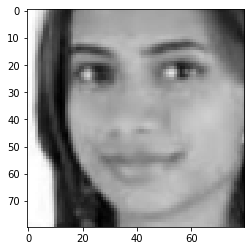

24
24_1_3_20170104222658903.jpg.chip.jpg


In [27]:
#Da togliere
idx=50
display(images_train[idx])
print(y_train[idx])
print(fileName_train[idx])

## Build Model

In [28]:
#Funzione per la creazione di un modello

import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
from keras import backend as K


def create_cnn_model():

    #inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))
    inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,1))
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
    conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #x = MaxPooling2D(pool_size=(2, 2))(conv3)
    x = Dropout(0.15)(pool2)
        
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    
    #shape degli attributi numerici
    #featureShape = Input(shape=(2,))
    #featureShape = Input(shape=(1,))
    #x = keras.layers.Concatenate(axis=1)([x, featureShape])
    
    #dropout = Dropout(0.15)
    age_model = Dense(128, activation='relu')(x)
    #age_model = dropout(age_model)
    age_model = Dense(64, activation='relu')(age_model)
    #age_model = dropout(age_model)
    age_model = Dense(32, activation='relu')(age_model)
    #age_model = dropout(age_model)
    age_model = Dense(1, activation='relu')(age_model)
   
        
    # construct the CNN
    #model = Model([inputs, featureShape], age_model)
    model = Model(inputs, age_model)
    #model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
    model.compile(optimizer = 'adam', loss ='mae', metrics =['accuracy'])
    #tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
   
    # return the CNN
    return model        
        
    

In [21]:
#istanziamo un modello chiamando la funzione sopra definita
model = create_cnn_model()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 128)       0   

In [29]:
# train the model
#batch_size = [128] dimensione del batch size utilizzata
#nb_epoch = [25, 40, 80, 100, 200, 500] numero di epoche utilizzate nelle varie prove

batch_size = [128]
nb_epoch = [80]
history_list = []
best_model= None
best_model = create_cnn_model()
#hist_best_model = best_model.fit(x = [images_train, feat_train], y = y_train, epochs = 1, batch_size = 250, validation_split=0.1, shuffle=True)
hist_best_model = best_model.fit(x = images_train, y = y_train, epochs = 1, batch_size = 250, validation_split=0.1, shuffle=True)
#hist_best_model = best_model.fit(x = images_train, y = y_train, epochs = 1, batch_size = 250, validation_data= (images_test, y_test), shuffle=True)
    
for batch in batch_size:
    for epoch in nb_epoch:
            print('epoch:',epoch,'batch:',batch)
            model = None
            model = create_cnn_model()
            #hist_model = model.fit(x = [images_train, feat_train], y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            hist_model = model.fit(x = images_train, y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            #hist_model = model.fit(x = images_train, y = y_train, epochs = epoch, batch_size = batch, validation_data= (images_test, y_test), shuffle=True)
            history_list.append(hist_model.history)
            
            mod_loss = np.mean(hist_model.history['loss'])
            mod_val_loss = np.mean(hist_model.history['val_loss'])
            mod_accuracy = np.mean(hist_model.history['accuracy'])
            best_mod_loss = np.mean(hist_best_model.history['loss'])
            print(mod_loss, best_mod_loss)
            
            if (mod_loss < best_mod_loss):
                best_model = model
                hist_best_model = hist_model
                
model_path = "img_80_0.15_3CL_0.01"
Path("Modelli/"+model_path).mkdir(parents=True, exist_ok=True)
best_model.save('Modelli/'+model_path+"/"+model_path+".h5")

Train on 21112 samples, validate on 2346 samples
Epoch 1/1
21112/21112 [==============================] - 19s 878us/step - loss: 16.8724 - accuracy: 0.0263 - val_loss: 14.9736 - val_accuracy: 0.0196
epoch: 80 batch: 128
Train on 21112 samples, validate on 2346 samples
Epoch 1/80
21112/21112 [==============================] - 18s 829us/step - loss: 15.6121 - accuracy: 0.0279 - val_loss: 13.6519 - val_accuracy: 0.0371
Epoch 2/80
21112/21112 [==============================] - 16s 746us/step - loss: 11.2306 - accuracy: 0.0418 - val_loss: 9.9693 - val_accuracy: 0.0320
Epoch 3/80
21112/21112 [==============================] - 16s 747us/step - loss: 8.7210 - accuracy: 0.0494 - val_loss: 8.3158 - val_accuracy: 0.0413
Epoch 4/80
21112/21112 [==============================] - 16s 744us/step - loss: 7.6394 - accuracy: 0.0645 - val_loss: 7.4048 - val_accuracy: 0.0810
Epoch 5/80
21112/21112 [==============================] - 16s 745us/step - loss: 6.9331 - accuracy: 0.0703 - val_loss: 6.8345 - val_

Epoch 54/80
21112/21112 [==============================] - 17s 783us/step - loss: 1.5706 - accuracy: 0.2817 - val_loss: 5.4674 - val_accuracy: 0.1083
Epoch 55/80
21112/21112 [==============================] - 17s 783us/step - loss: 1.5889 - accuracy: 0.2839 - val_loss: 5.4460 - val_accuracy: 0.1151
Epoch 56/80
21112/21112 [==============================] - 16s 778us/step - loss: 1.6029 - accuracy: 0.2824 - val_loss: 5.5701 - val_accuracy: 0.1198
Epoch 57/80
21112/21112 [==============================] - 17s 807us/step - loss: 1.5713 - accuracy: 0.2727 - val_loss: 5.4289 - val_accuracy: 0.1296
Epoch 58/80
21112/21112 [==============================] - 17s 796us/step - loss: 1.5322 - accuracy: 0.2906 - val_loss: 5.5515 - val_accuracy: 0.1181
Epoch 59/80
21112/21112 [==============================] - 17s 819us/step - loss: 1.5412 - accuracy: 0.2885 - val_loss: 5.4748 - val_accuracy: 0.0985
Epoch 60/80
21112/21112 [==============================] - 17s 804us/step - loss: 1.5922 - accuracy:

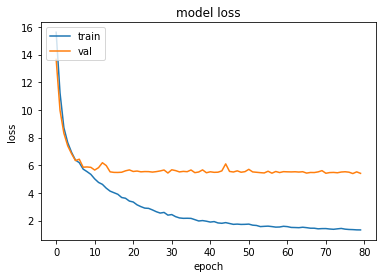

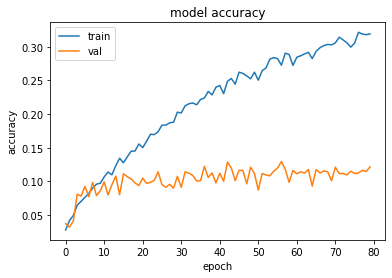

237/237 [==============================] - 0s 1ms/step


In [30]:
# summarize history for loss
plt.plot(hist_best_model.history['loss'])
plt.plot(hist_best_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model loss")
plt.show()

# summarize history for accuracy
plt.plot(hist_best_model.history['accuracy'])
plt.plot(hist_best_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model accuracy")
plt.show()


#y = np.reshape(feat_test,(1,))
y_prova = np.asarray(y_test)
#result_evaluate = best_model.evaluate([images_test, feat_test], y_prova)
result_evaluate = best_model.evaluate(images_test, y_test)


#Salvataggio informazioni modello
f= open("Modelli/"+model_path+"/result.txt","w+")
f.write("Train loss: "+ str(mod_loss)+"\n")
f.write("val_loss: " + str(mod_val_loss)+"\n")
f.write("Train accuracy: "+ str(mod_accuracy)+"\n")
f.write("Test loss: "+str(result_evaluate[0])+"\n")
f.write("Test accuracy: "+str(result_evaluate[1])+"\n")
f.close()
tf.keras.utils.plot_model(best_model, "Modelli/"+model_path+"/model.png",show_shapes=True) 
np.save("Modelli/"+model_path+"/hist.npy",hist_best_model)

In [ ]:
#nuovo grafico


#caricare history di un modello
hist_prova = np.load("Modelli/"+model_path+"/hist.npy",allow_pickle = True).item()

# Valutazioni

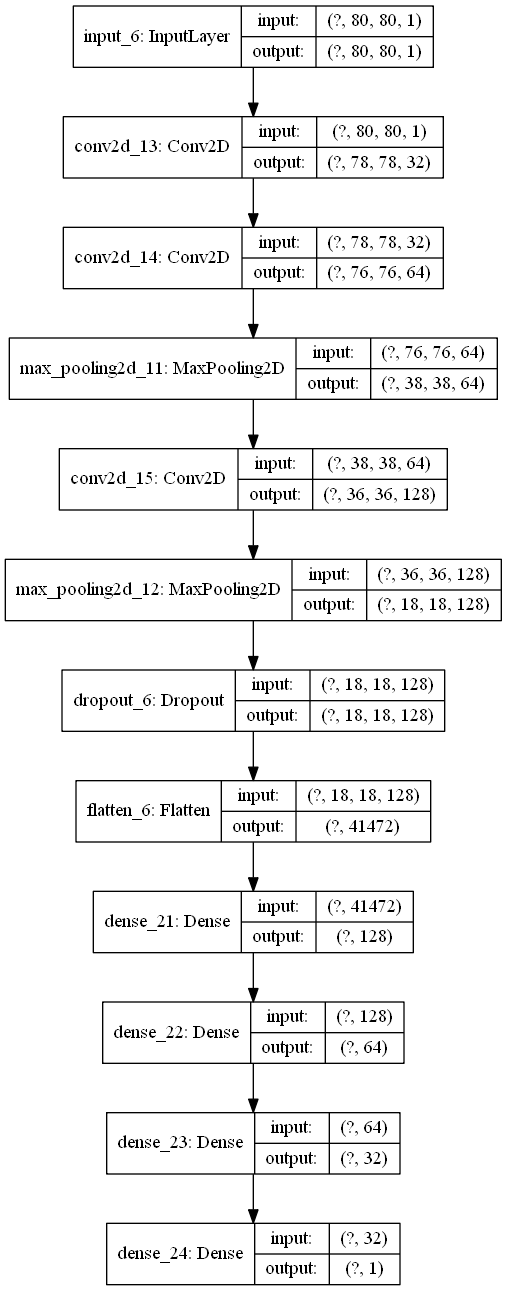

In [44]:
from IPython.display import display, Image
#carichiamo uno dei modelli precedentemente addestrati
loaded_model= tf.keras.models.load_model("Modelli/img_200_0.15_3CL_0.2/img_200_0.15_3CL_0.2.h5")

#Struttura del modello utilizzato
display(Image("Modelli/img_200_0.15_3CL_0.2/model.png"))

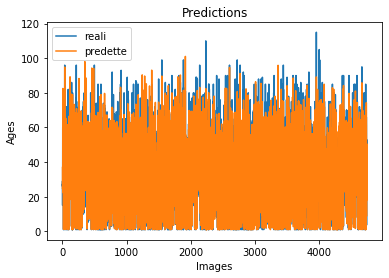

In [71]:
predictions_age = loaded_model.predict(images_test)
plt.plot(y_test)
plt.plot(predictions_age)
plt.title('Predictions')
plt.ylabel('Ages')
plt.xlabel('Images')
plt.legend(['reali', 'predette'], loc='upper left')
plt.axis("auto")
plt.show()

In [ ]:
y_prova = np.asarray(y_test)
loaded_model.evaluate(images_test, y_prova)

##### fileName_test

## GridSearchCV

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

## K-FOLD VALIDATION